In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# Pandas for managing datasets
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from tools.trajectory_generator import TrajectoryGenerator
from tools.utils import set_movements
from datetime import datetime


2019-06-19 12:50:22.024 | INFO     | tools.trajectory_generator:data_generation:623 - 
 Starting the generator with attributes: 
Original latitude: 37.295493
Original longitude: 23.824322
Initial bearing: 90
Initial speed: 20
Number of samples: 25
Starting time of measurements: 2015-02-01 12:00:00
With initial frequency of collected data: 5 min
and hard reset of data: True
2019-06-19 12:50:22.025 | INFO     | tools.trajectory_generator:data_generation:626 - Create directory 'generator_data' 
2019-06-19 12:50:22.026 | INFO     | tools.trajectory_generator:data_generation:632 - now creating data for movement: step_up_left
2019-06-19 12:50:22.371 | INFO     | tools.trajectory_generator:data_generation:637 - now creating data for movement: random
2019-06-19 12:50:23.243 | SUCCESS  | tools.trajectory_generator:data_generation:670 - Done with generator
2019-06-19 12:50:24.935 | INFO     | tools.trajectory_generator:data_generation:623 - 
 Starting the generator with attributes: 
Original lat

2019-06-19 12:50:48.057 | INFO     | tools.trajectory_generator:data_generation:626 - Create directory 'generator_data' 
2019-06-19 12:50:48.058 | INFO     | tools.trajectory_generator:data_generation:632 - now creating data for movement: sector_pattern_right
2019-06-19 12:50:48.138 | INFO     | tools.trajectory_generator:data_generation:637 - now creating data for movement: random
2019-06-19 12:50:48.961 | SUCCESS  | tools.trajectory_generator:data_generation:670 - Done with generator


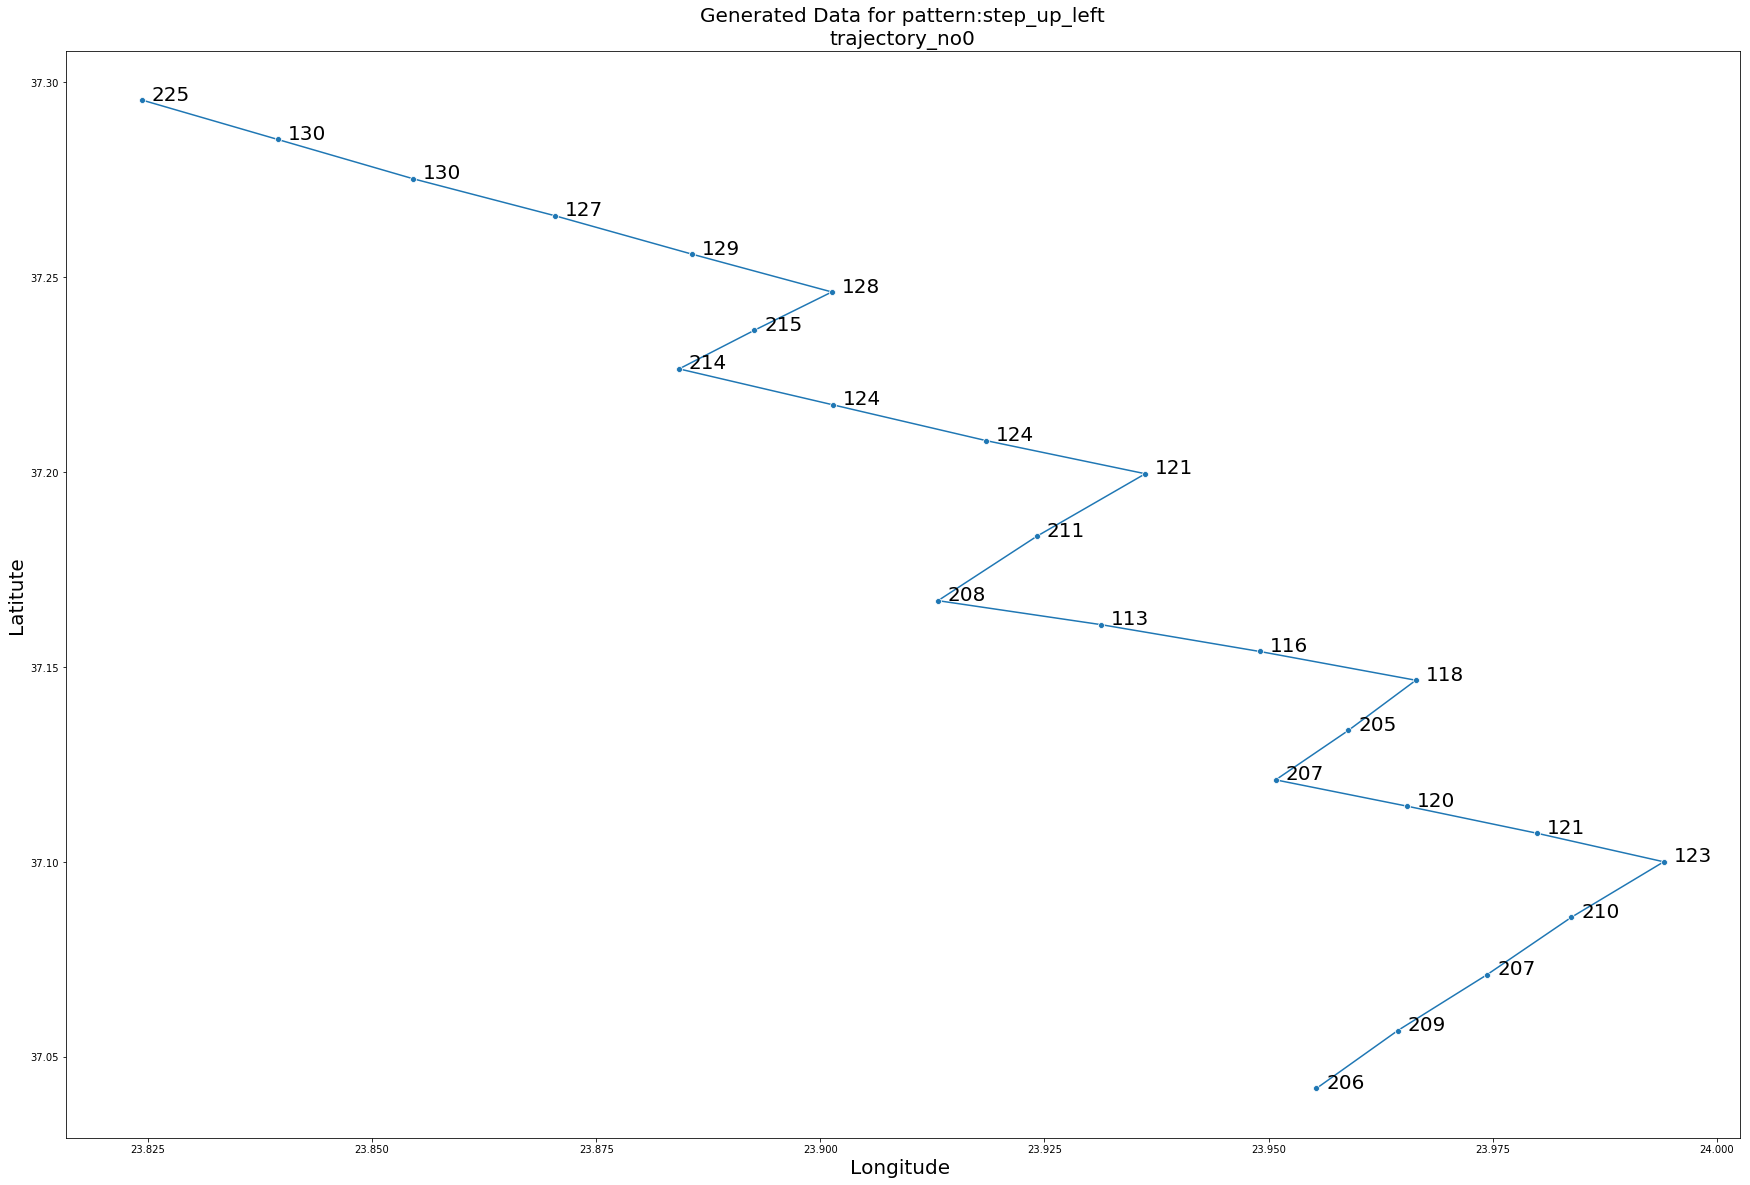

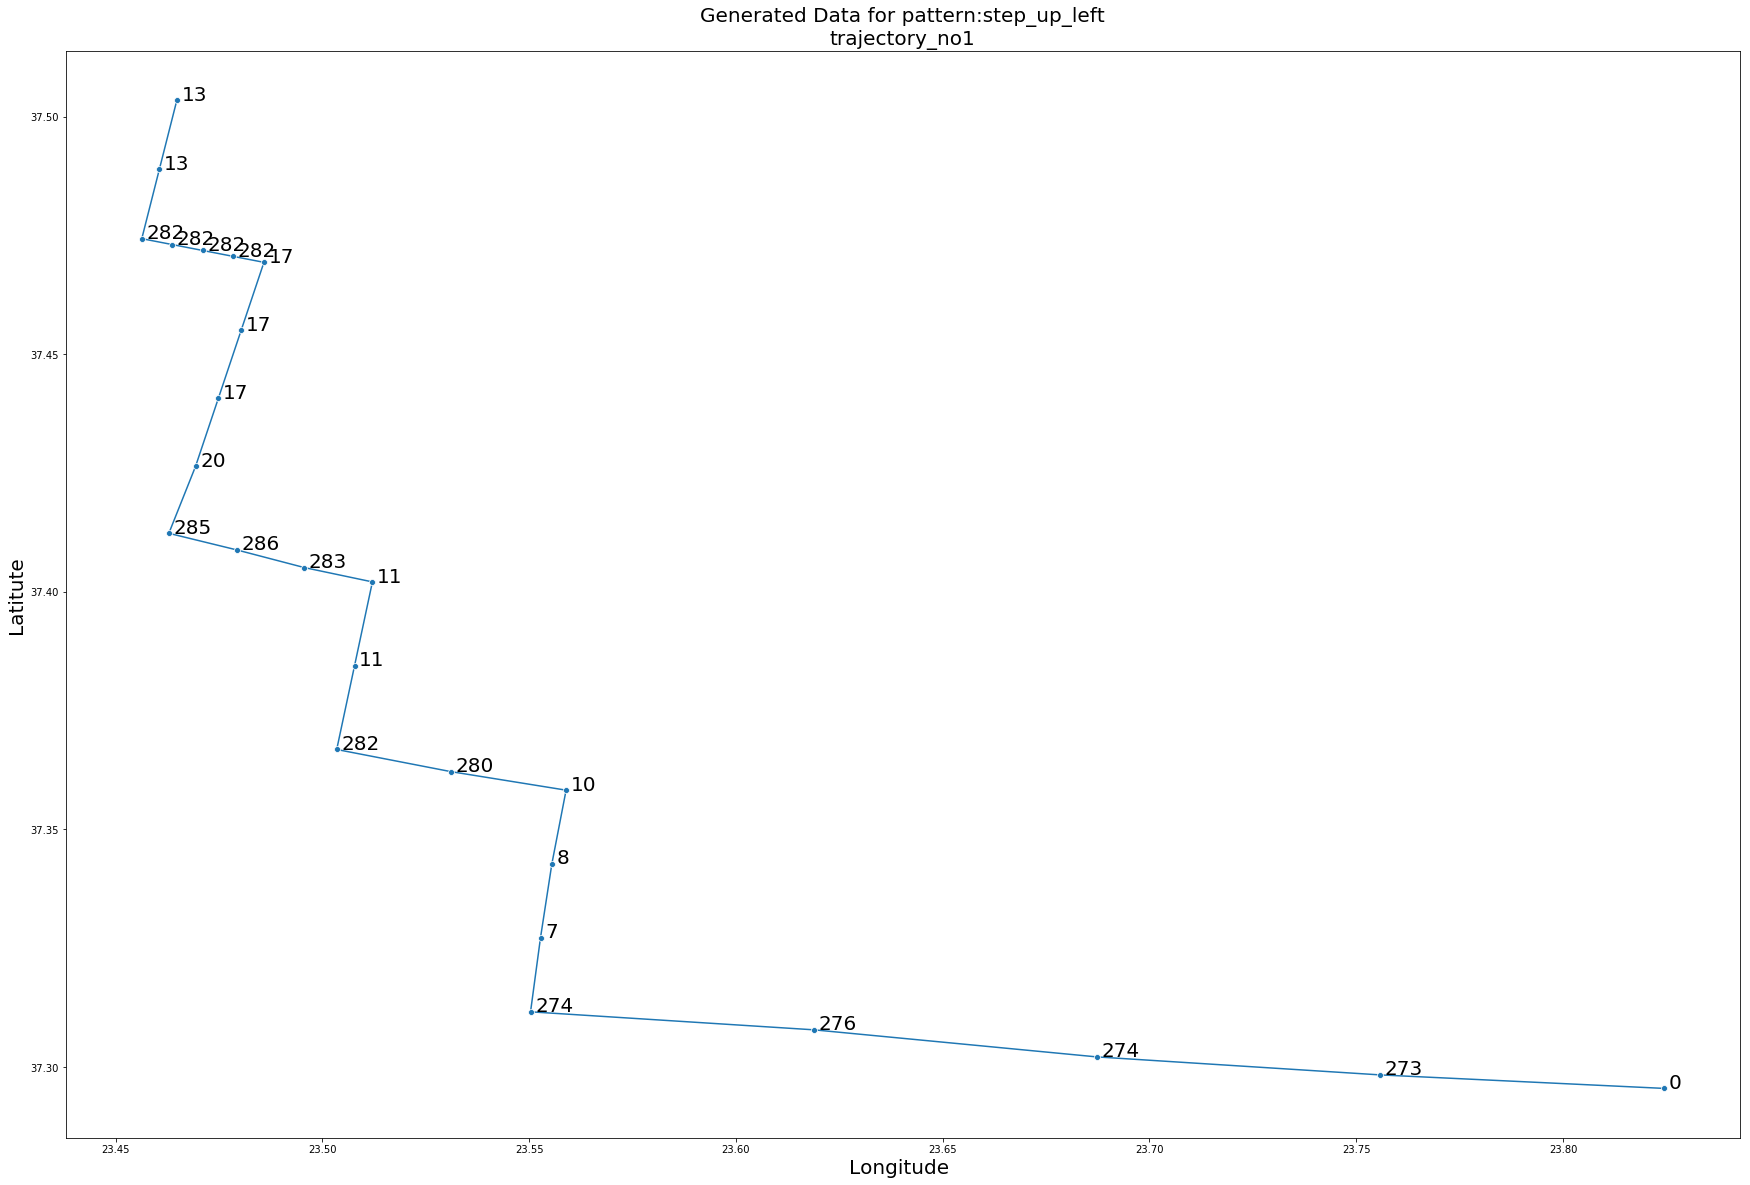

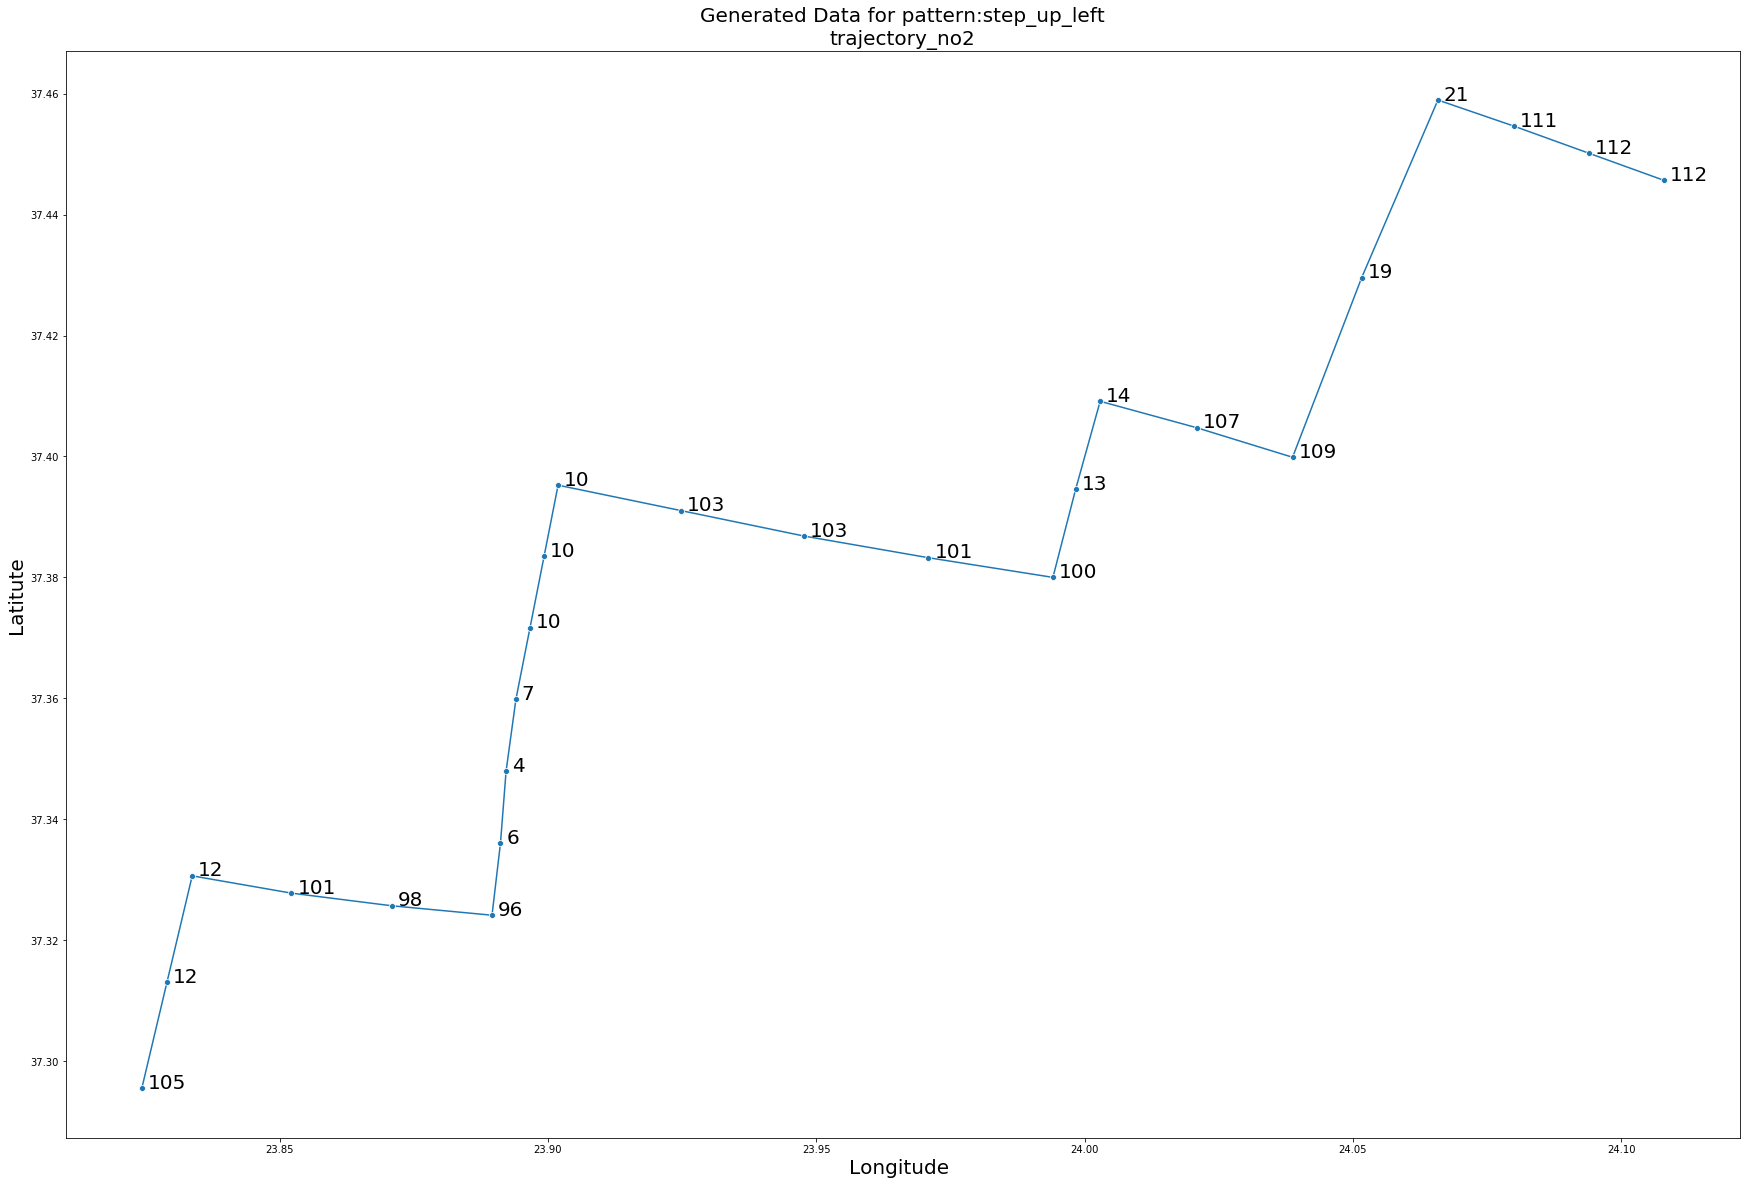

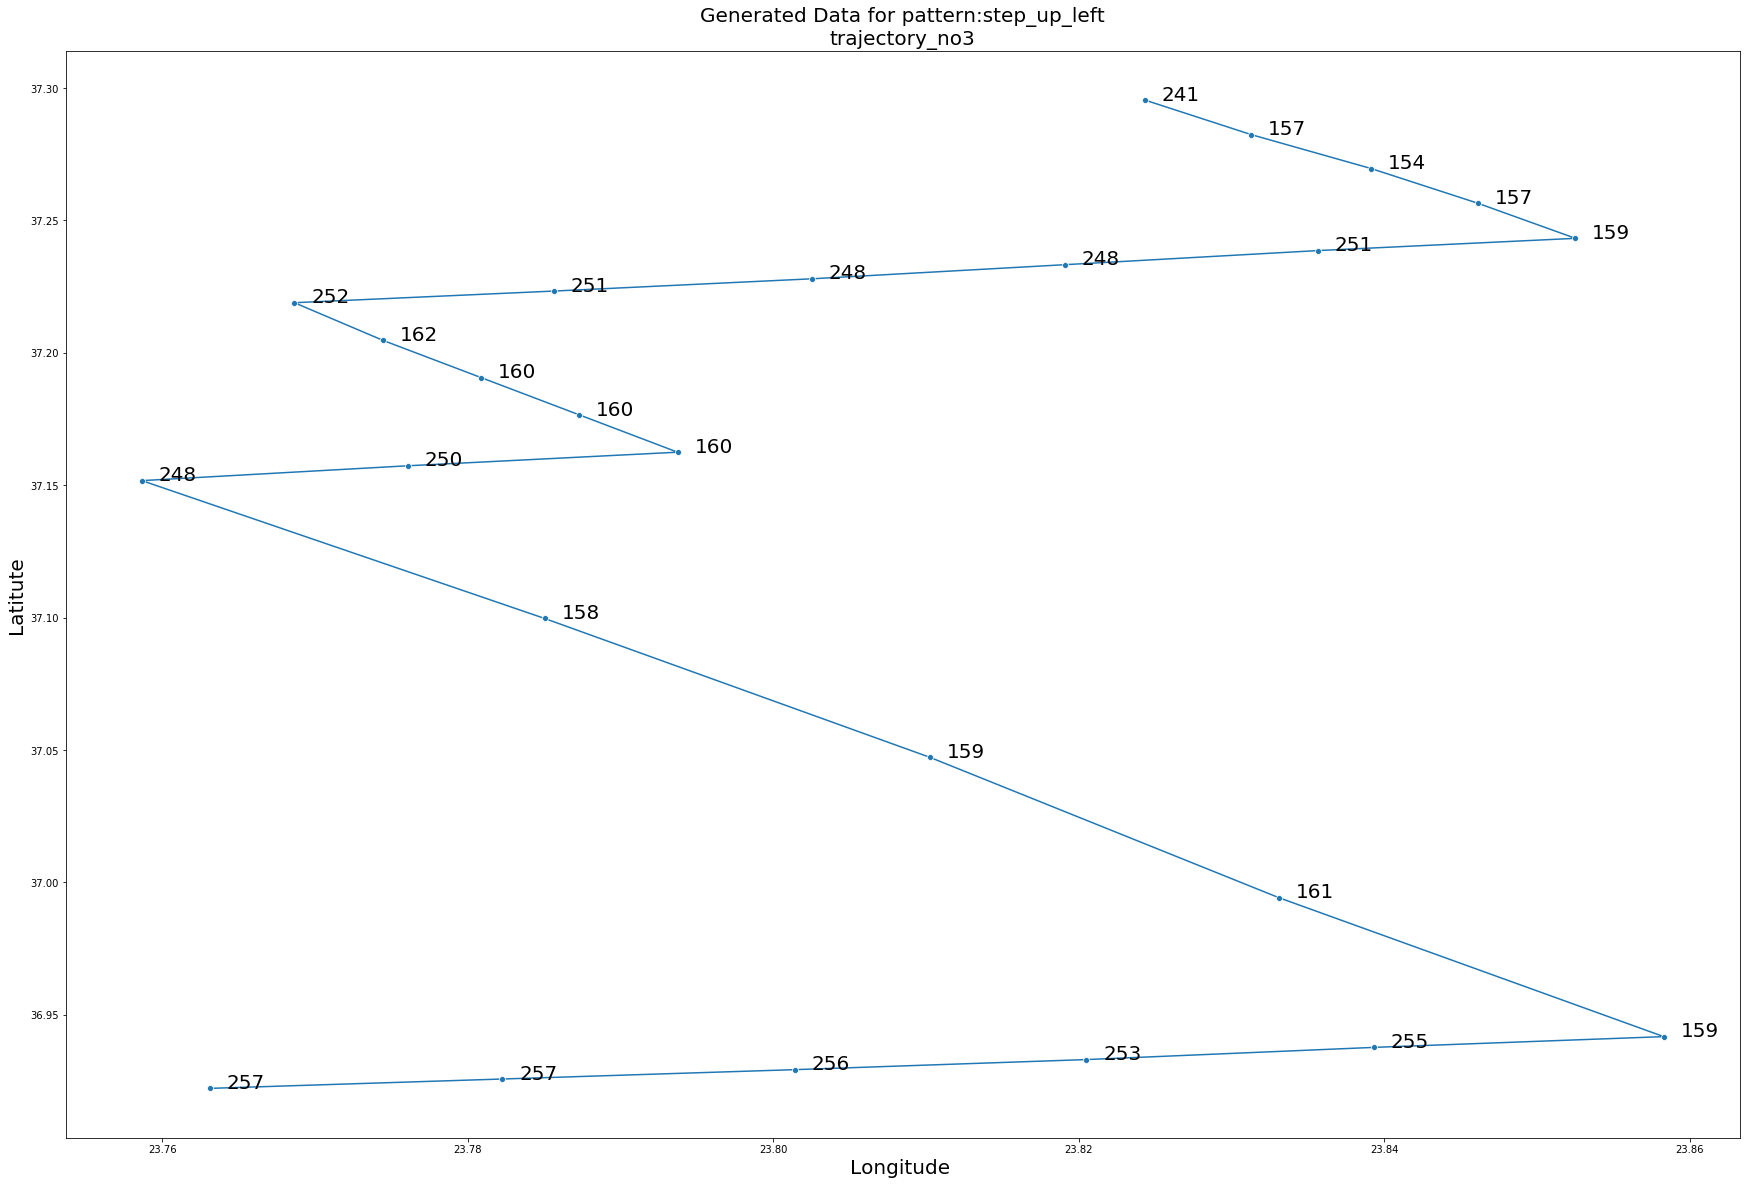

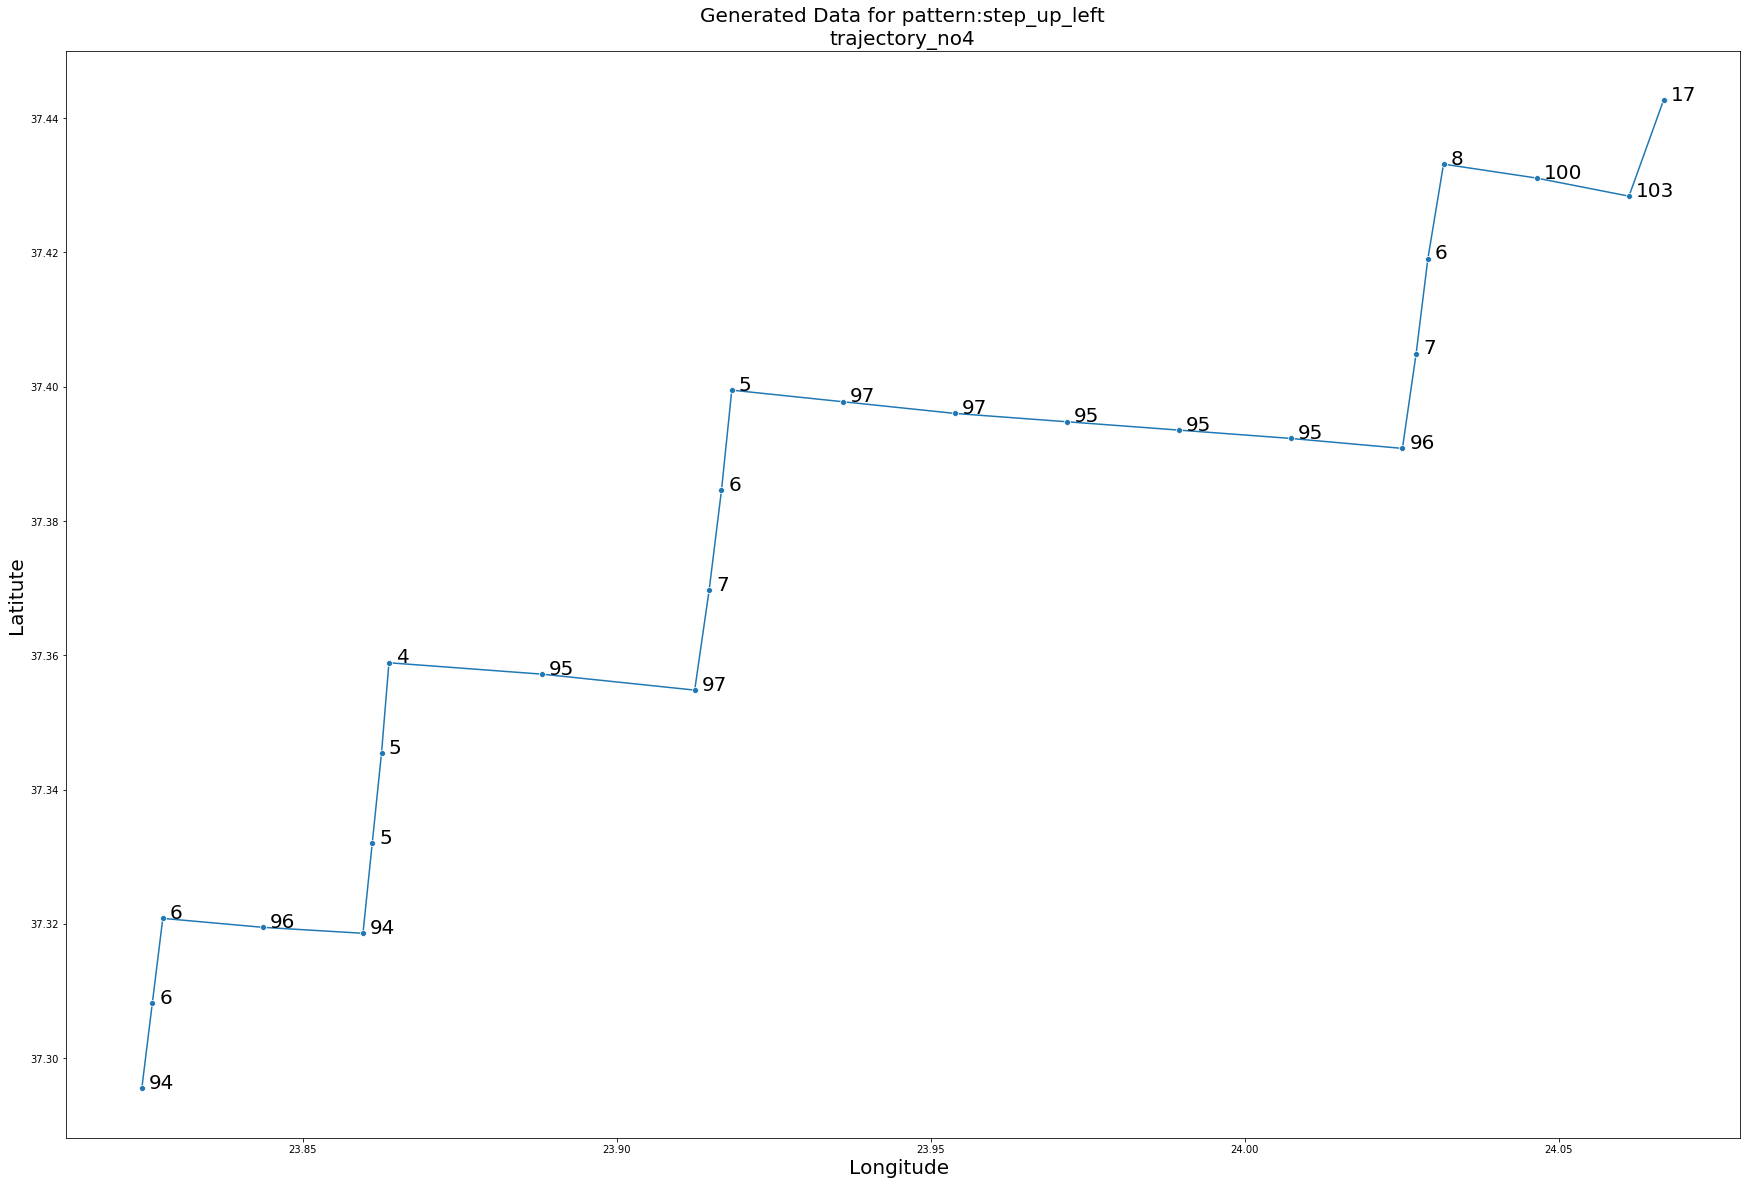

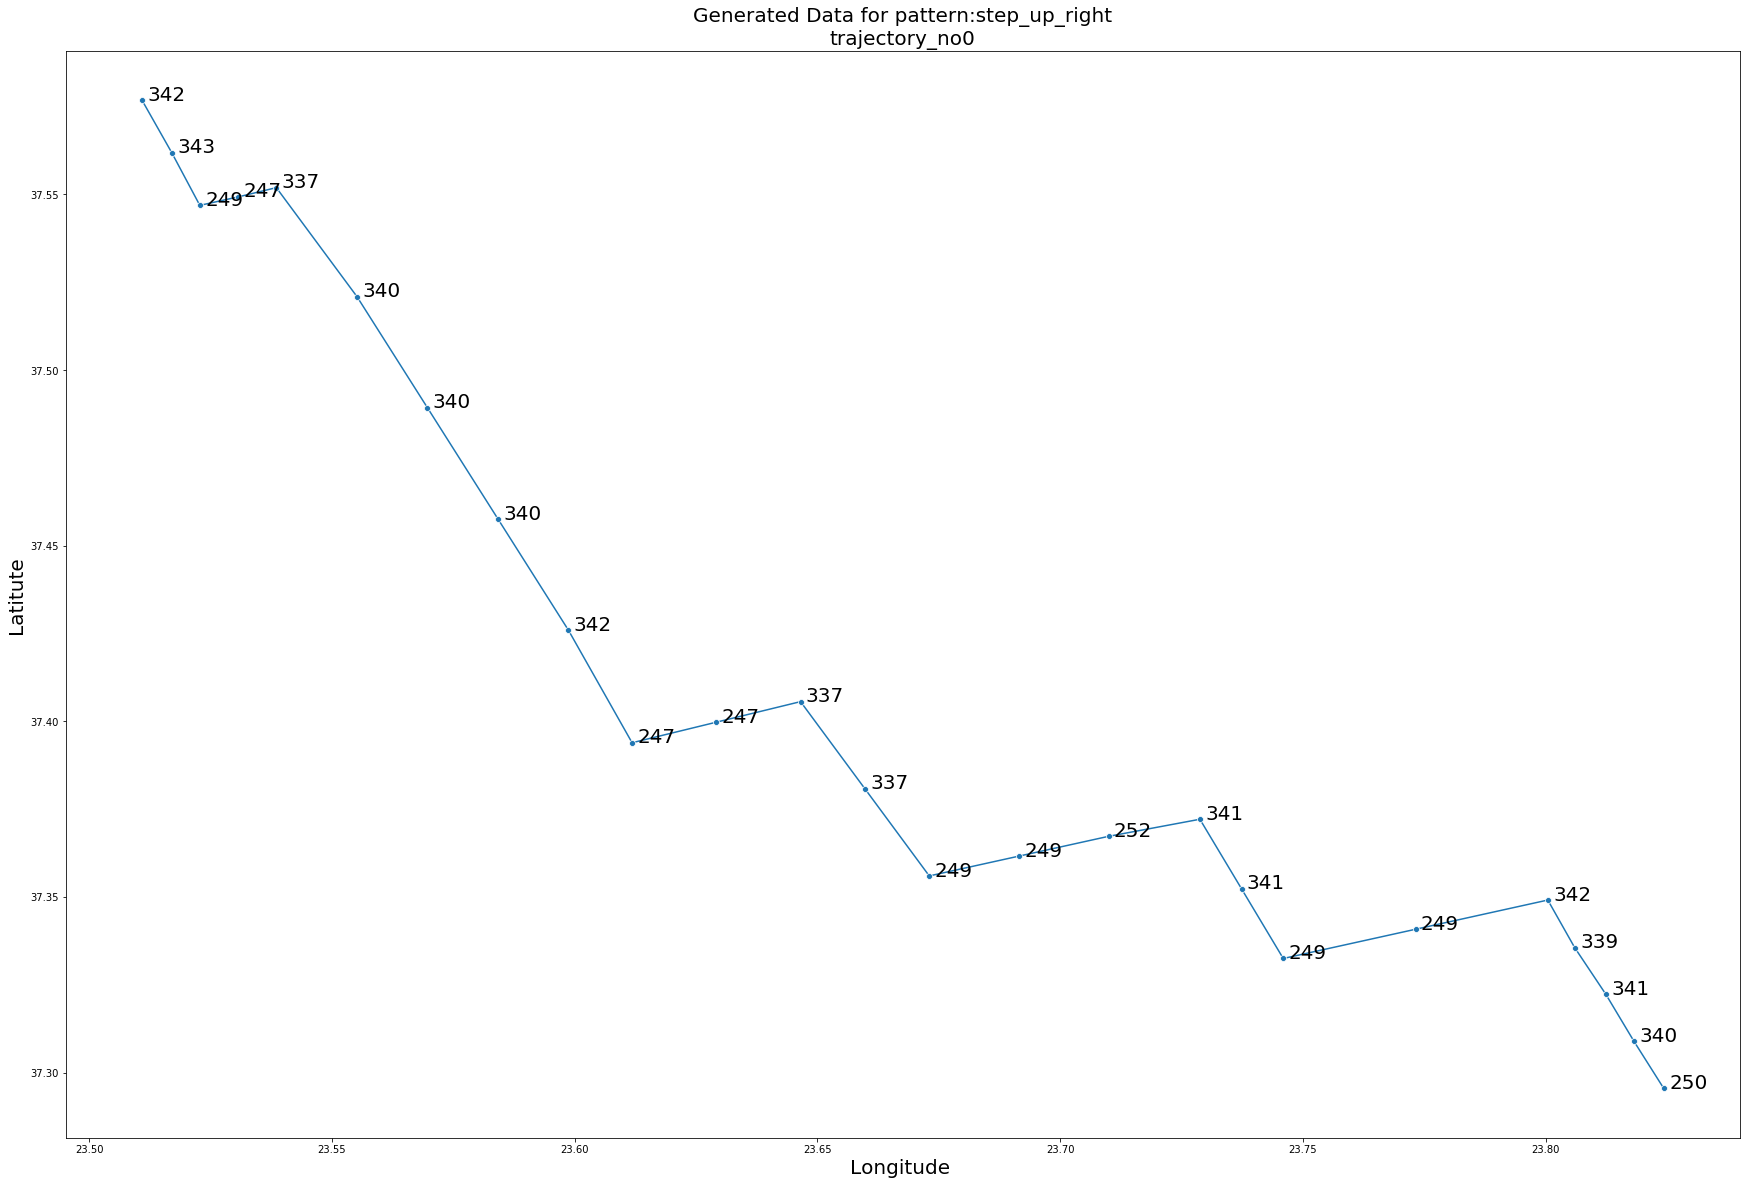

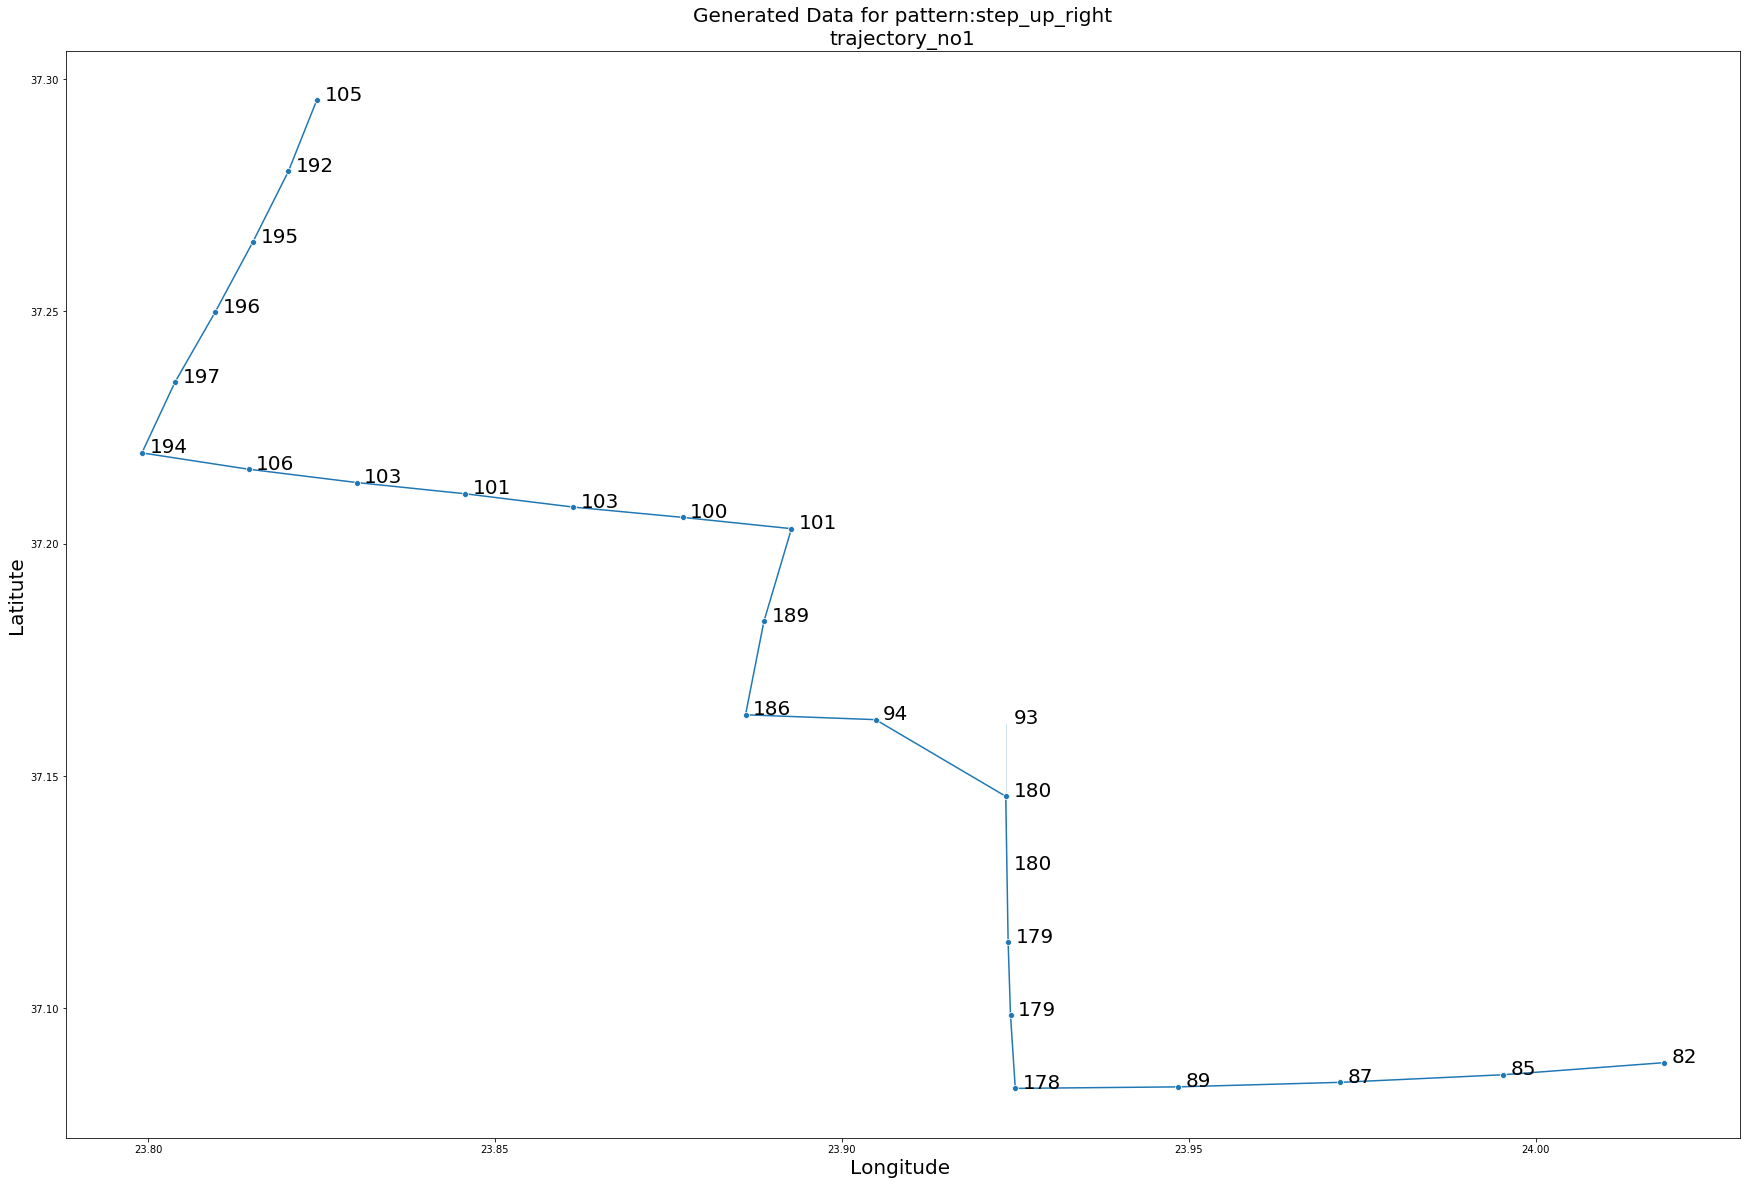

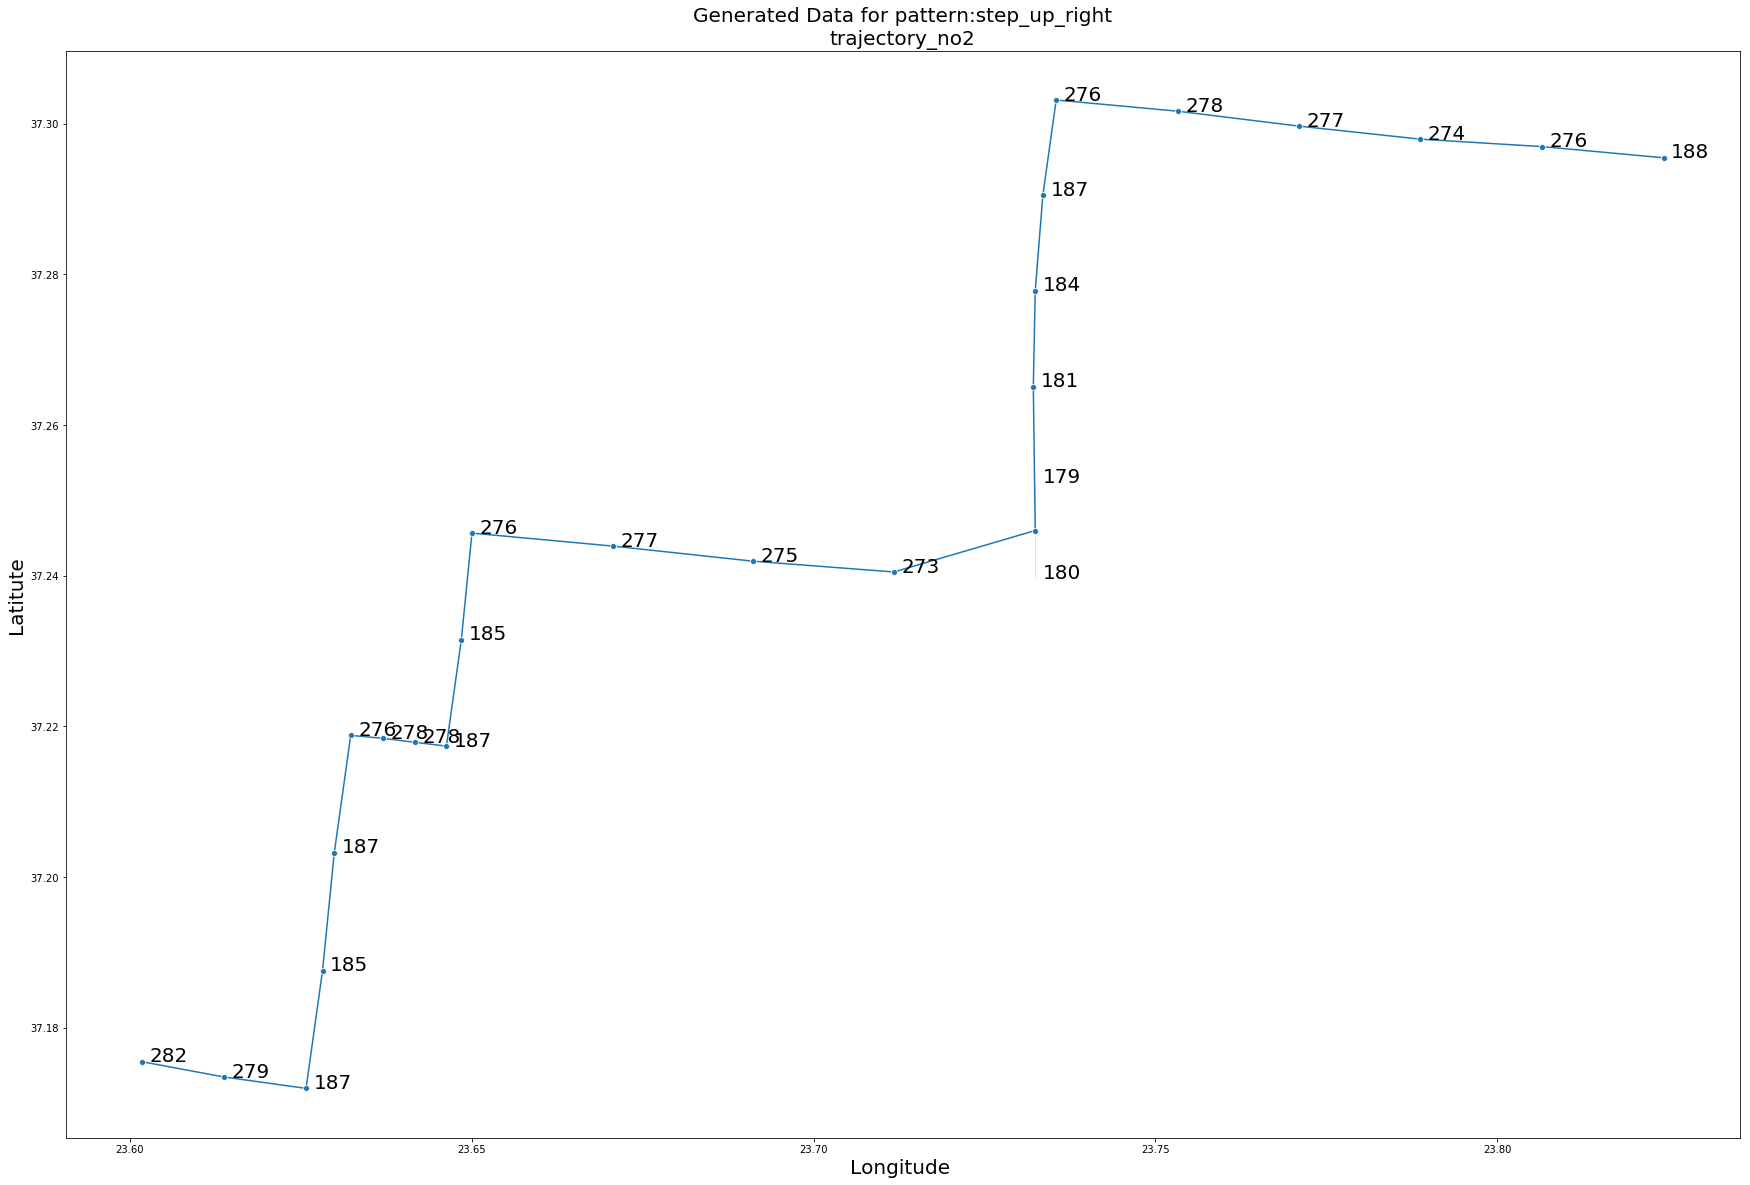

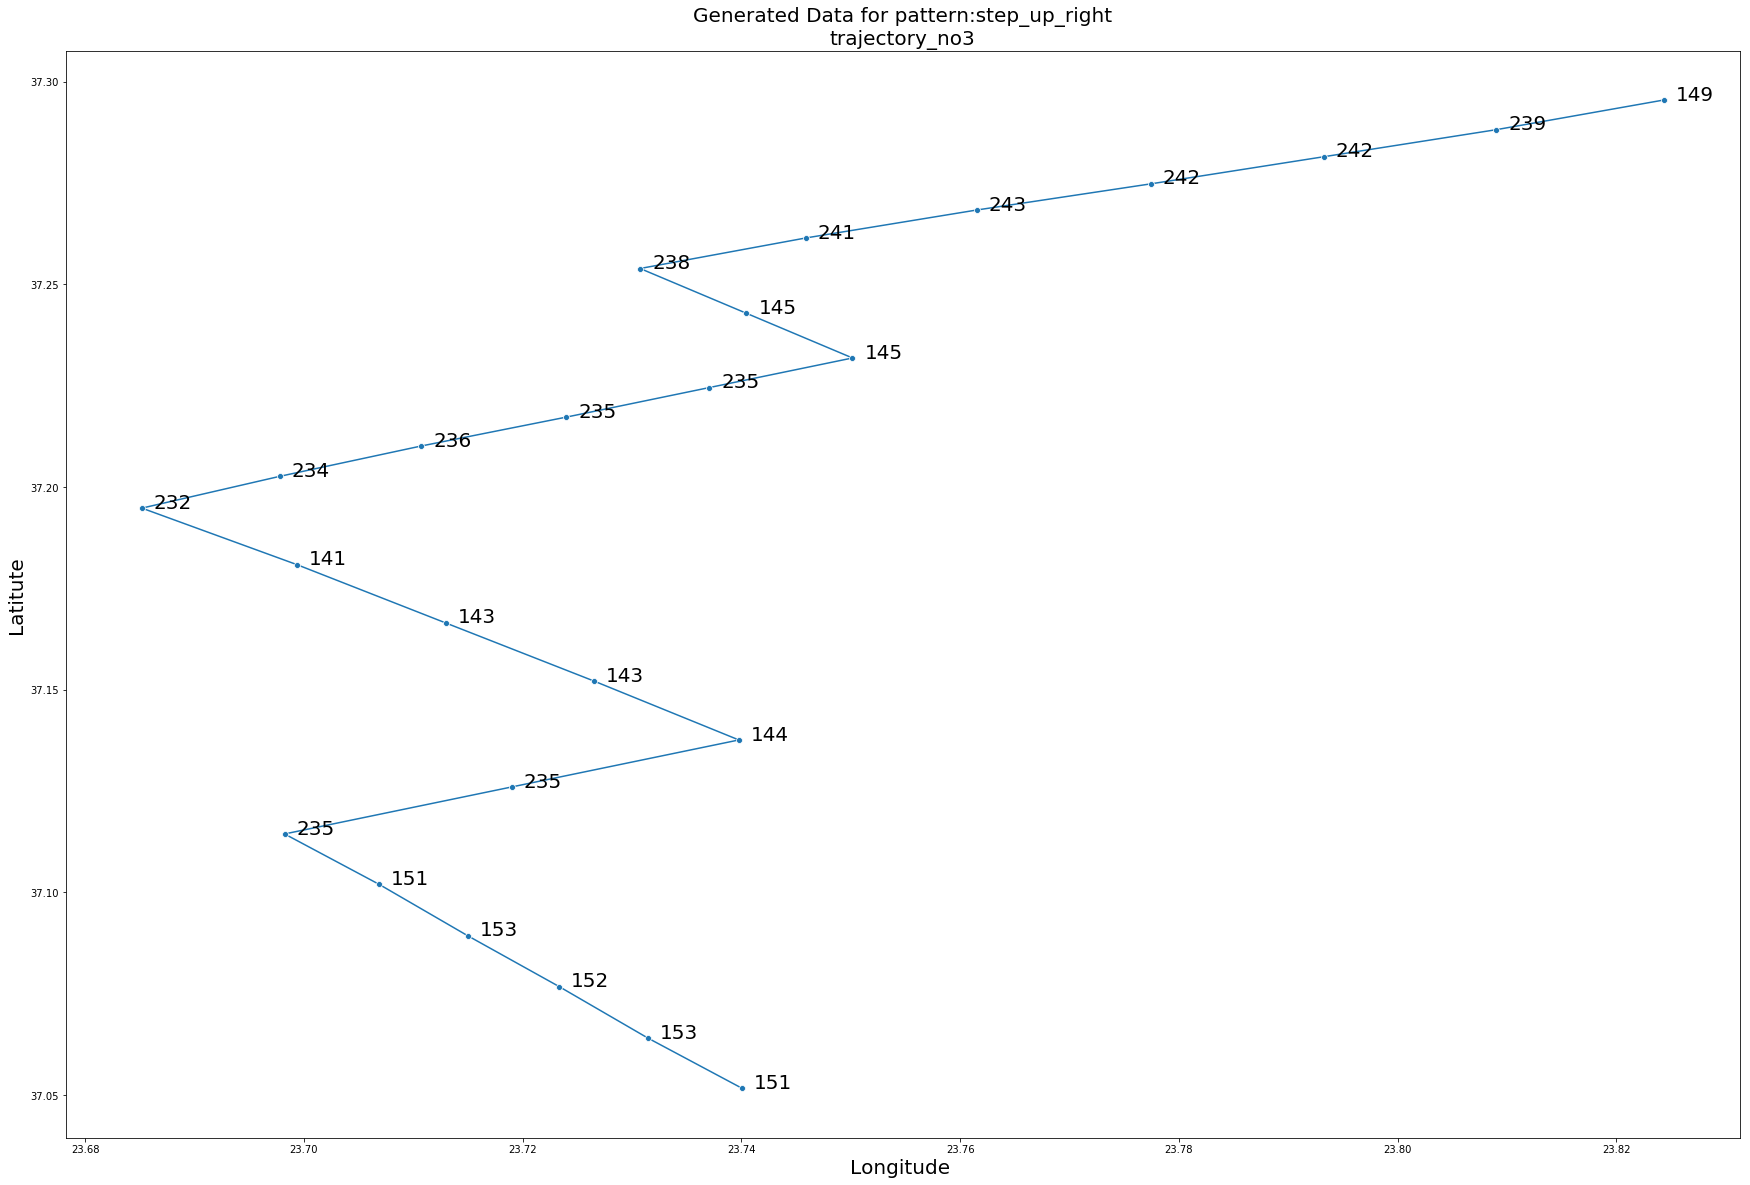

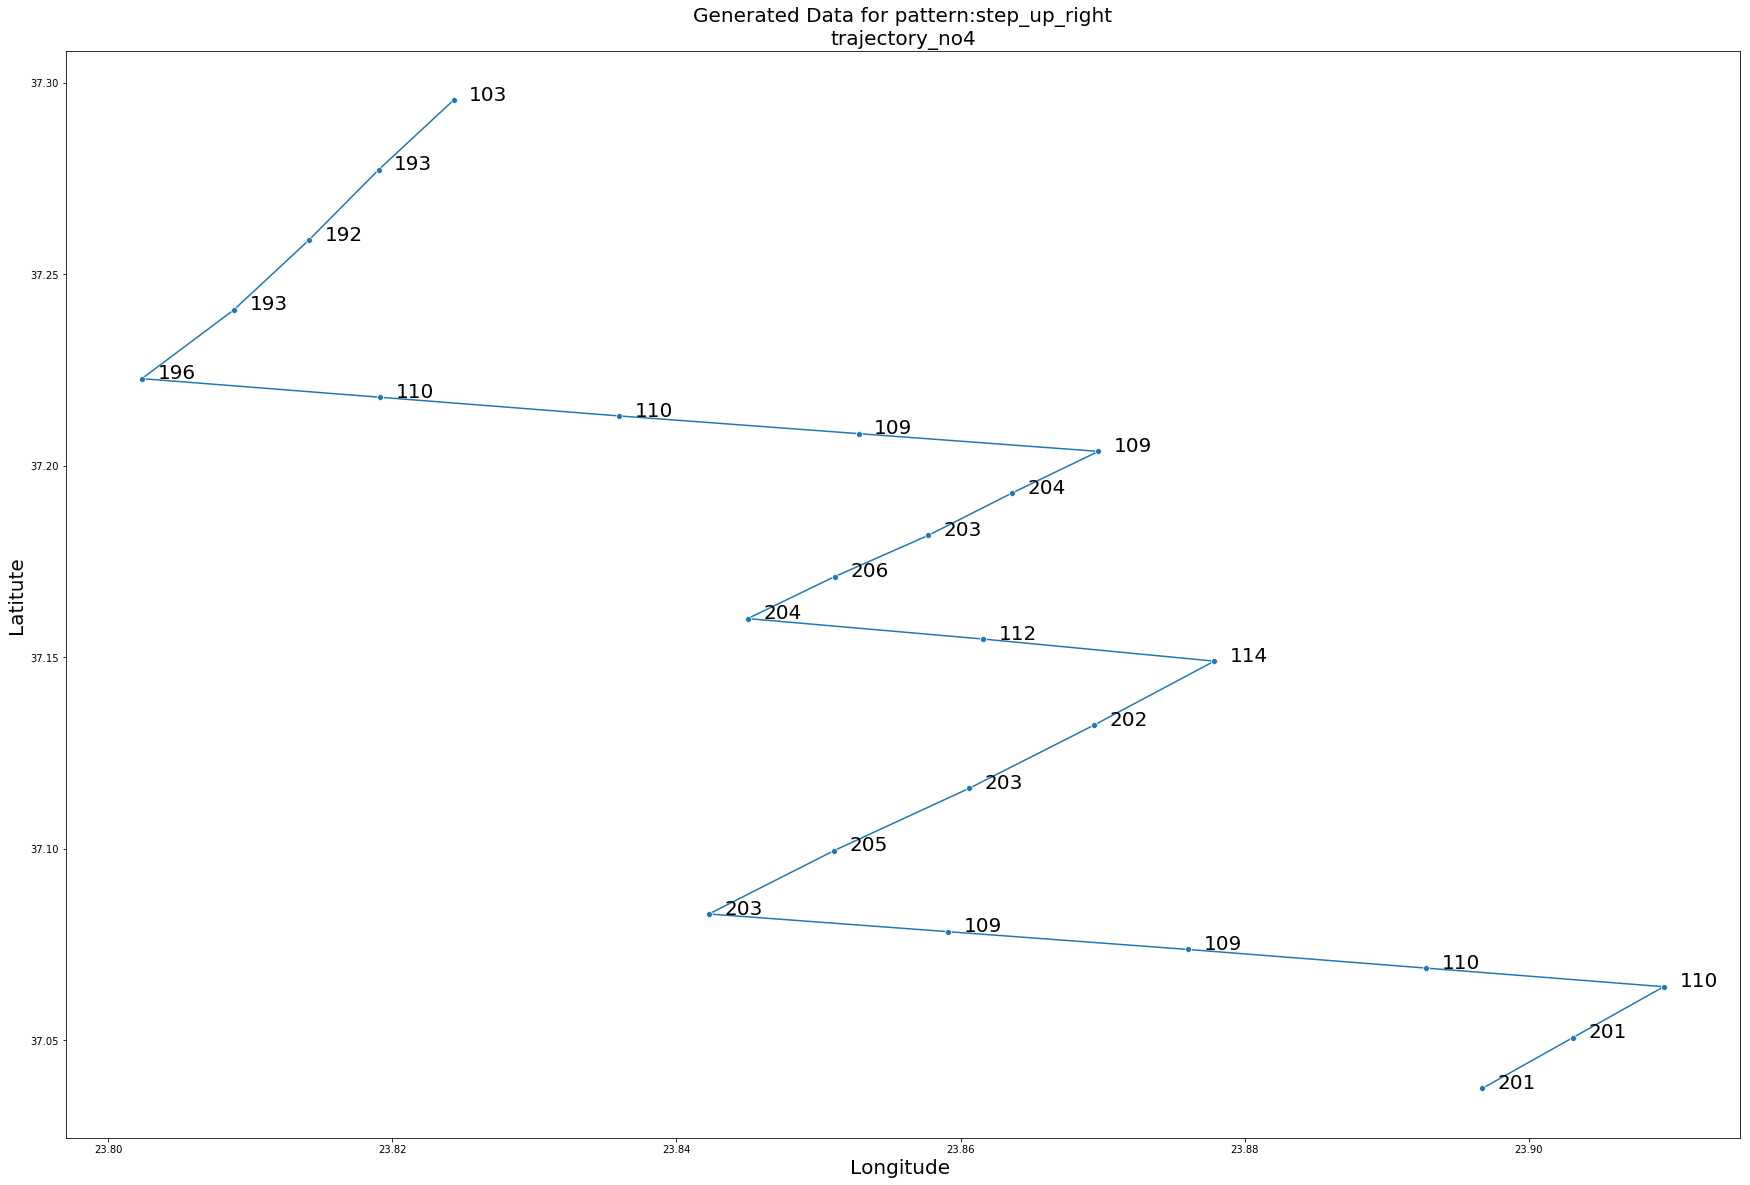

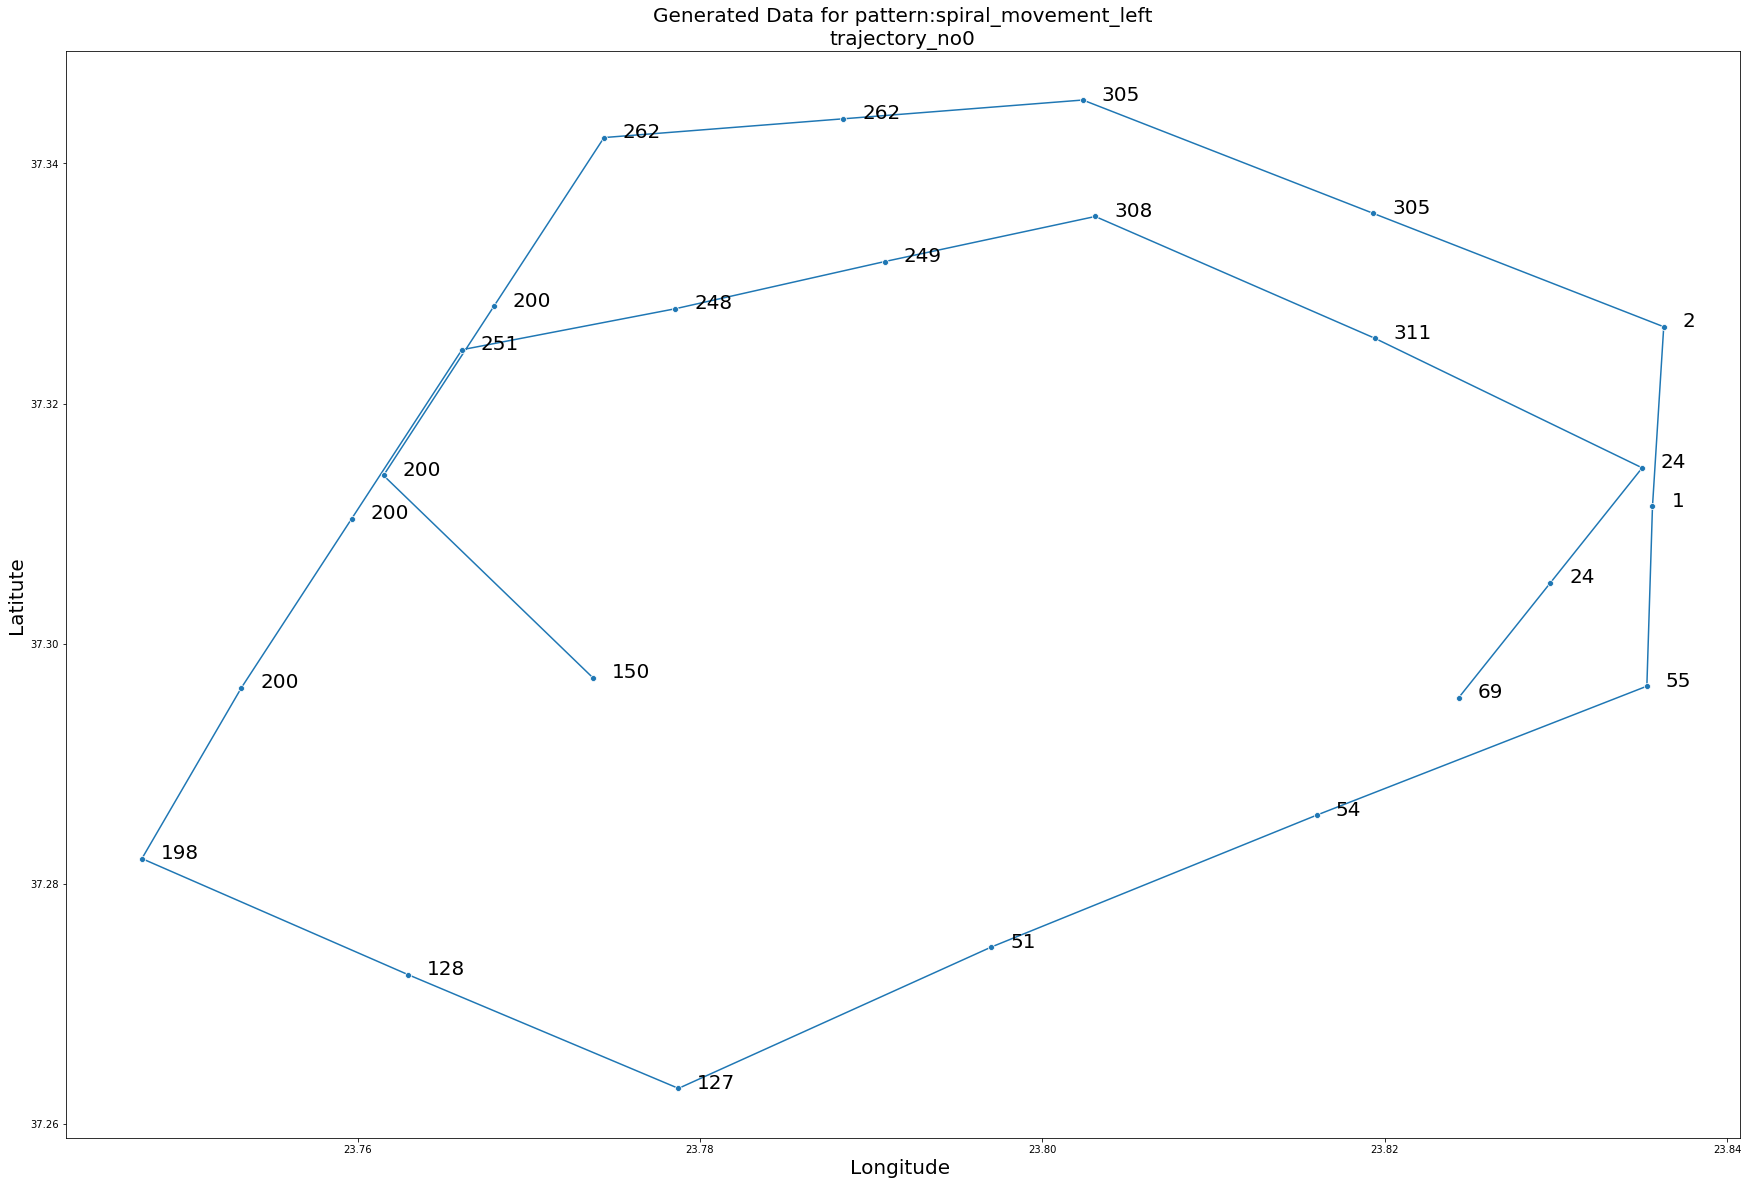

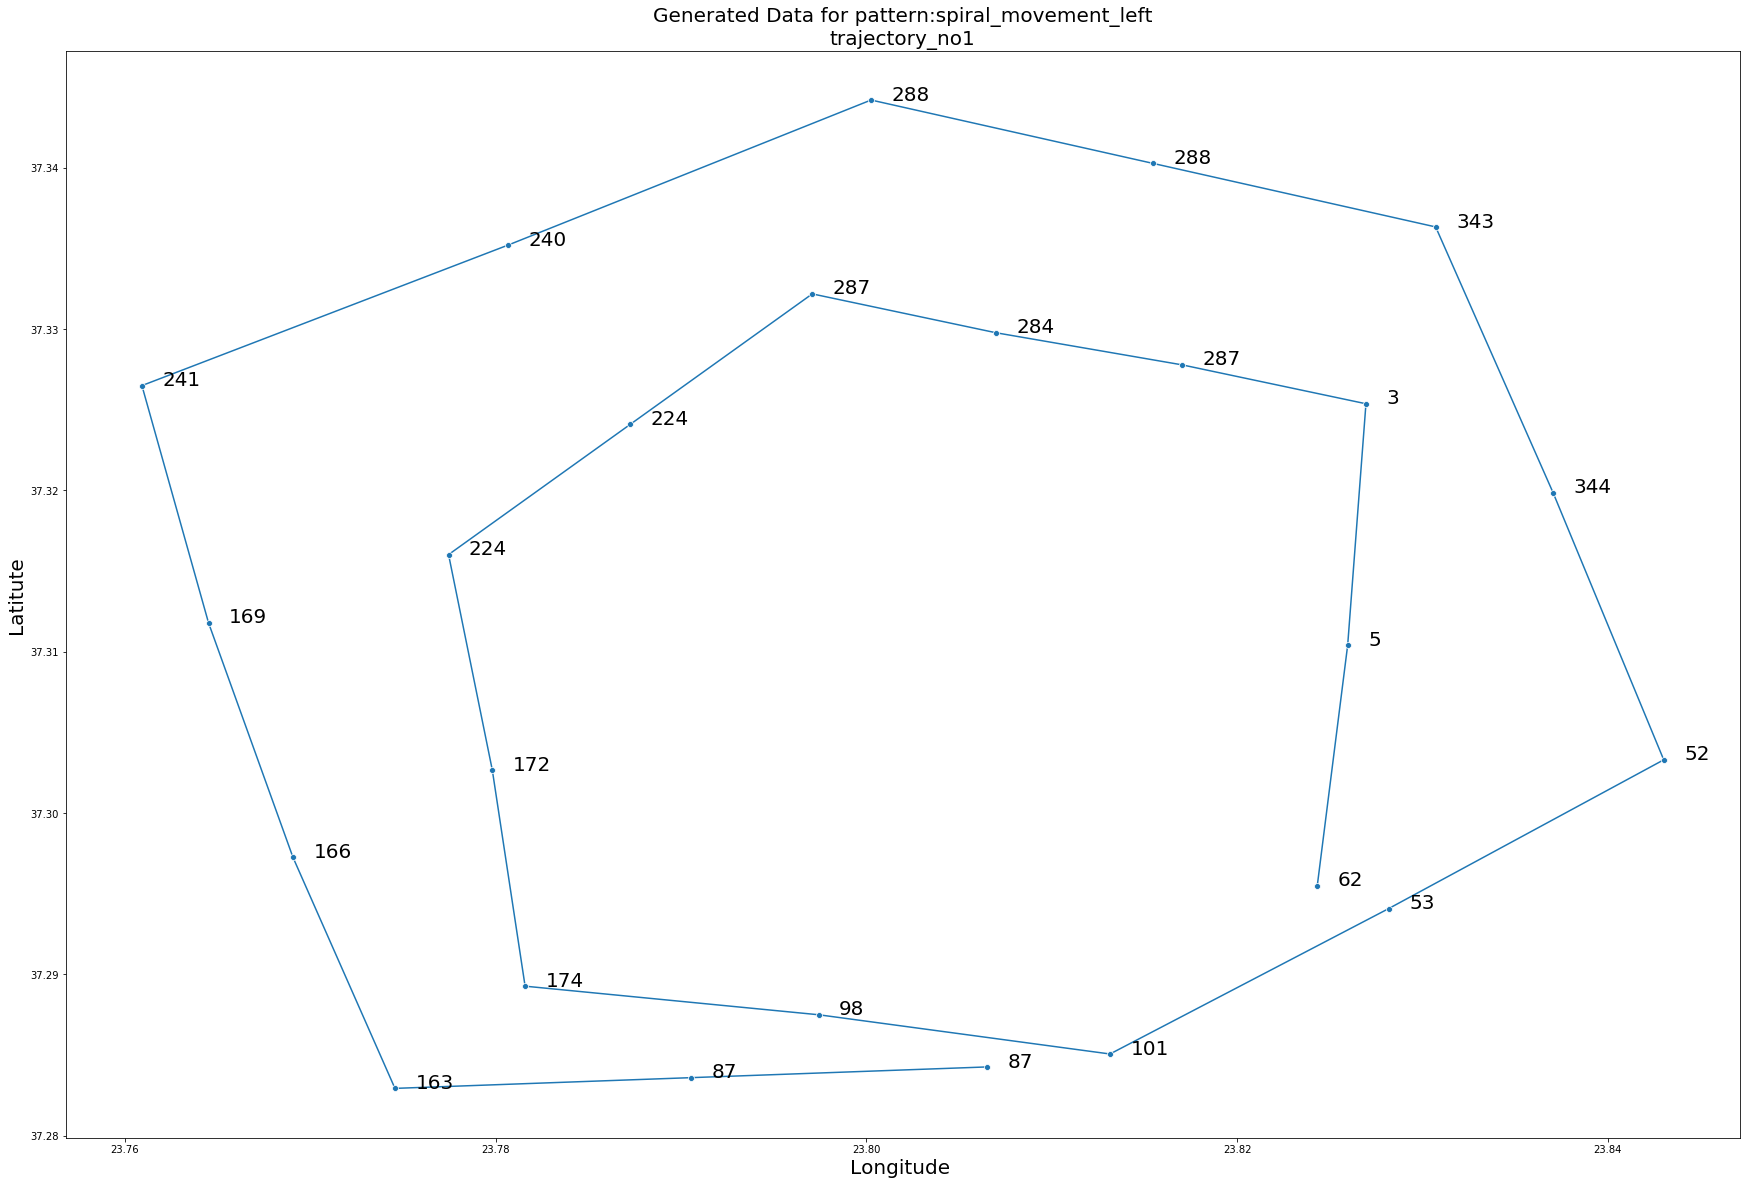

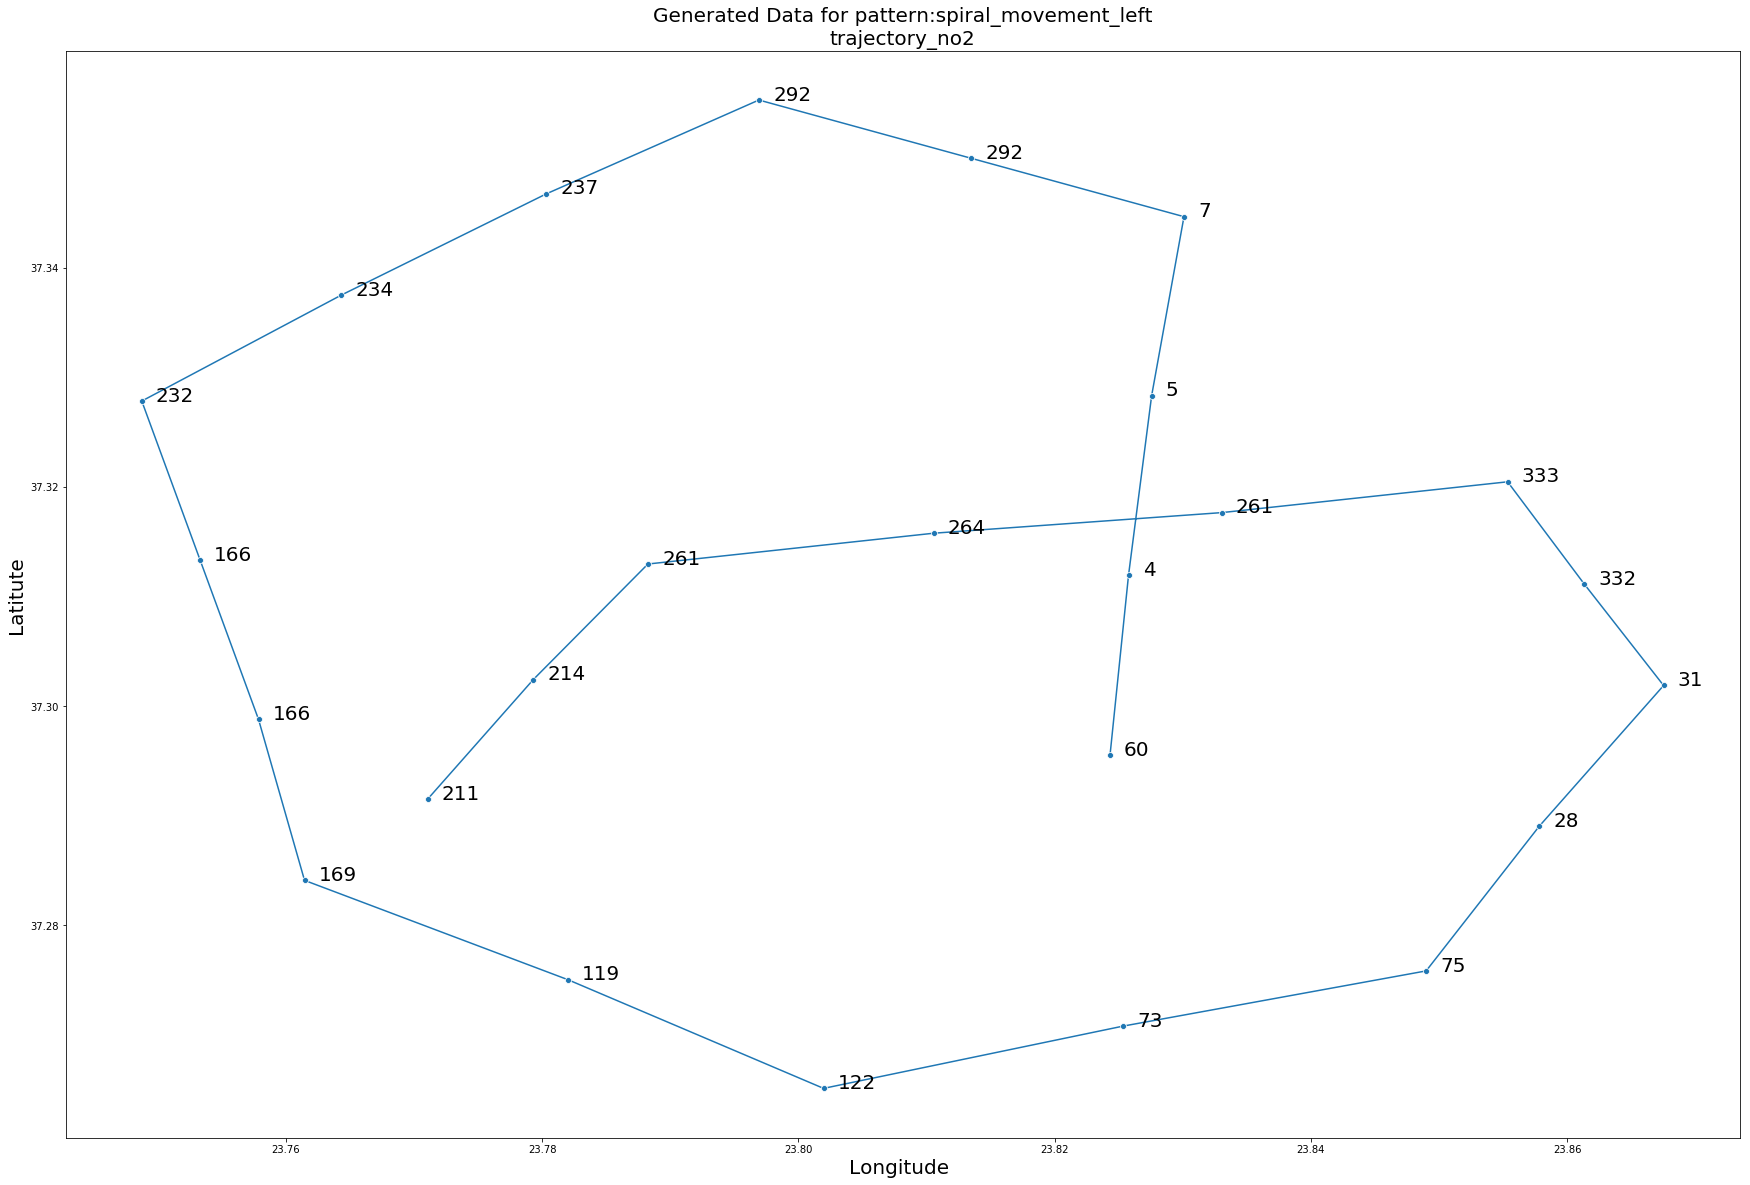

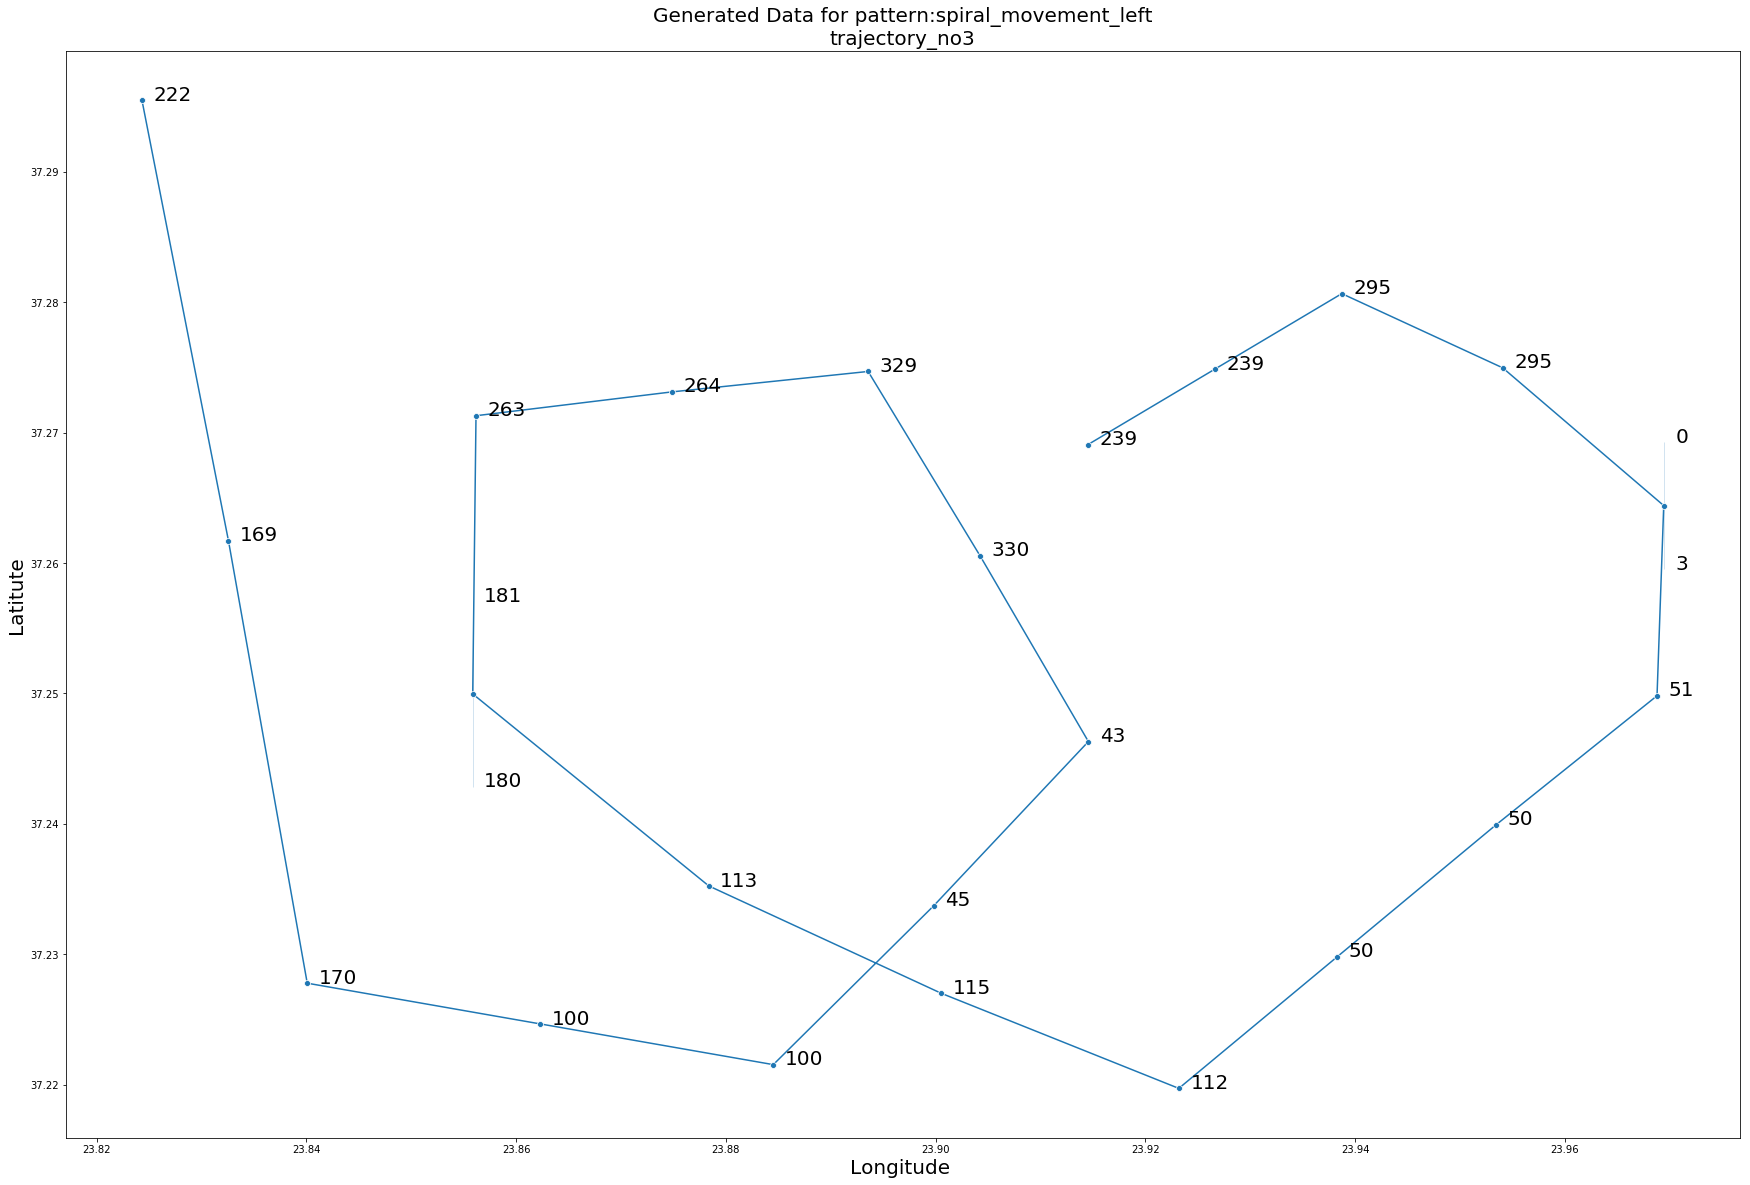

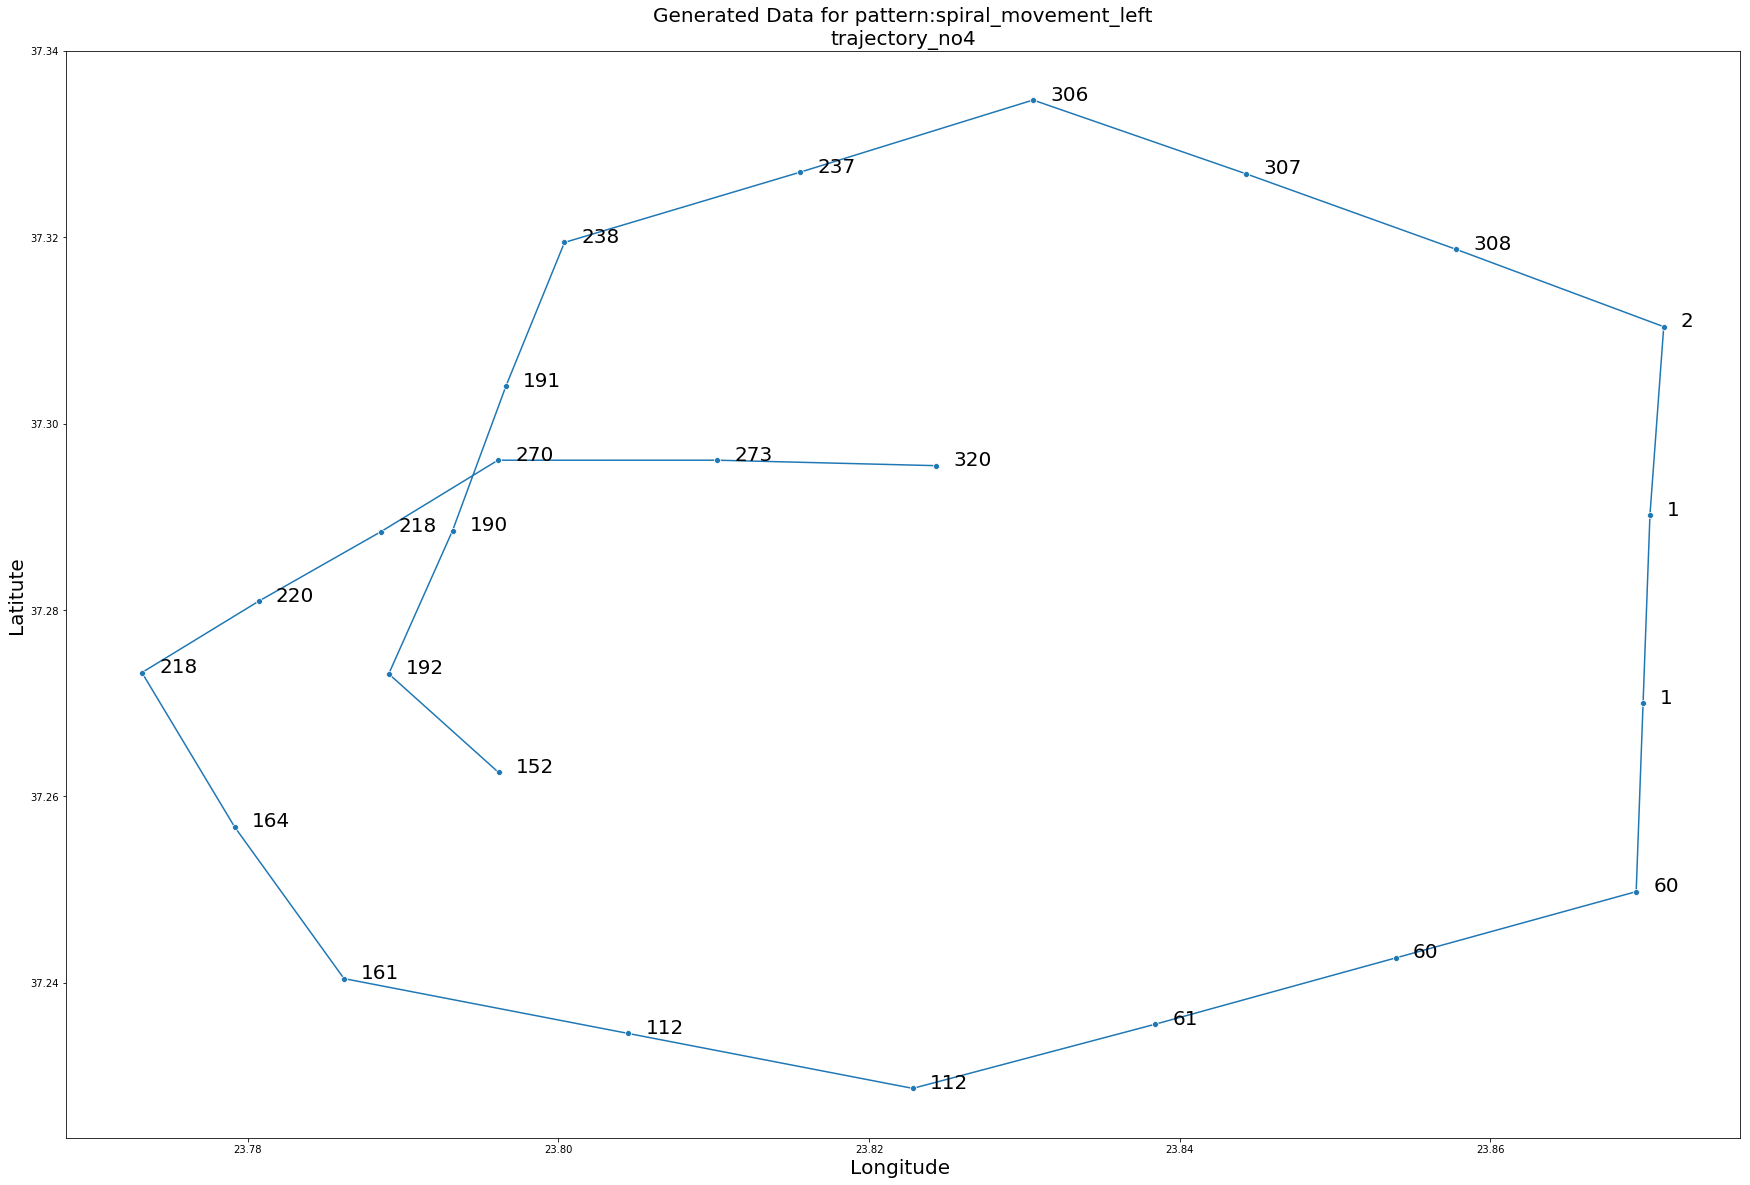

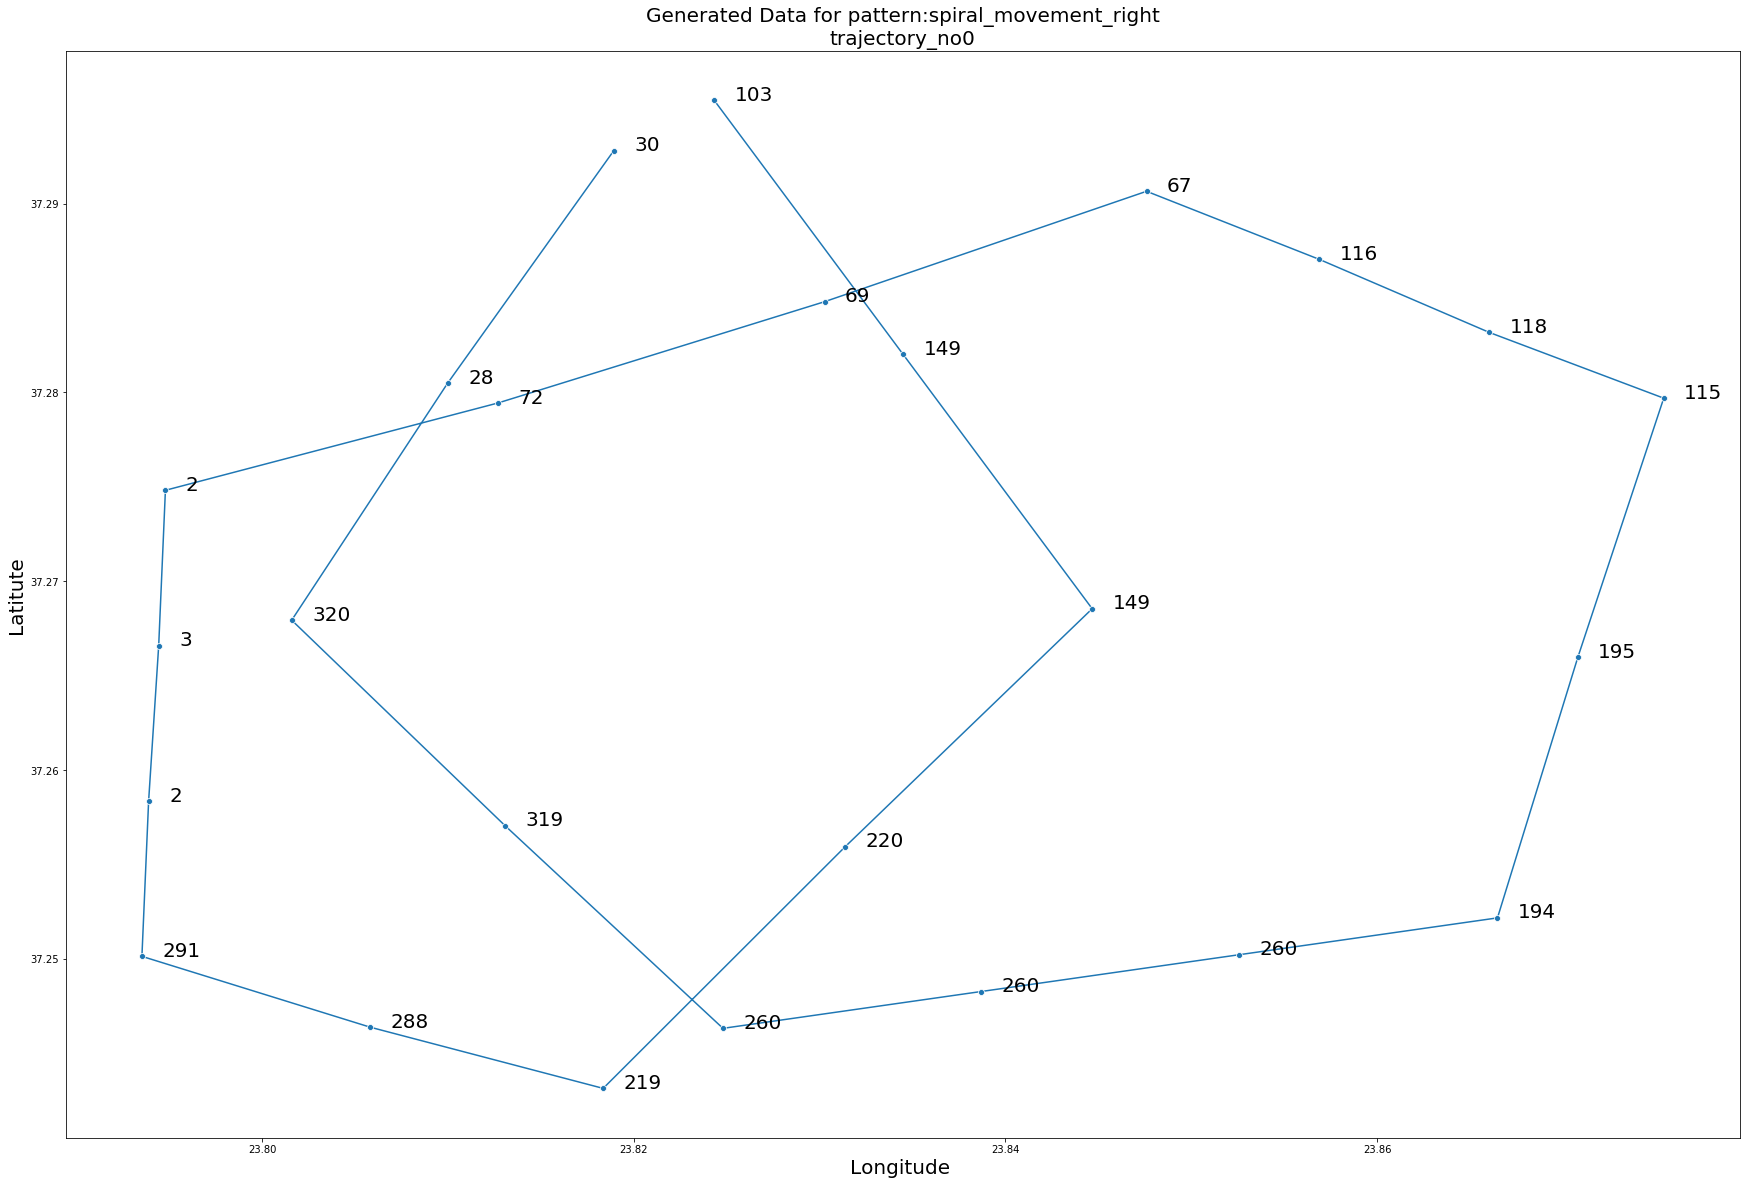

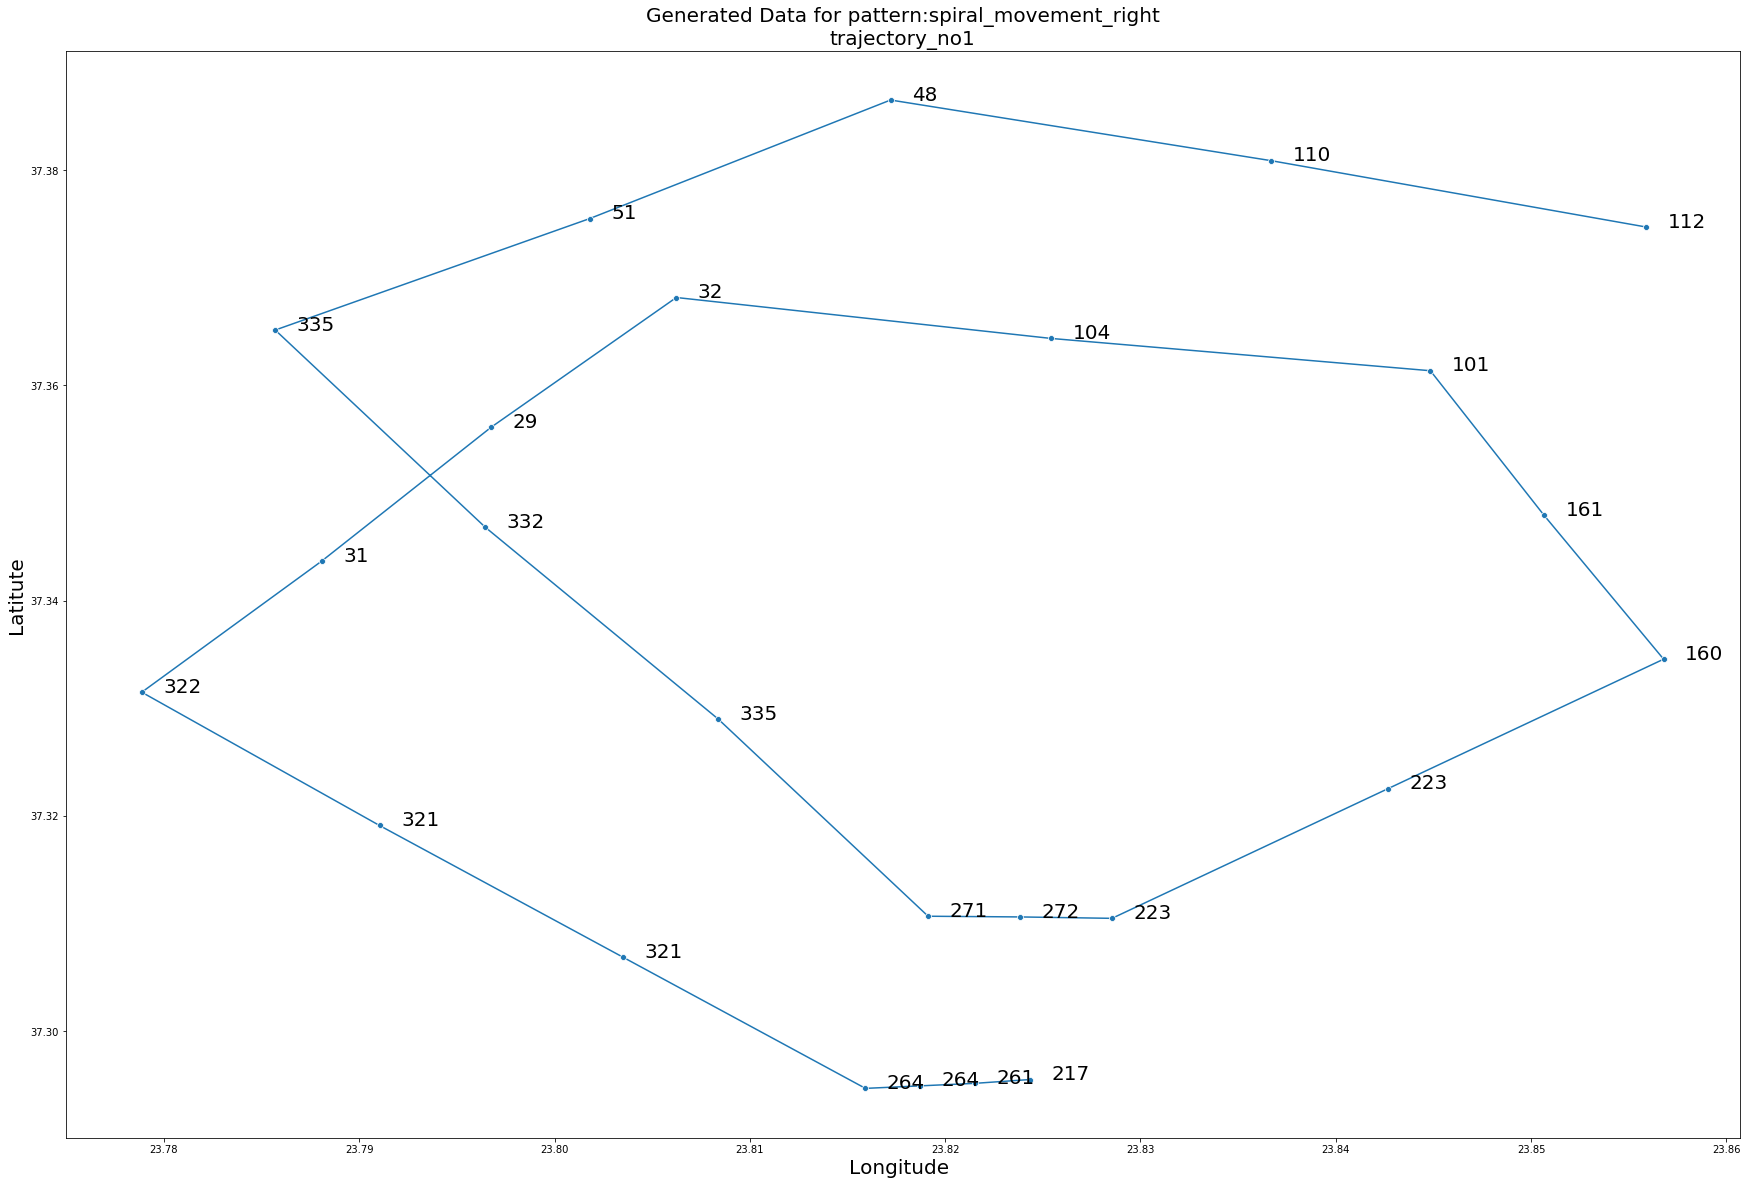

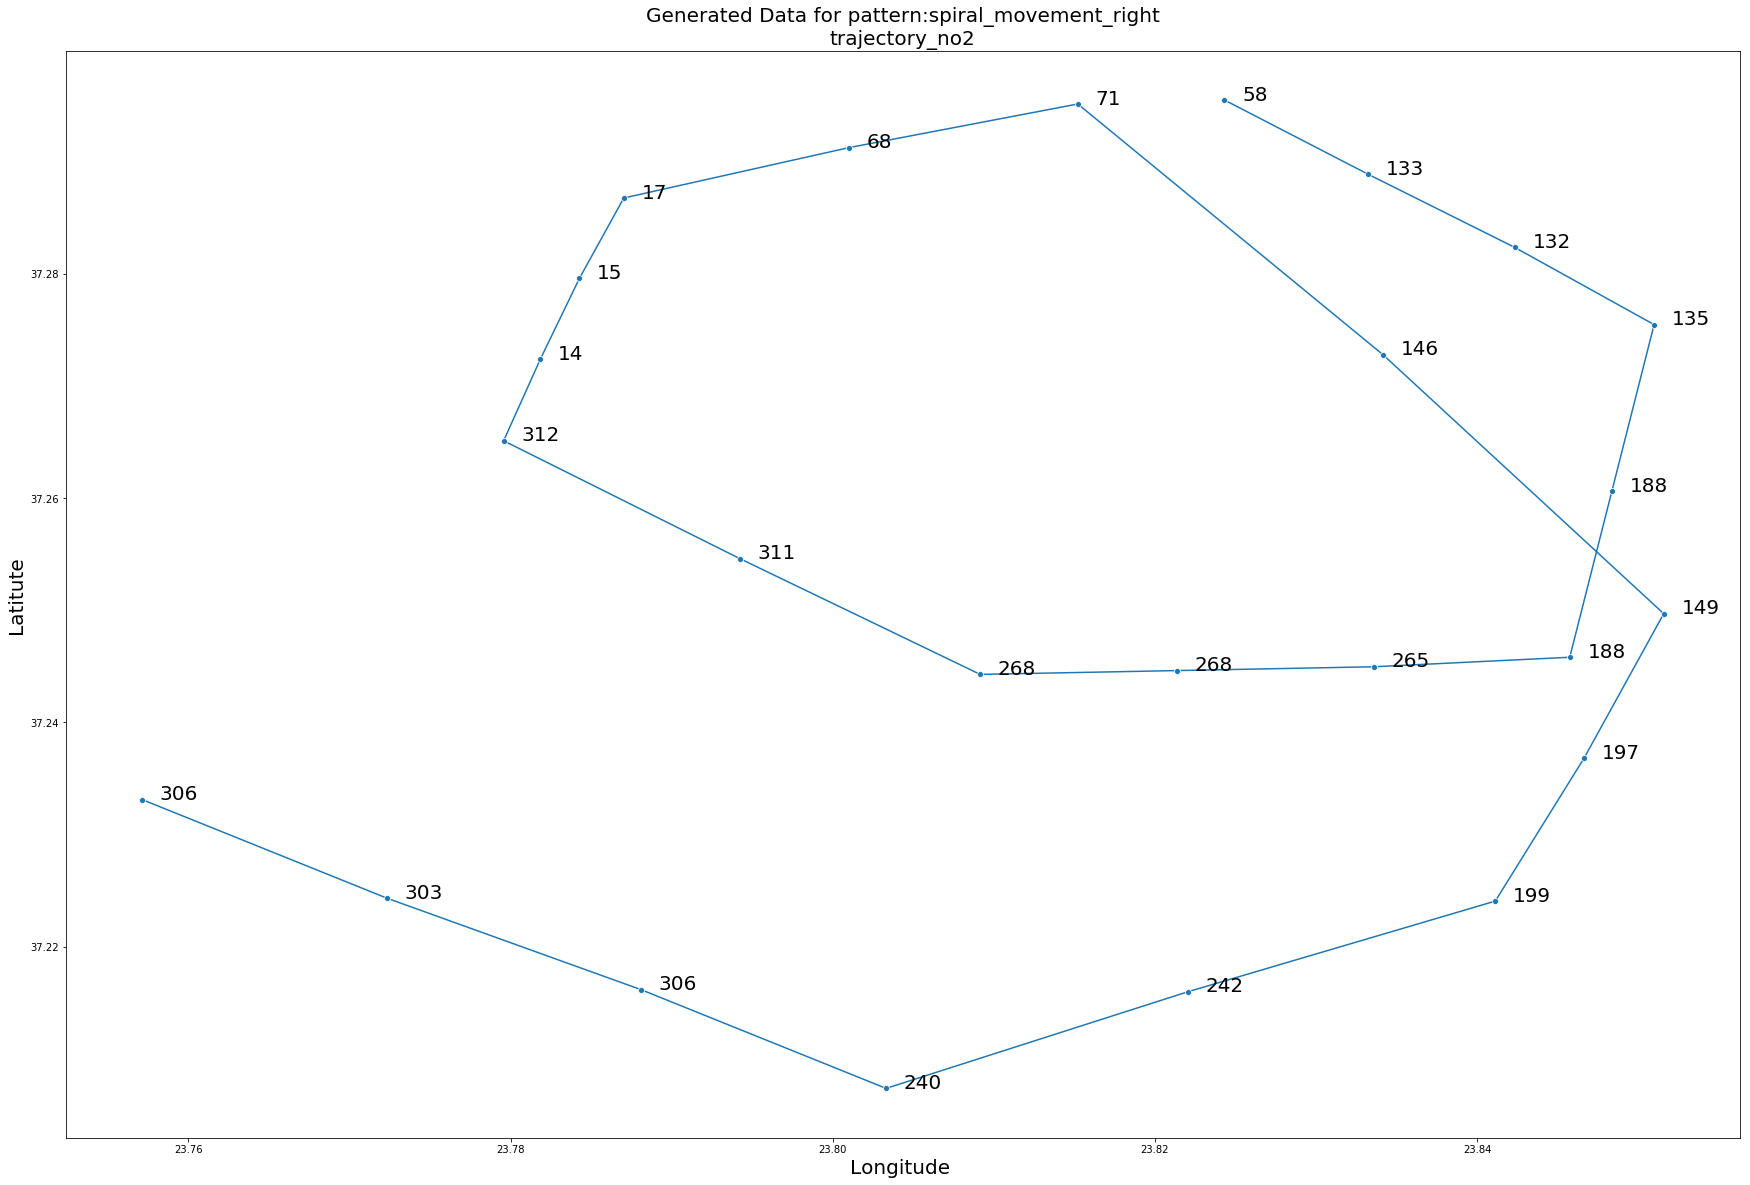

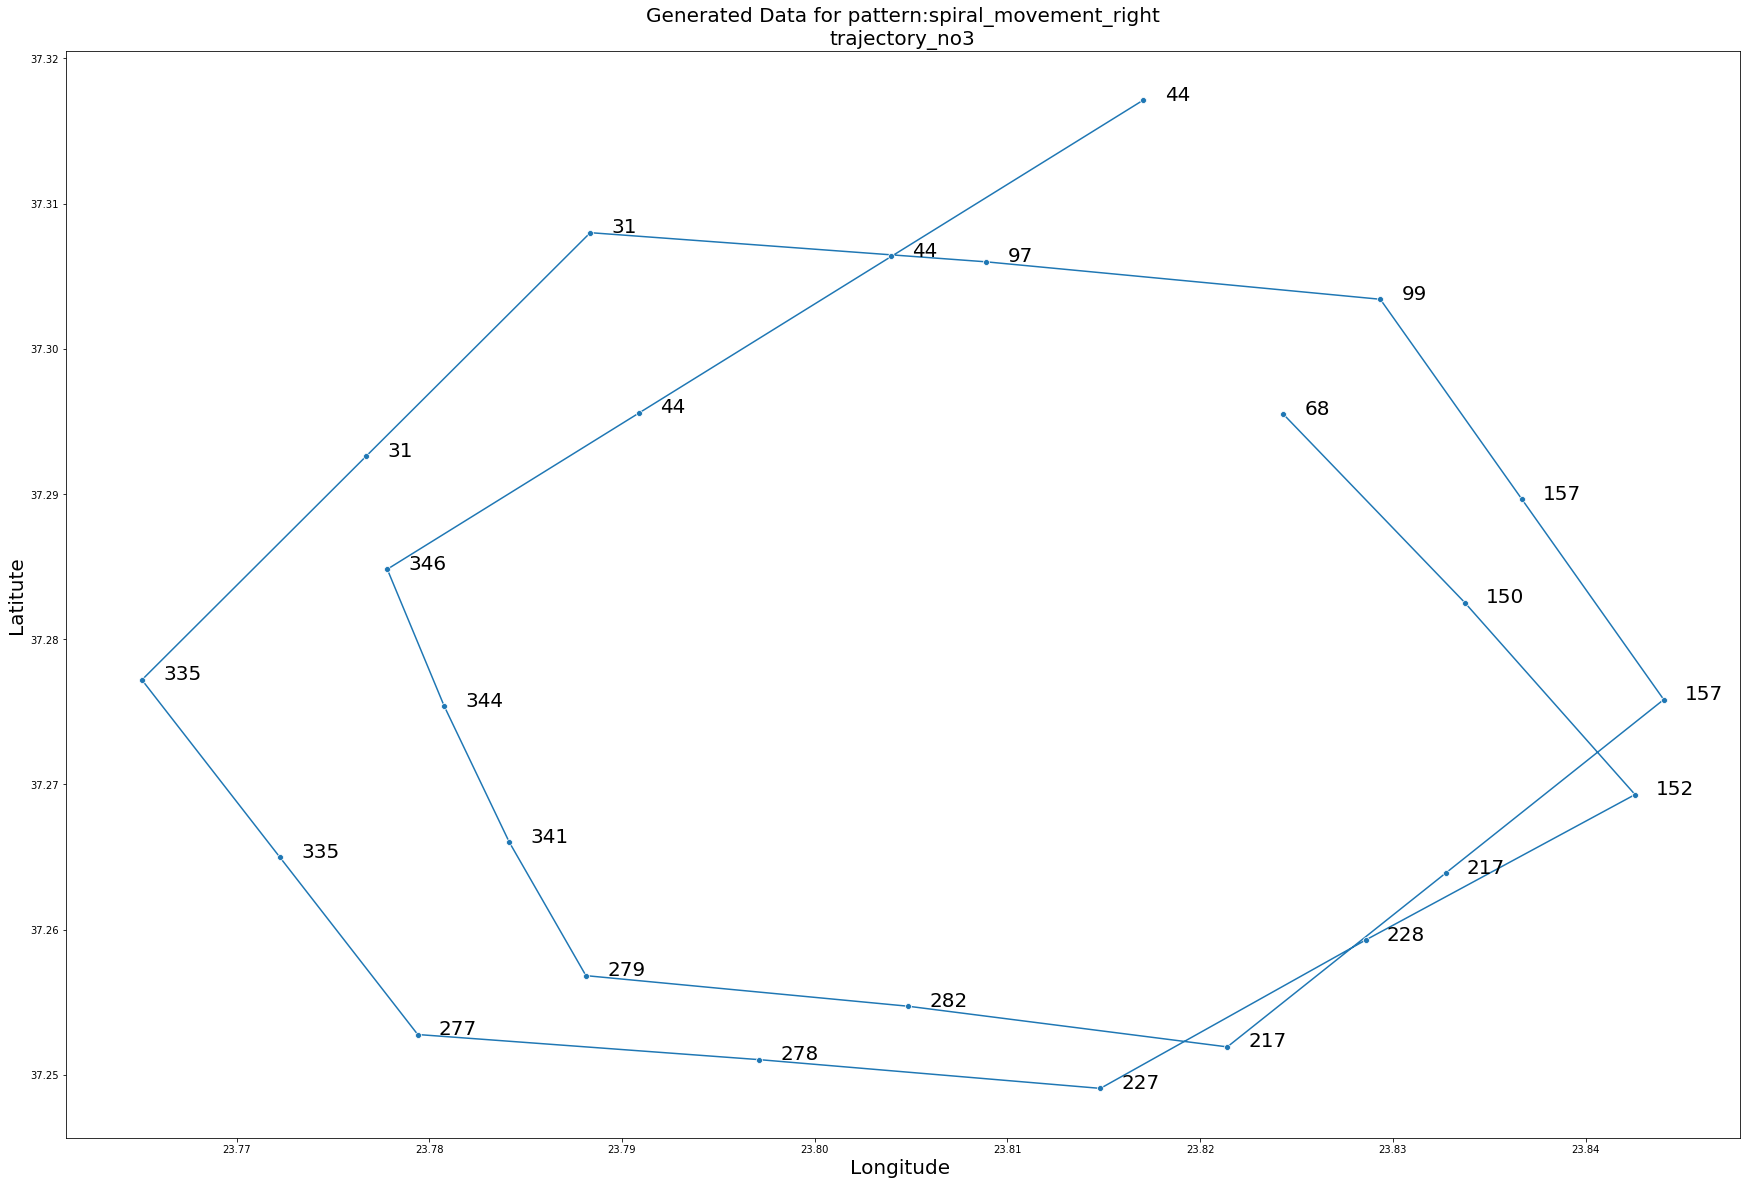

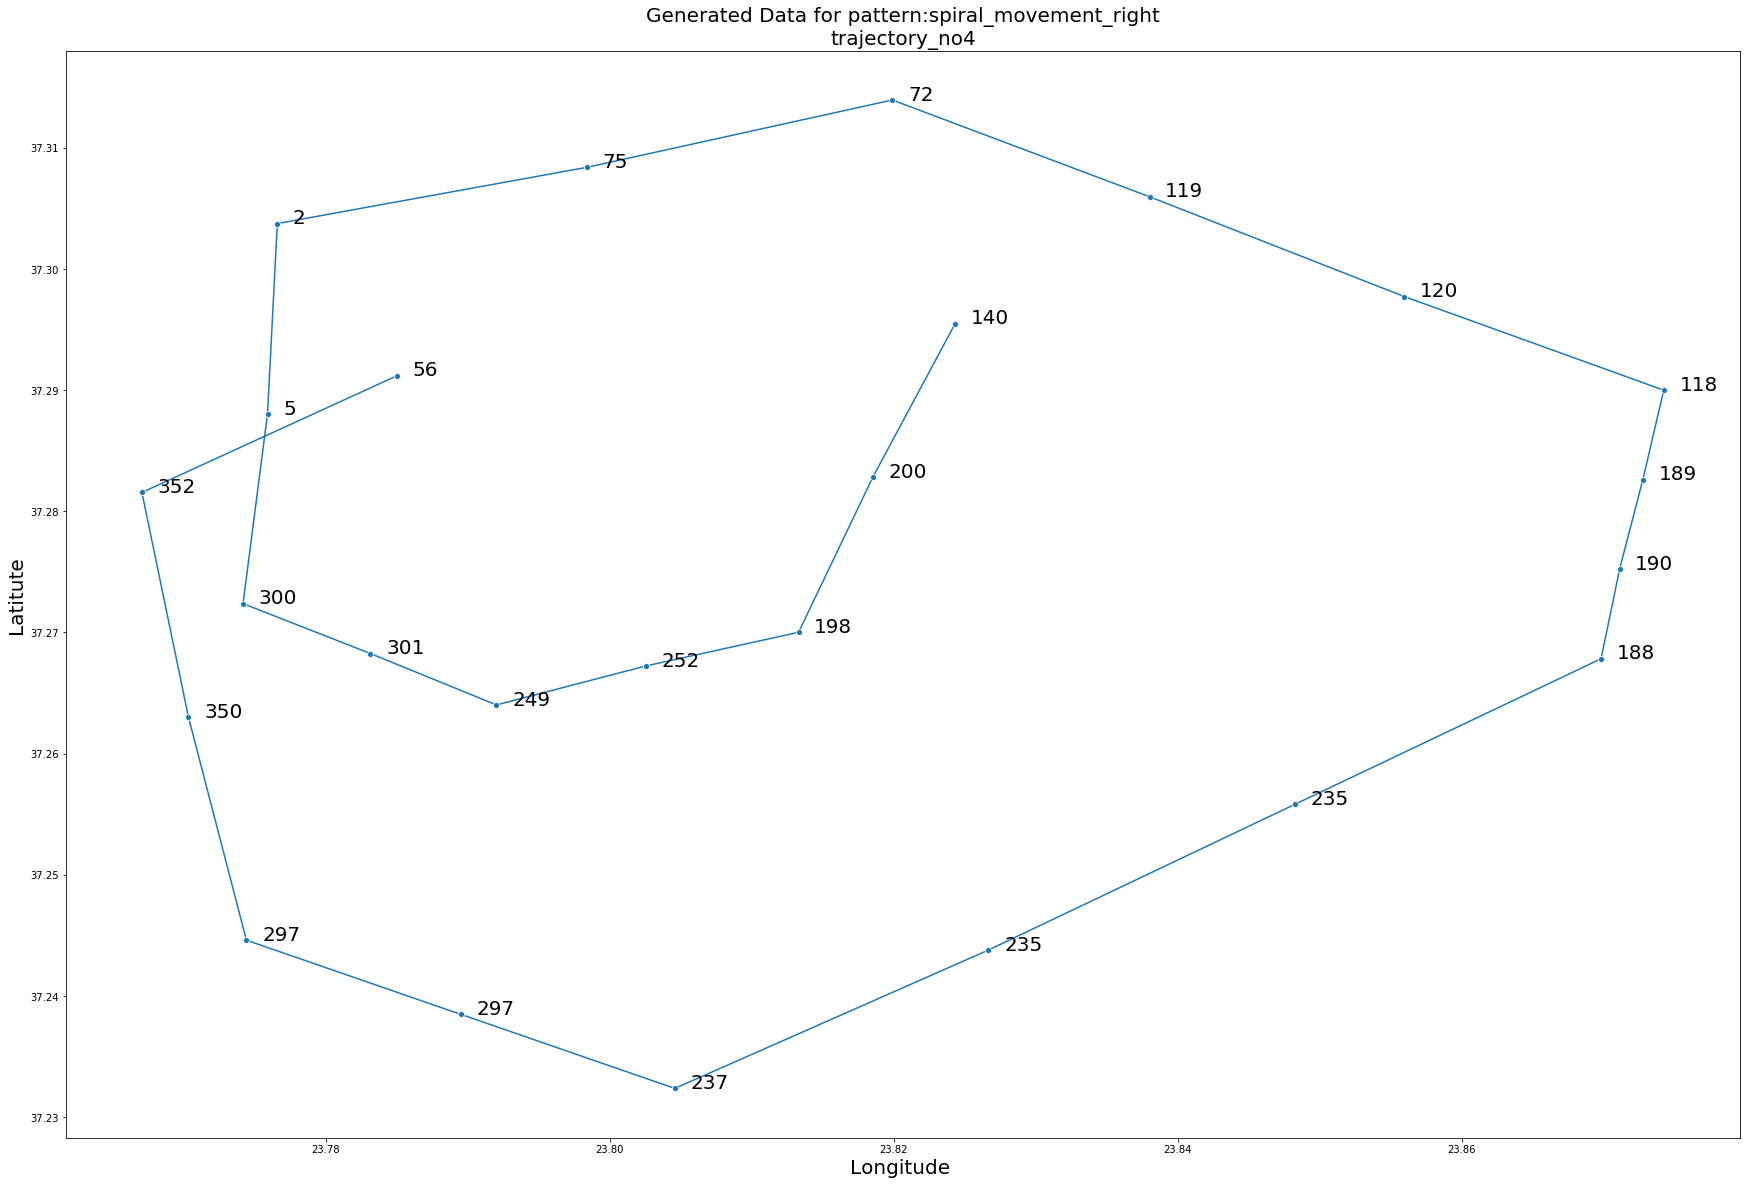

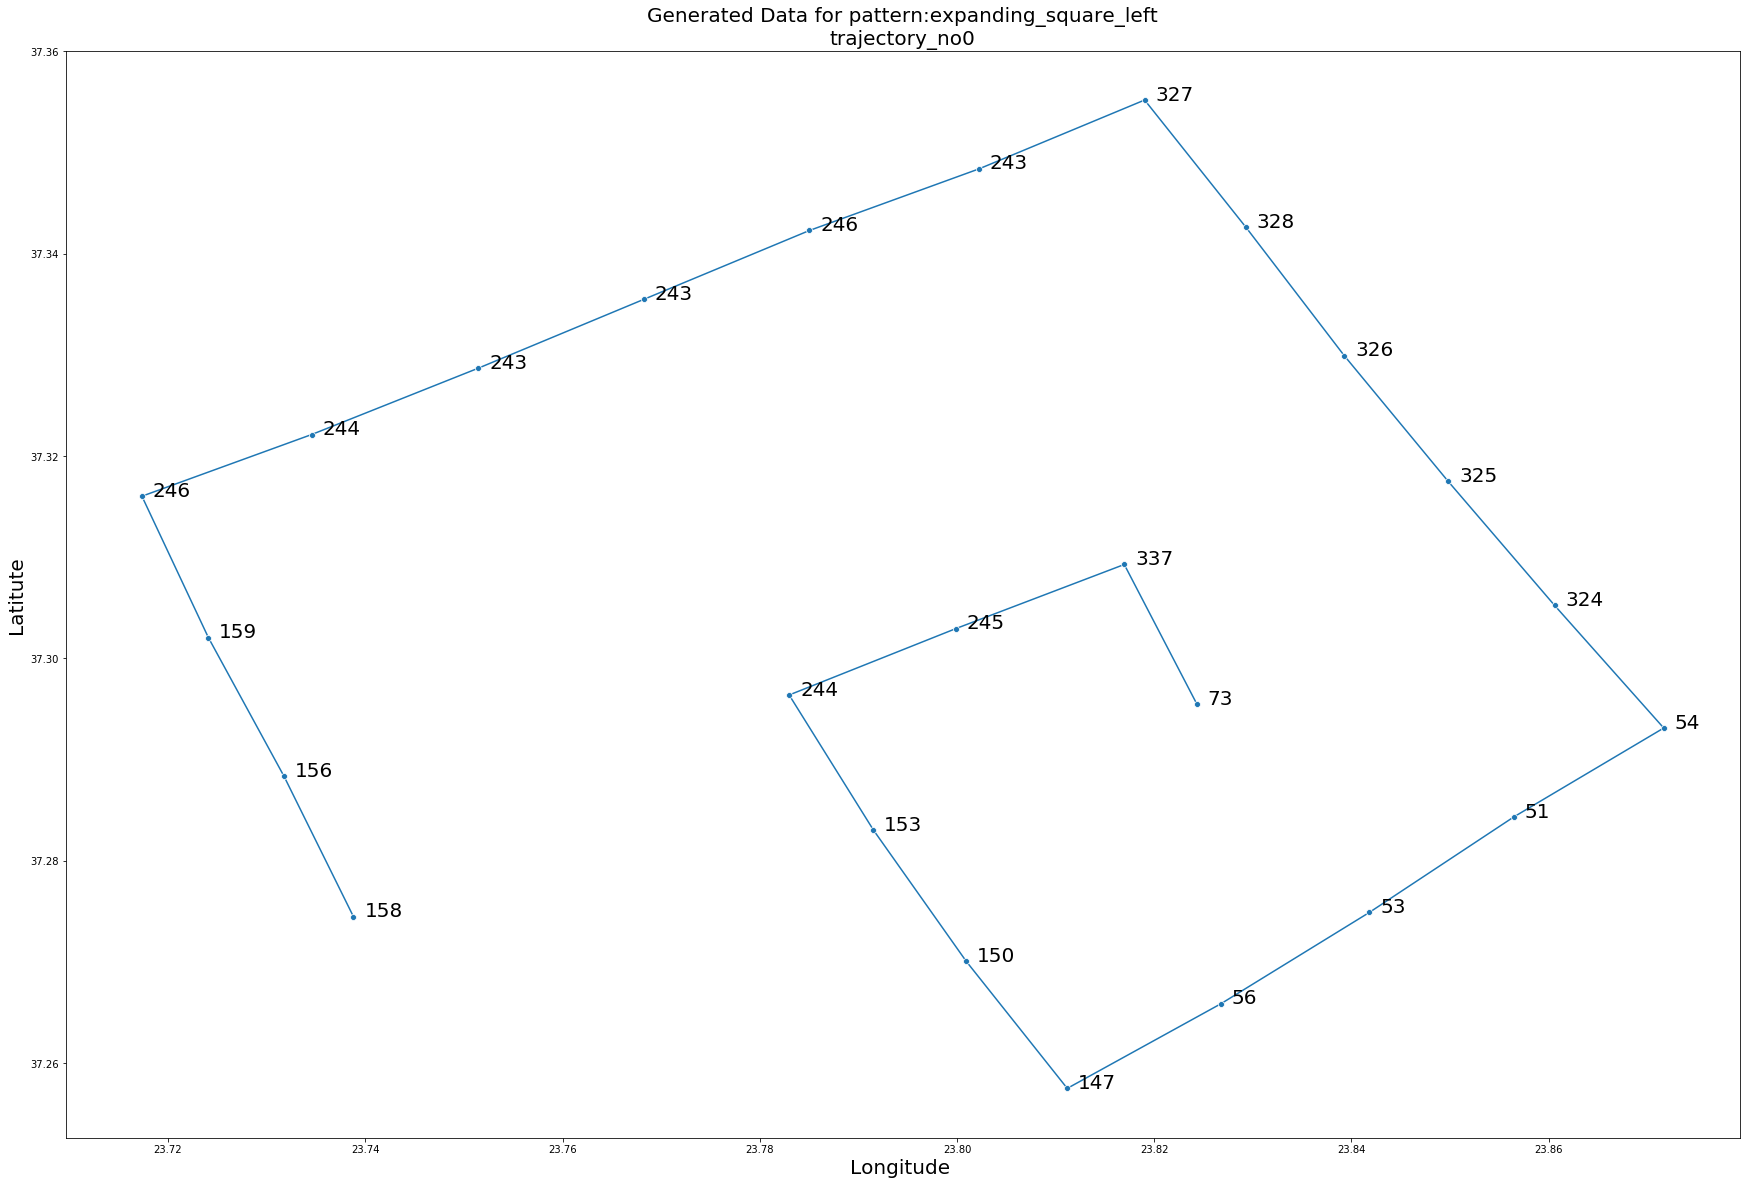

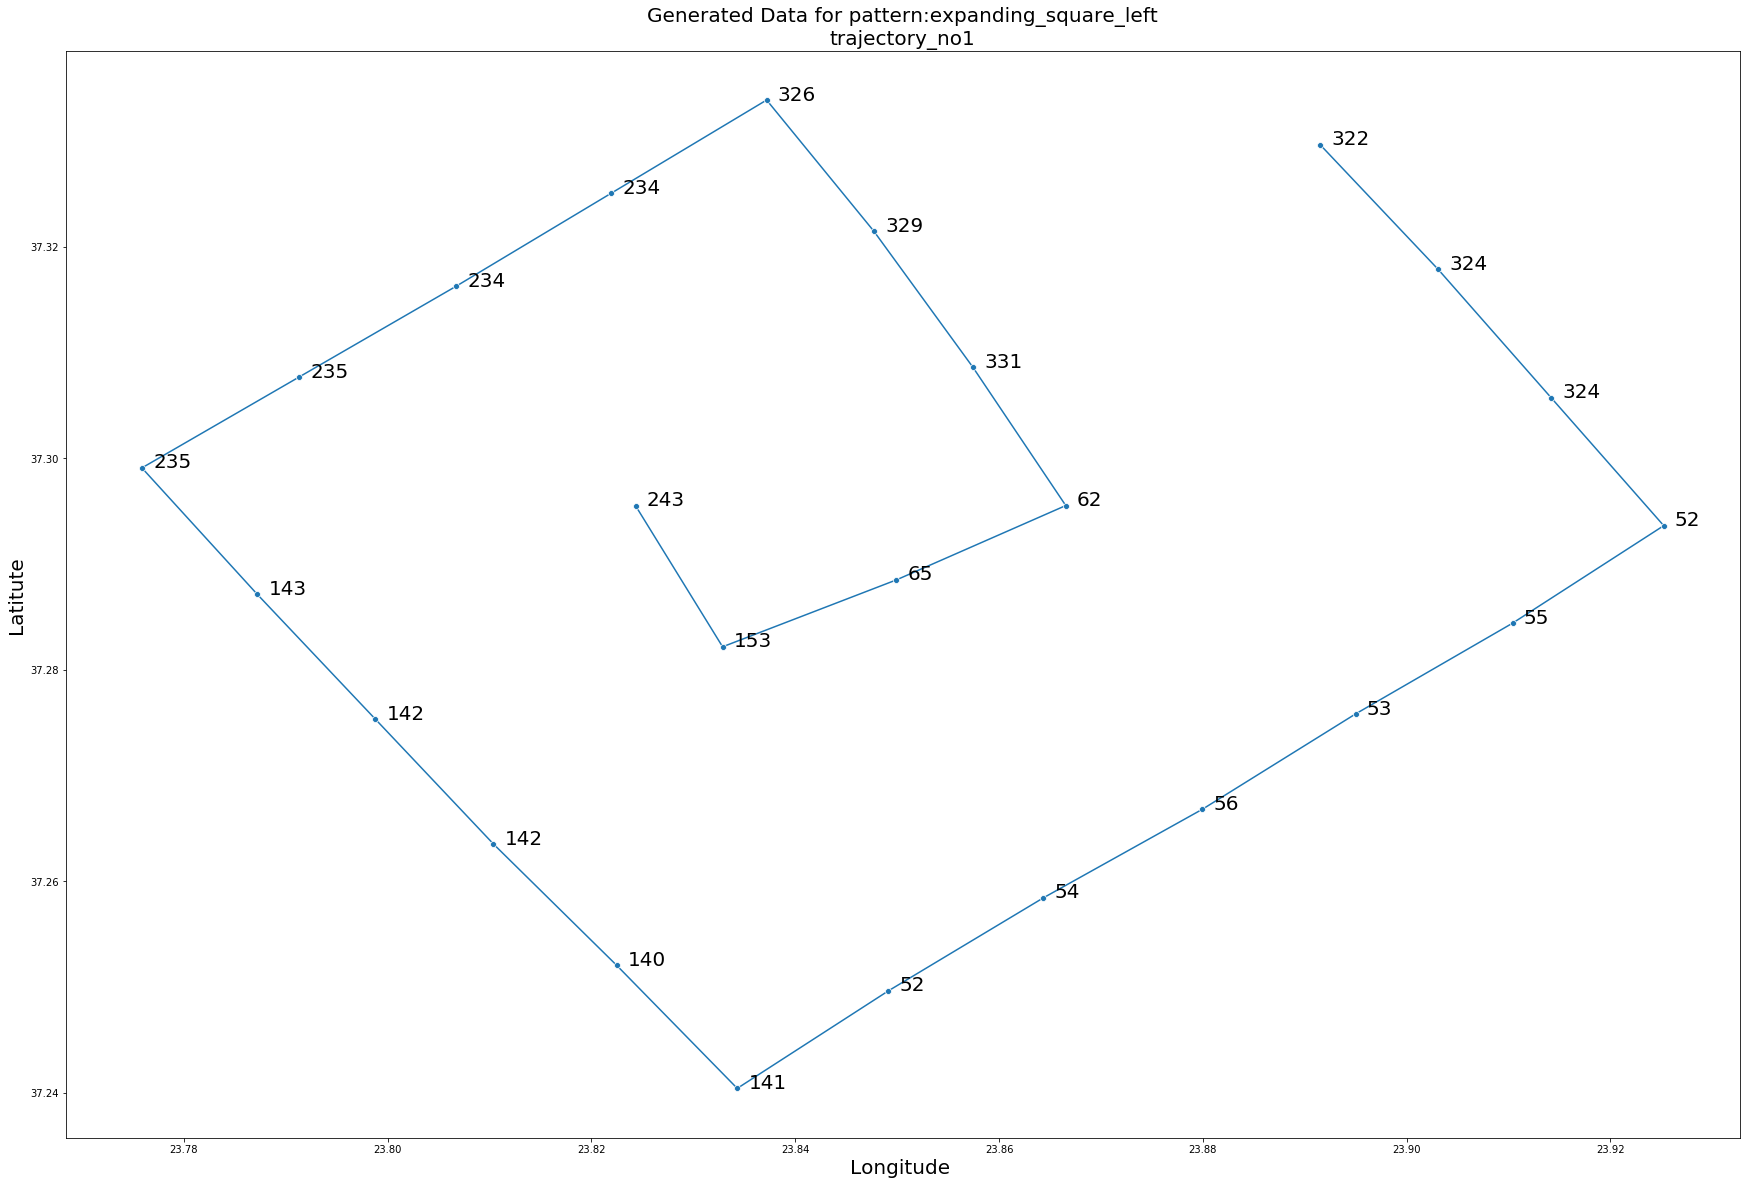

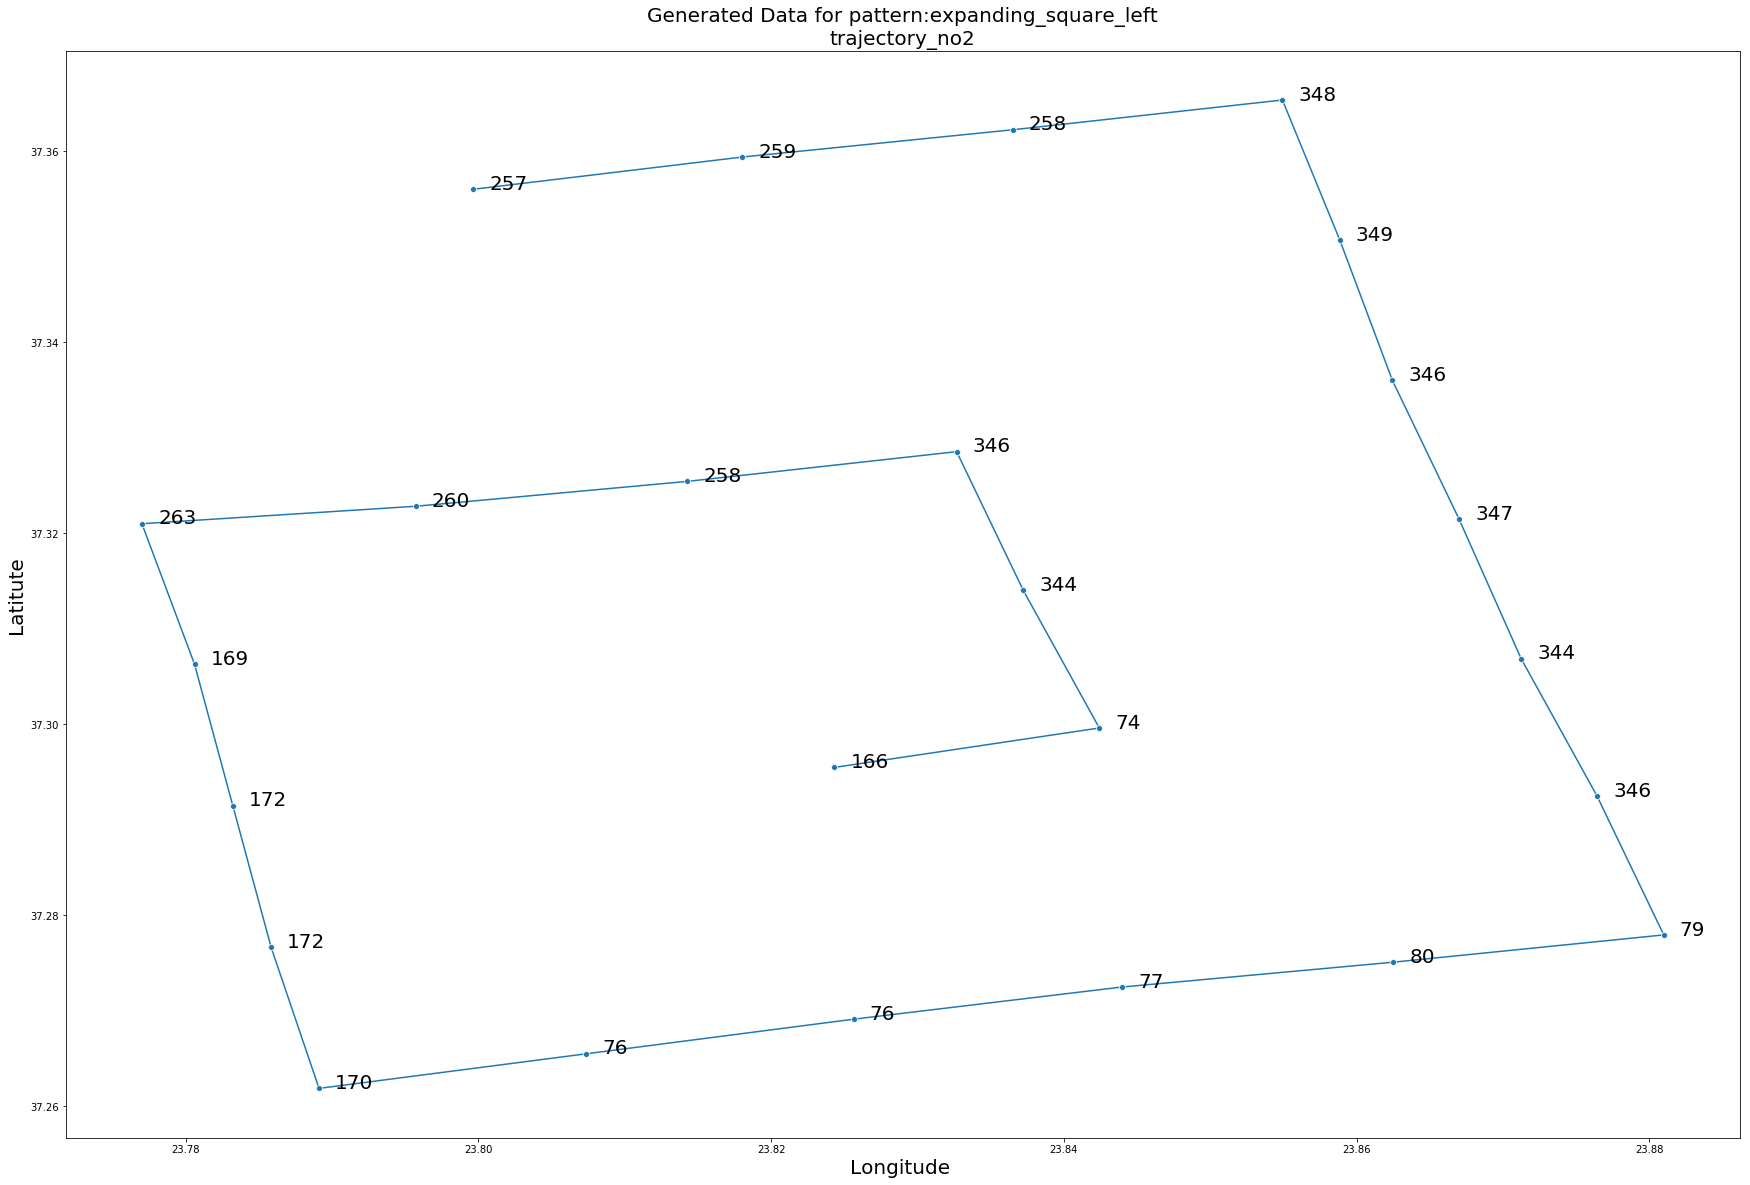

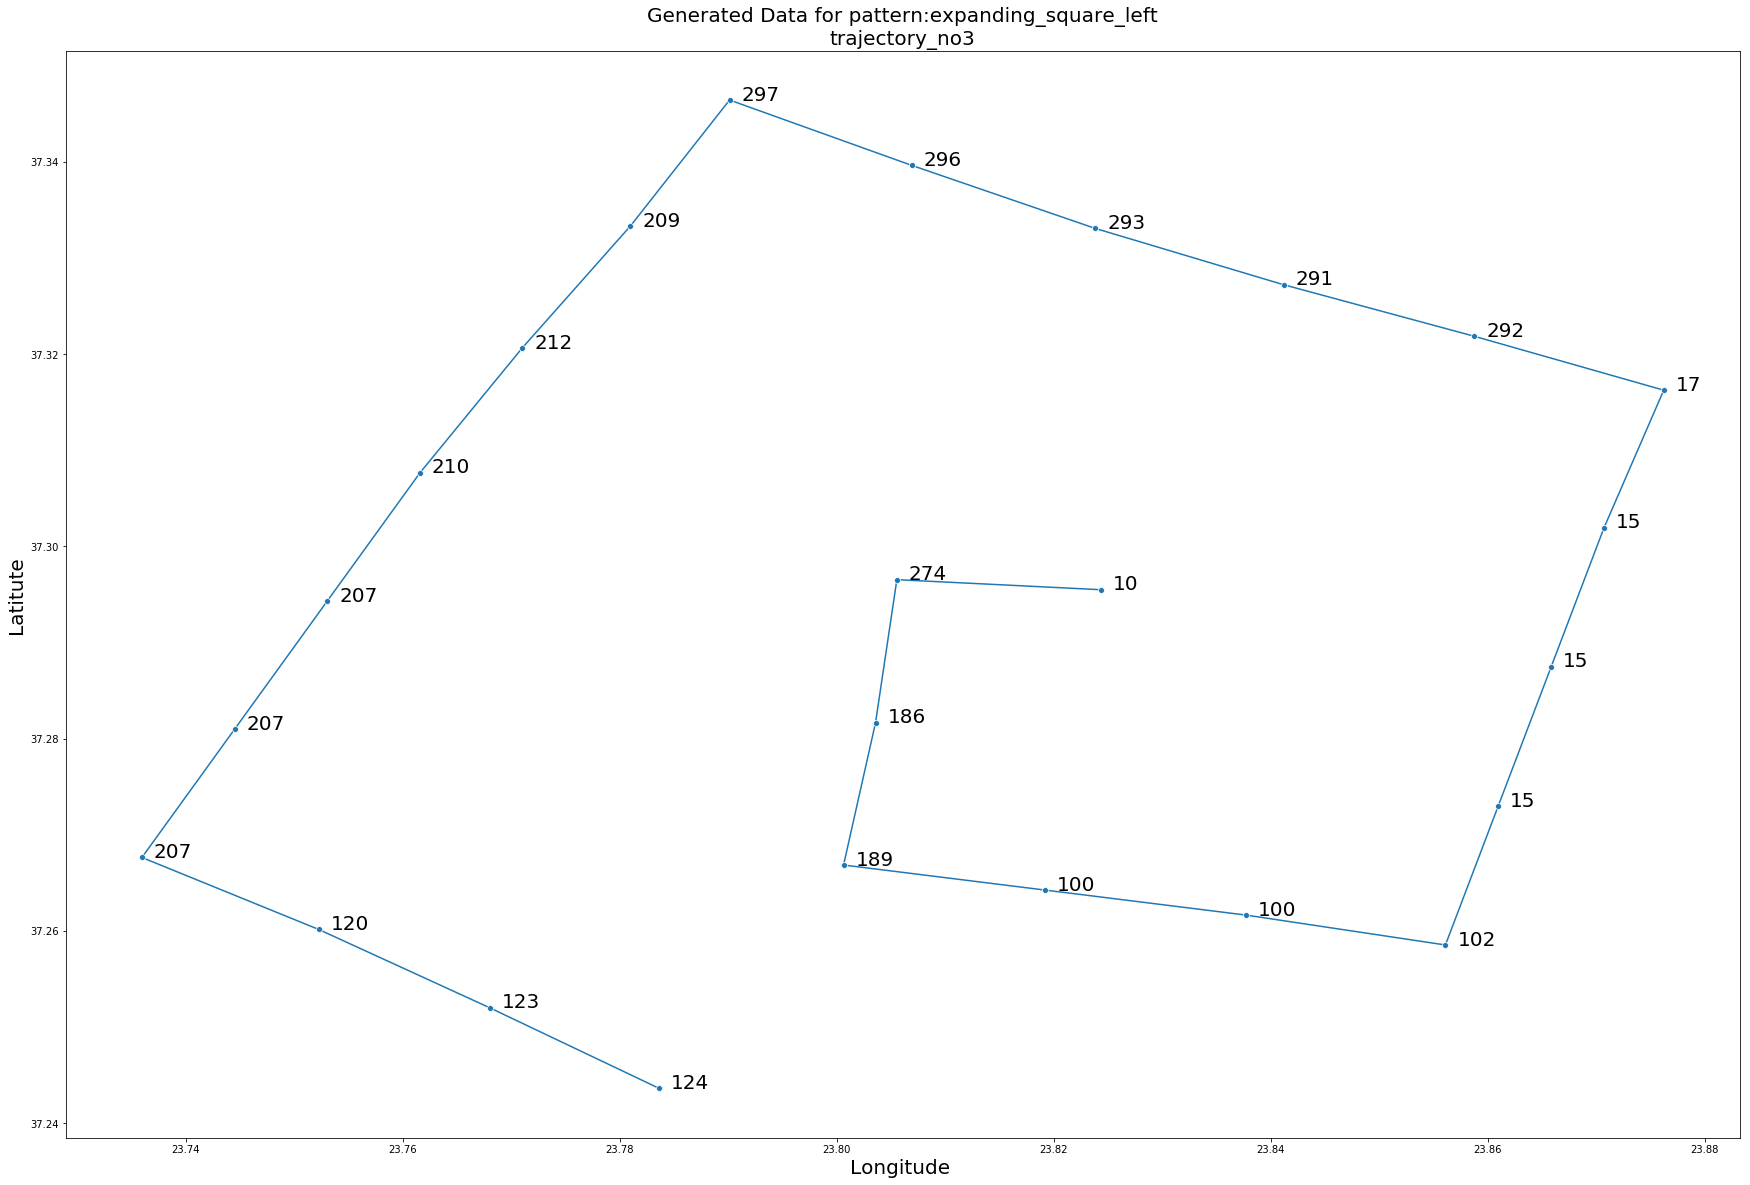

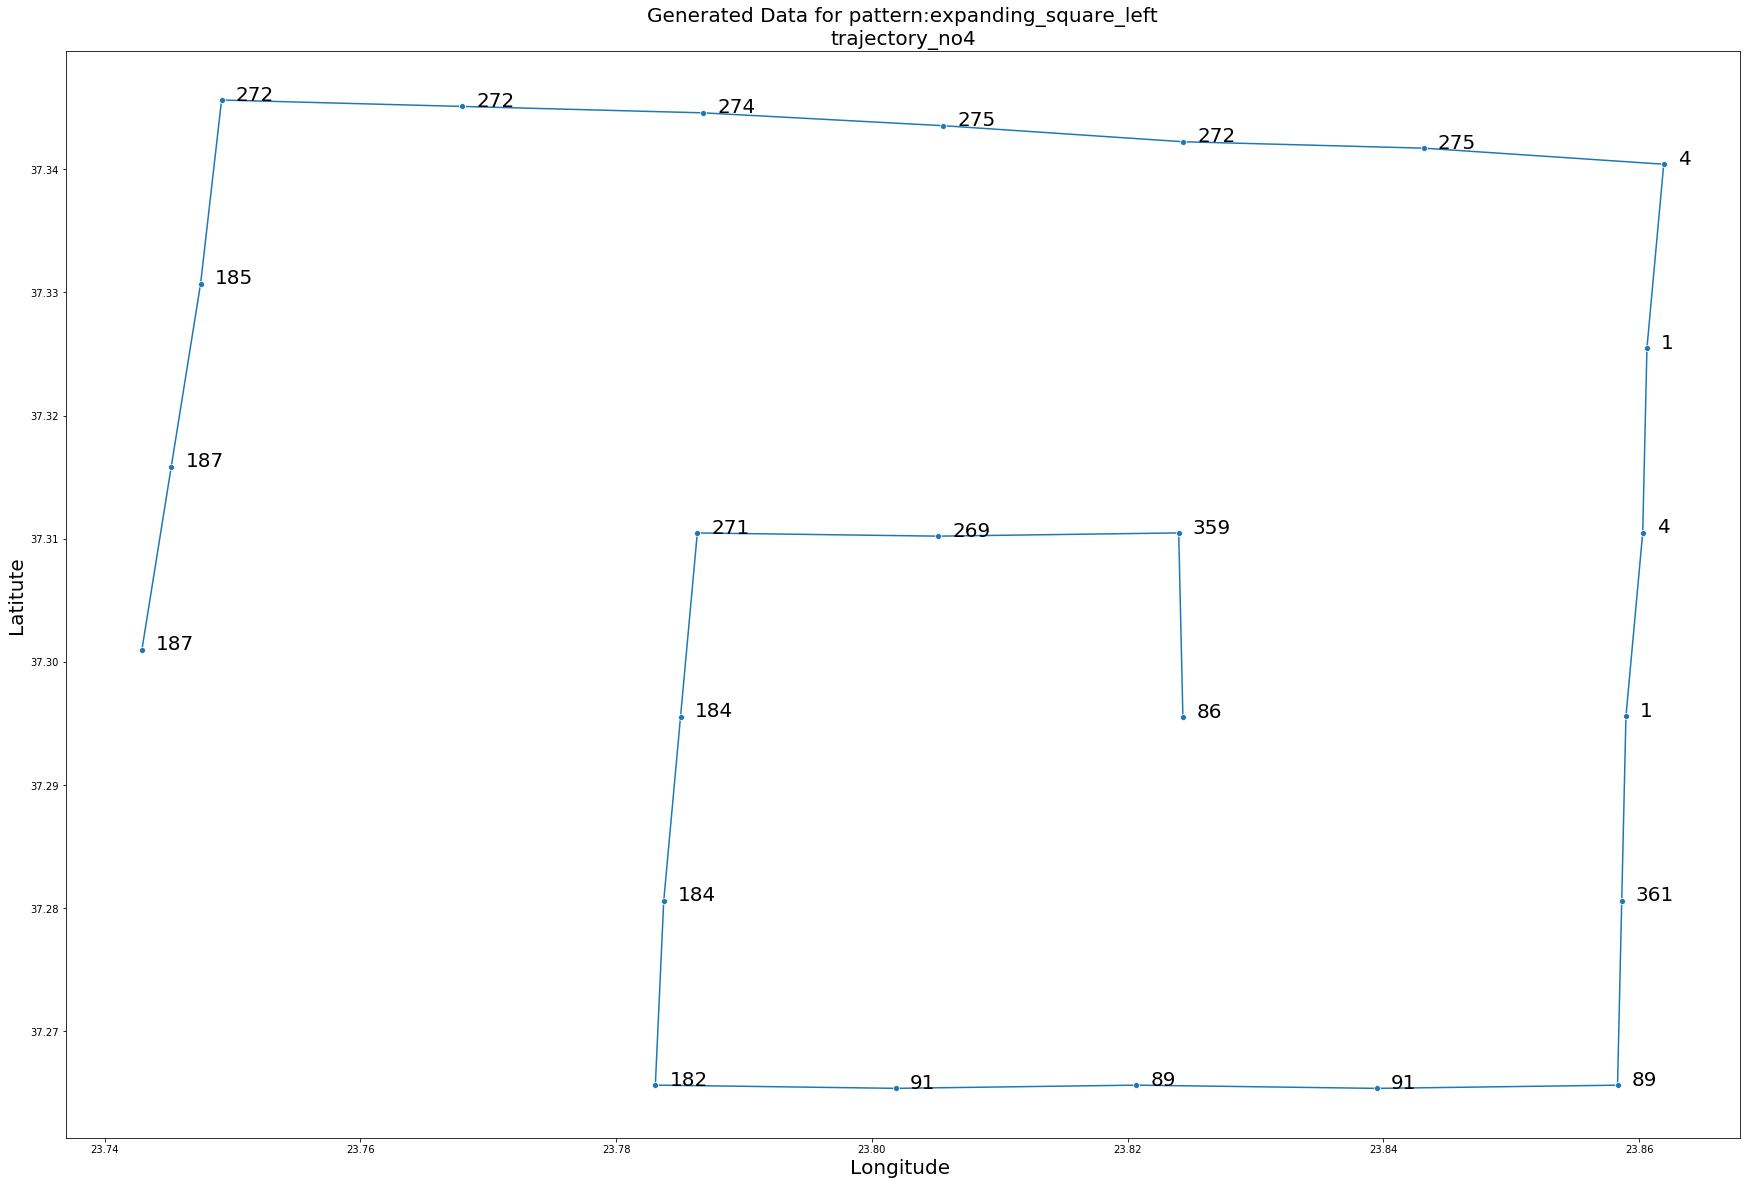

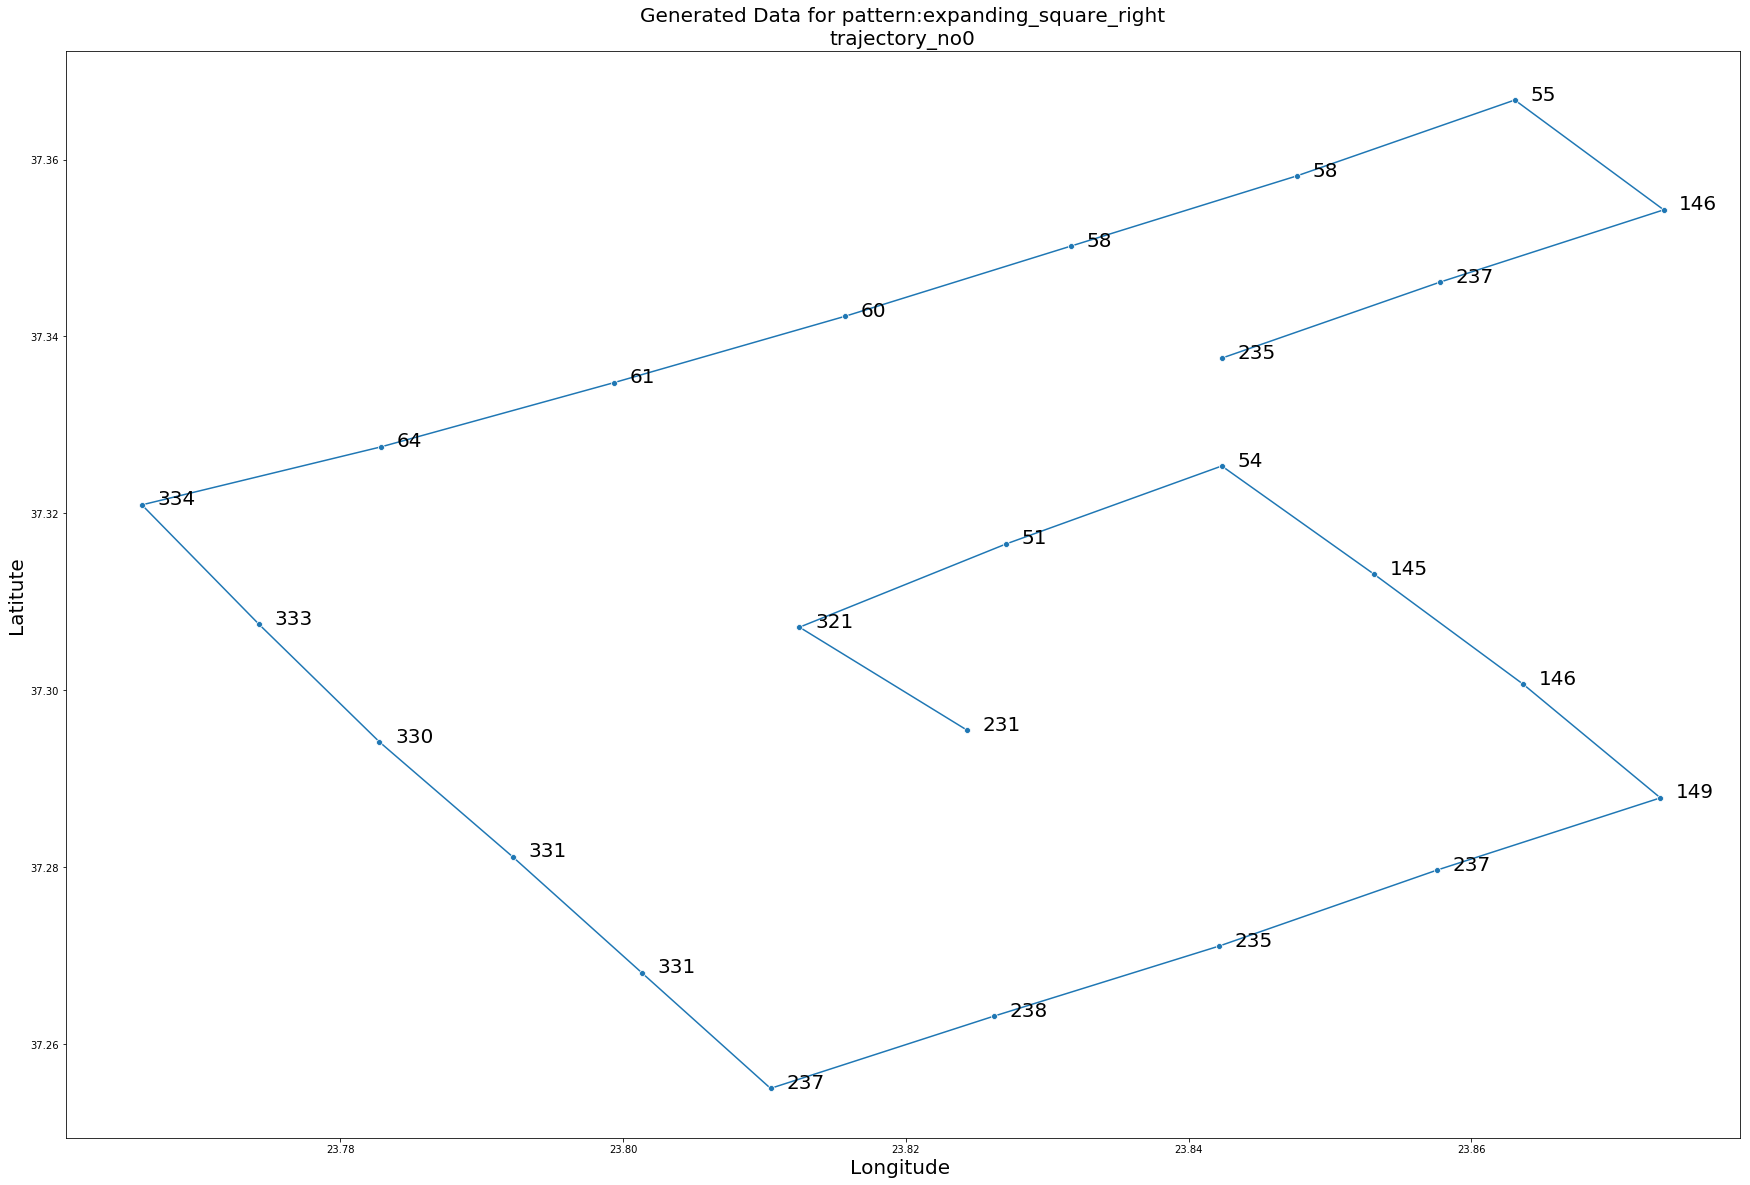

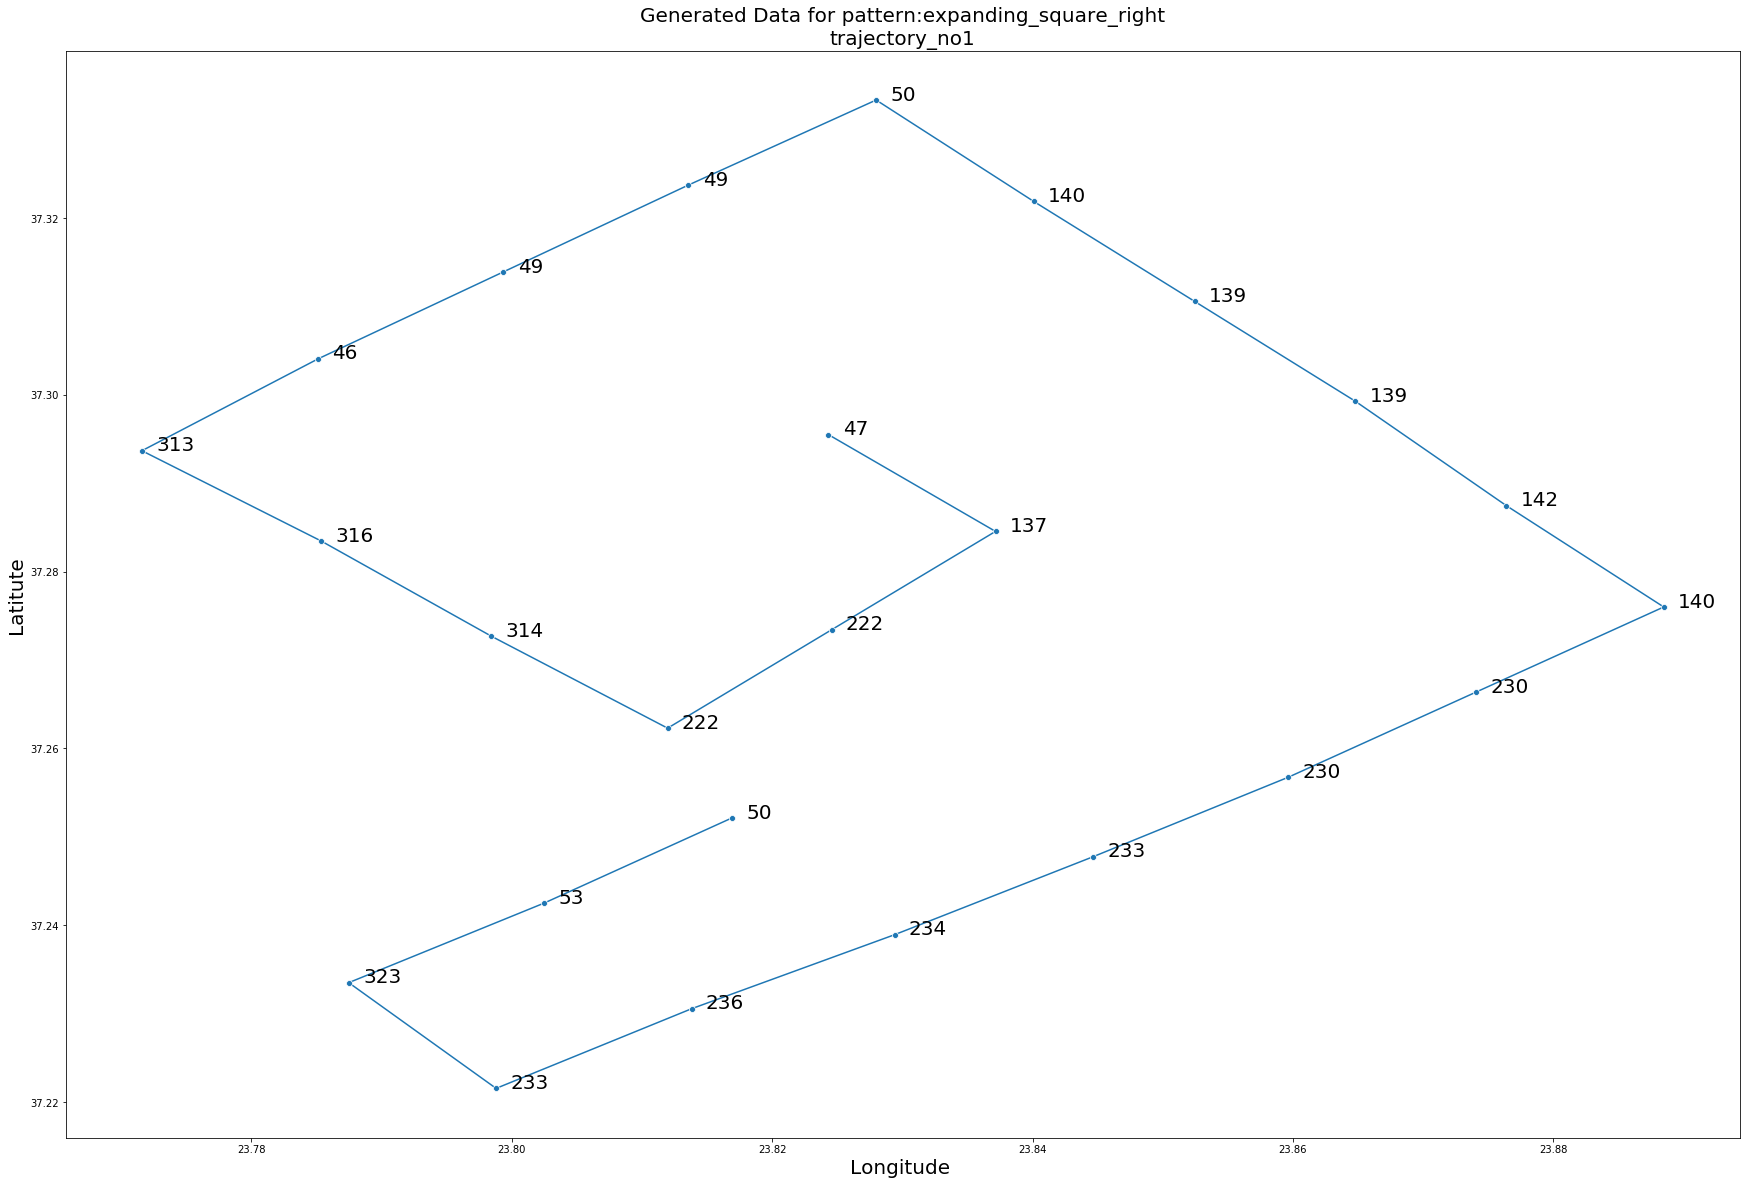

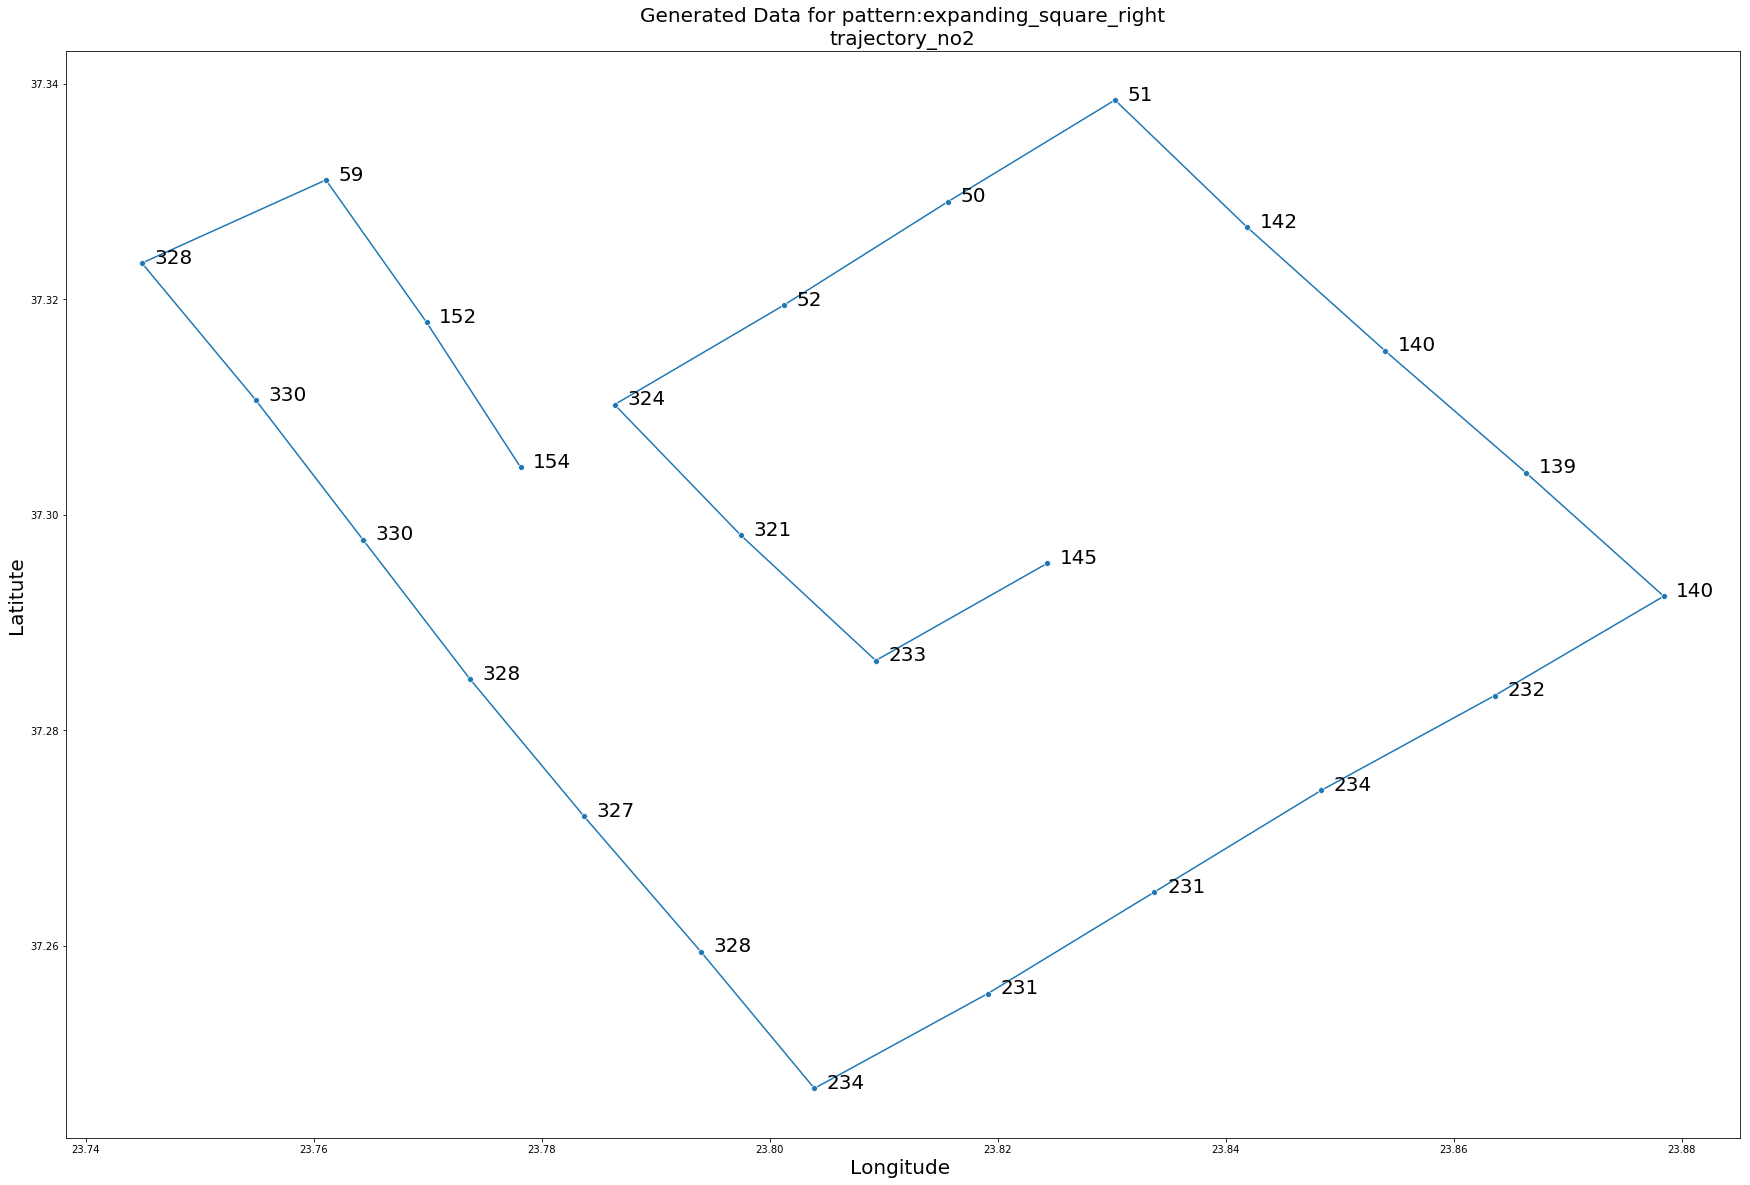

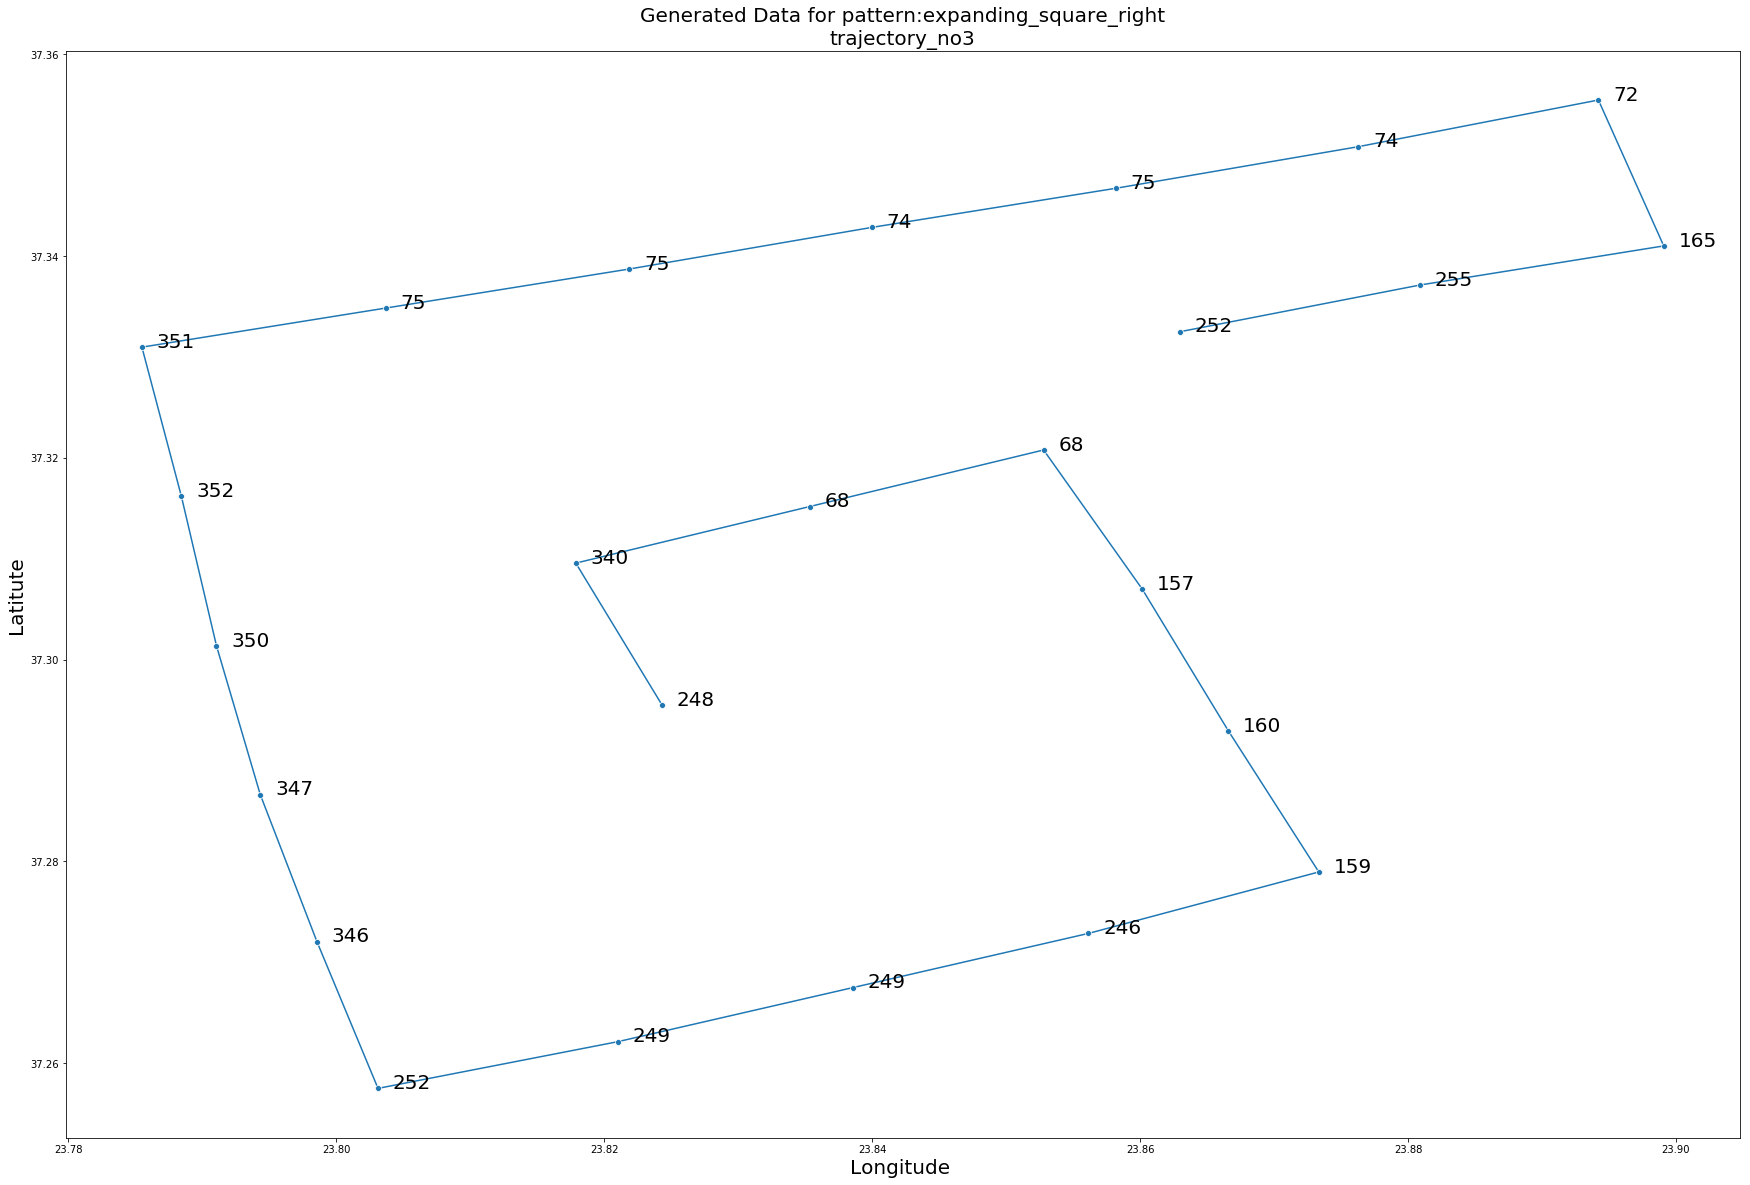

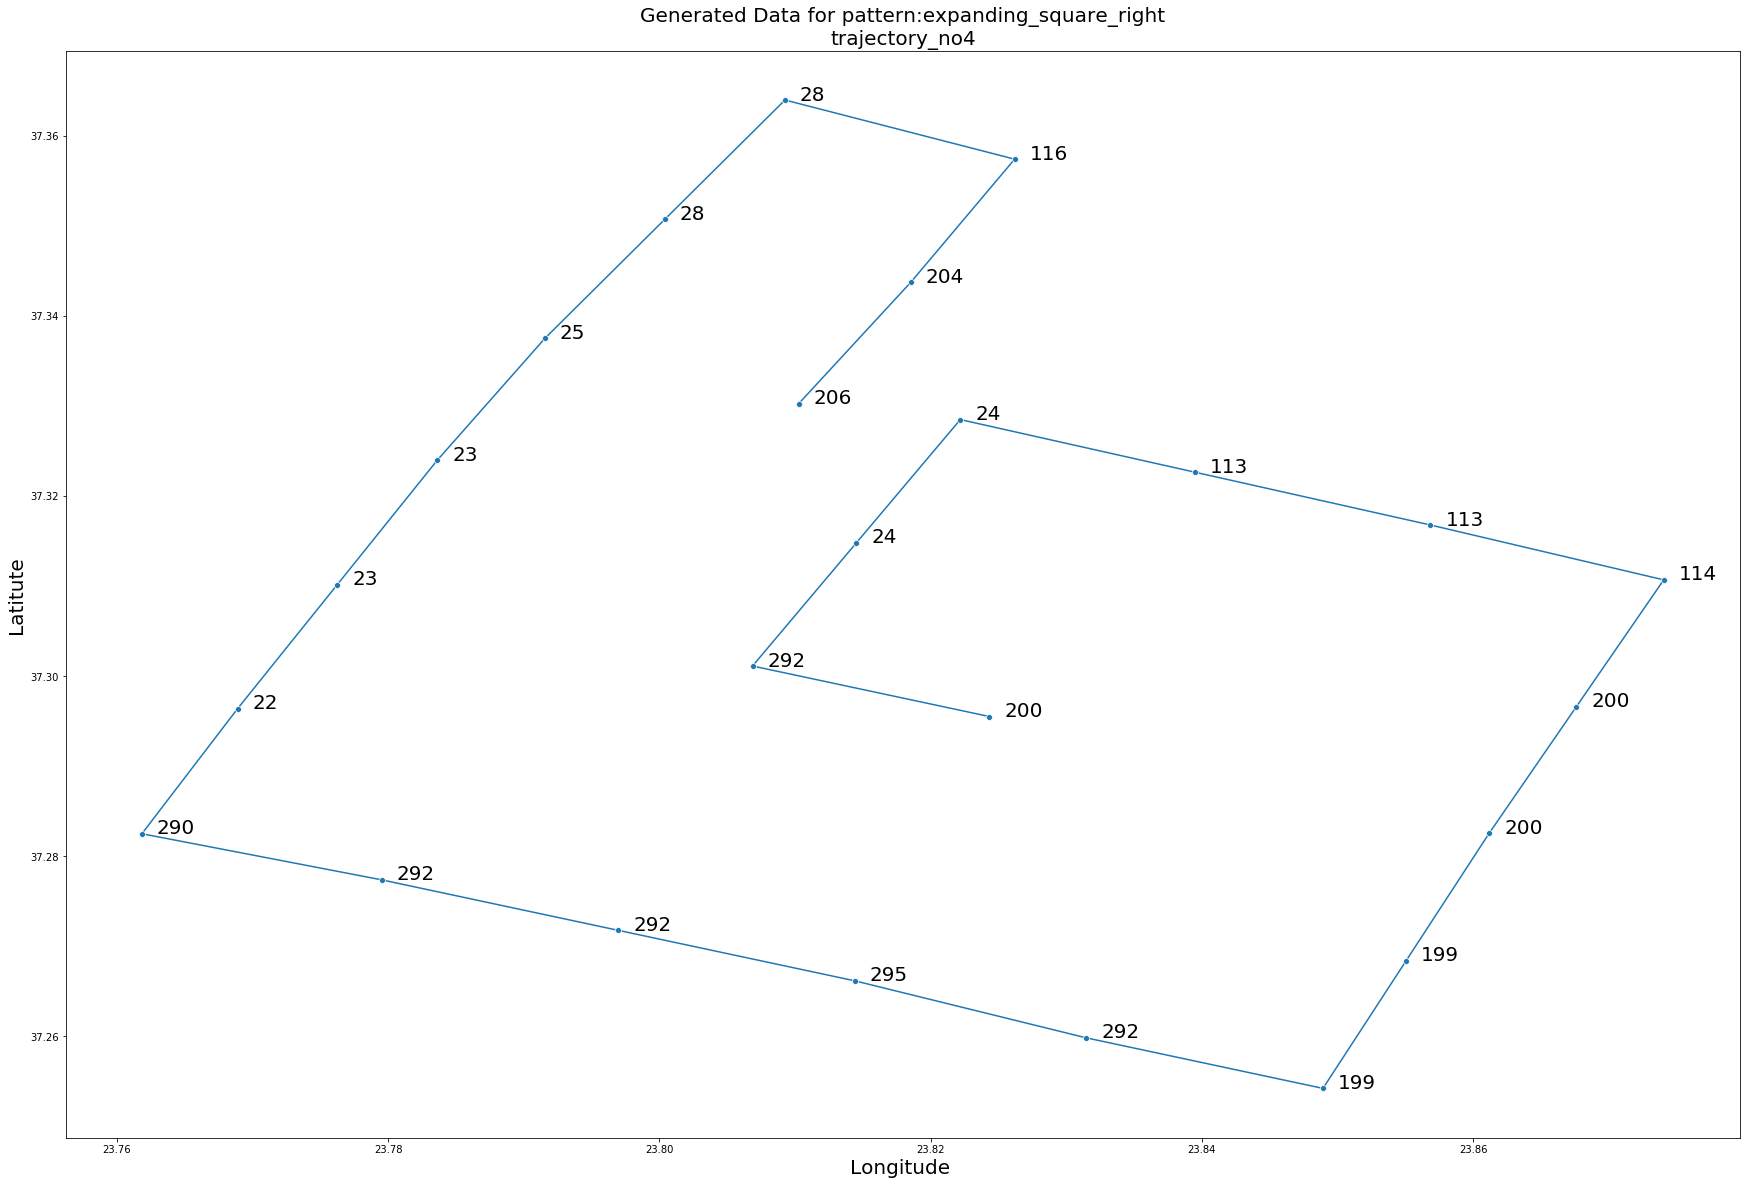

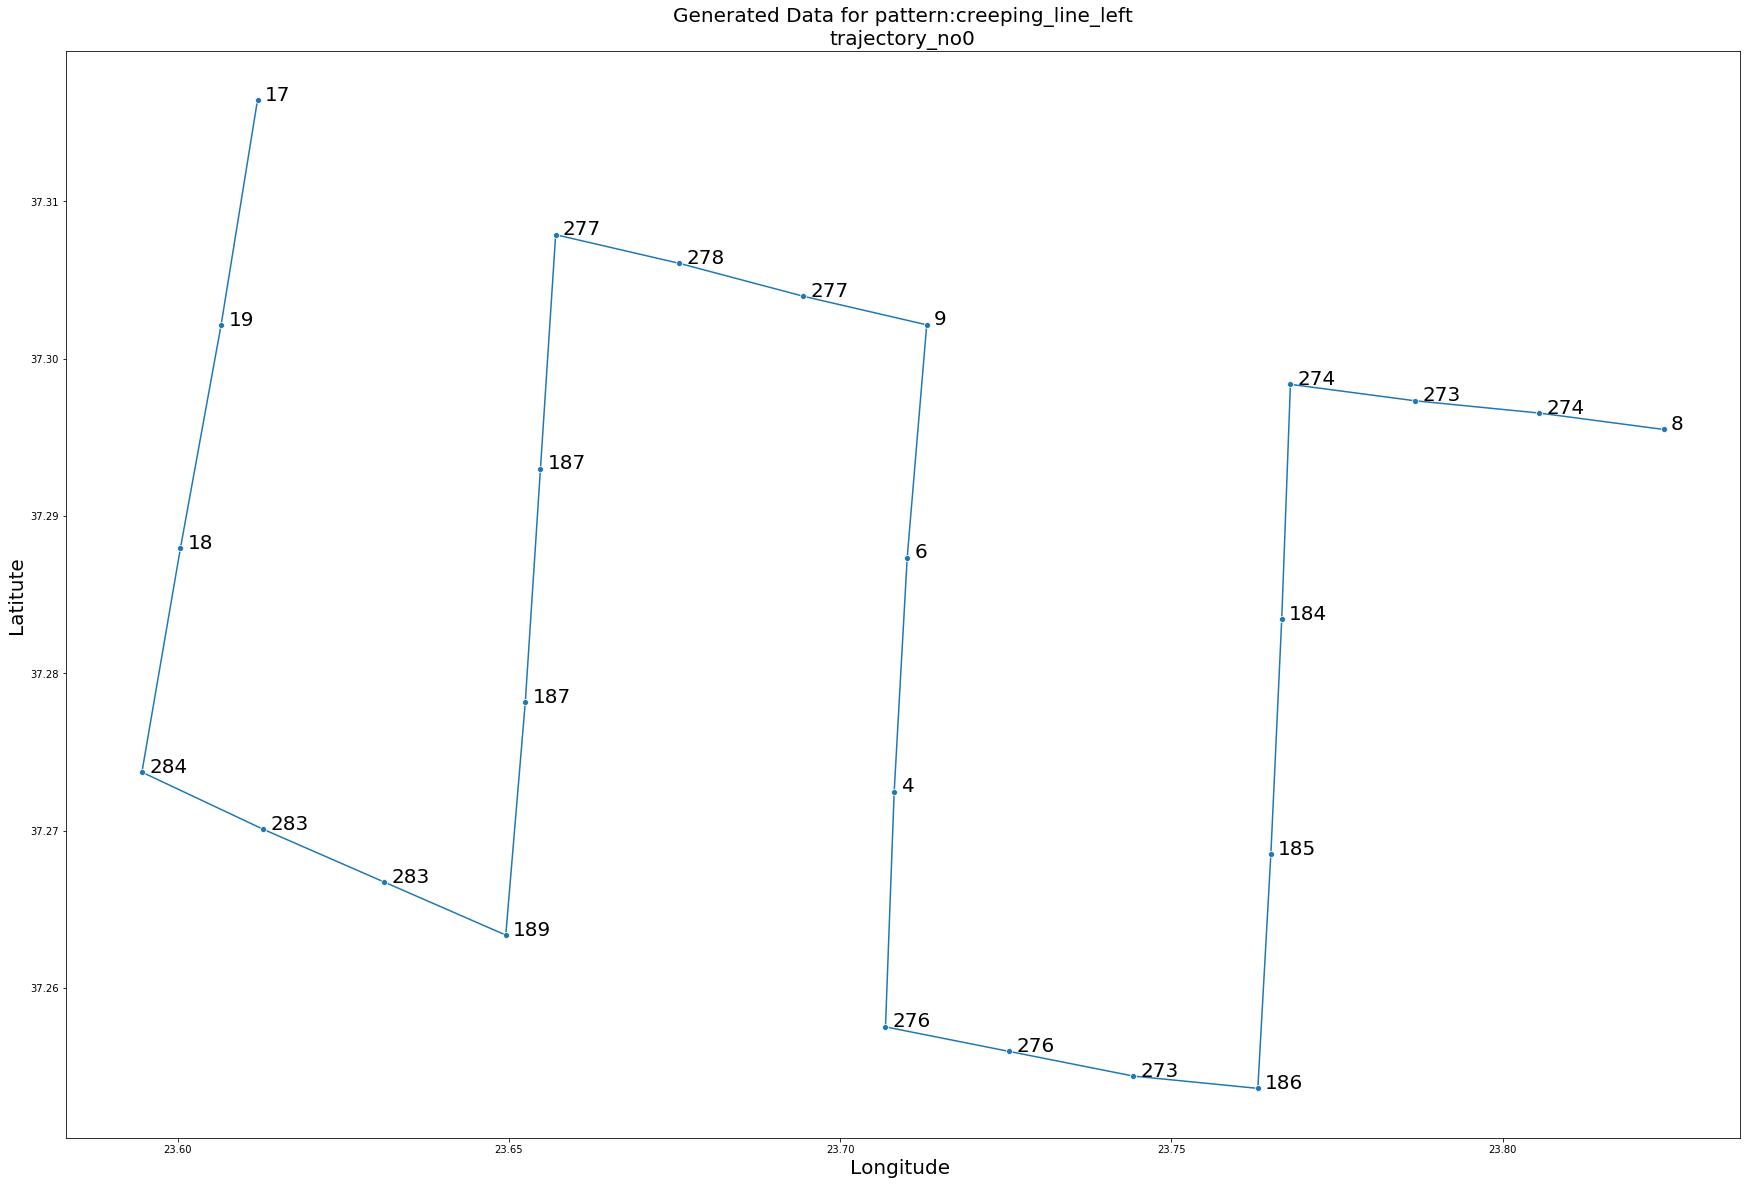

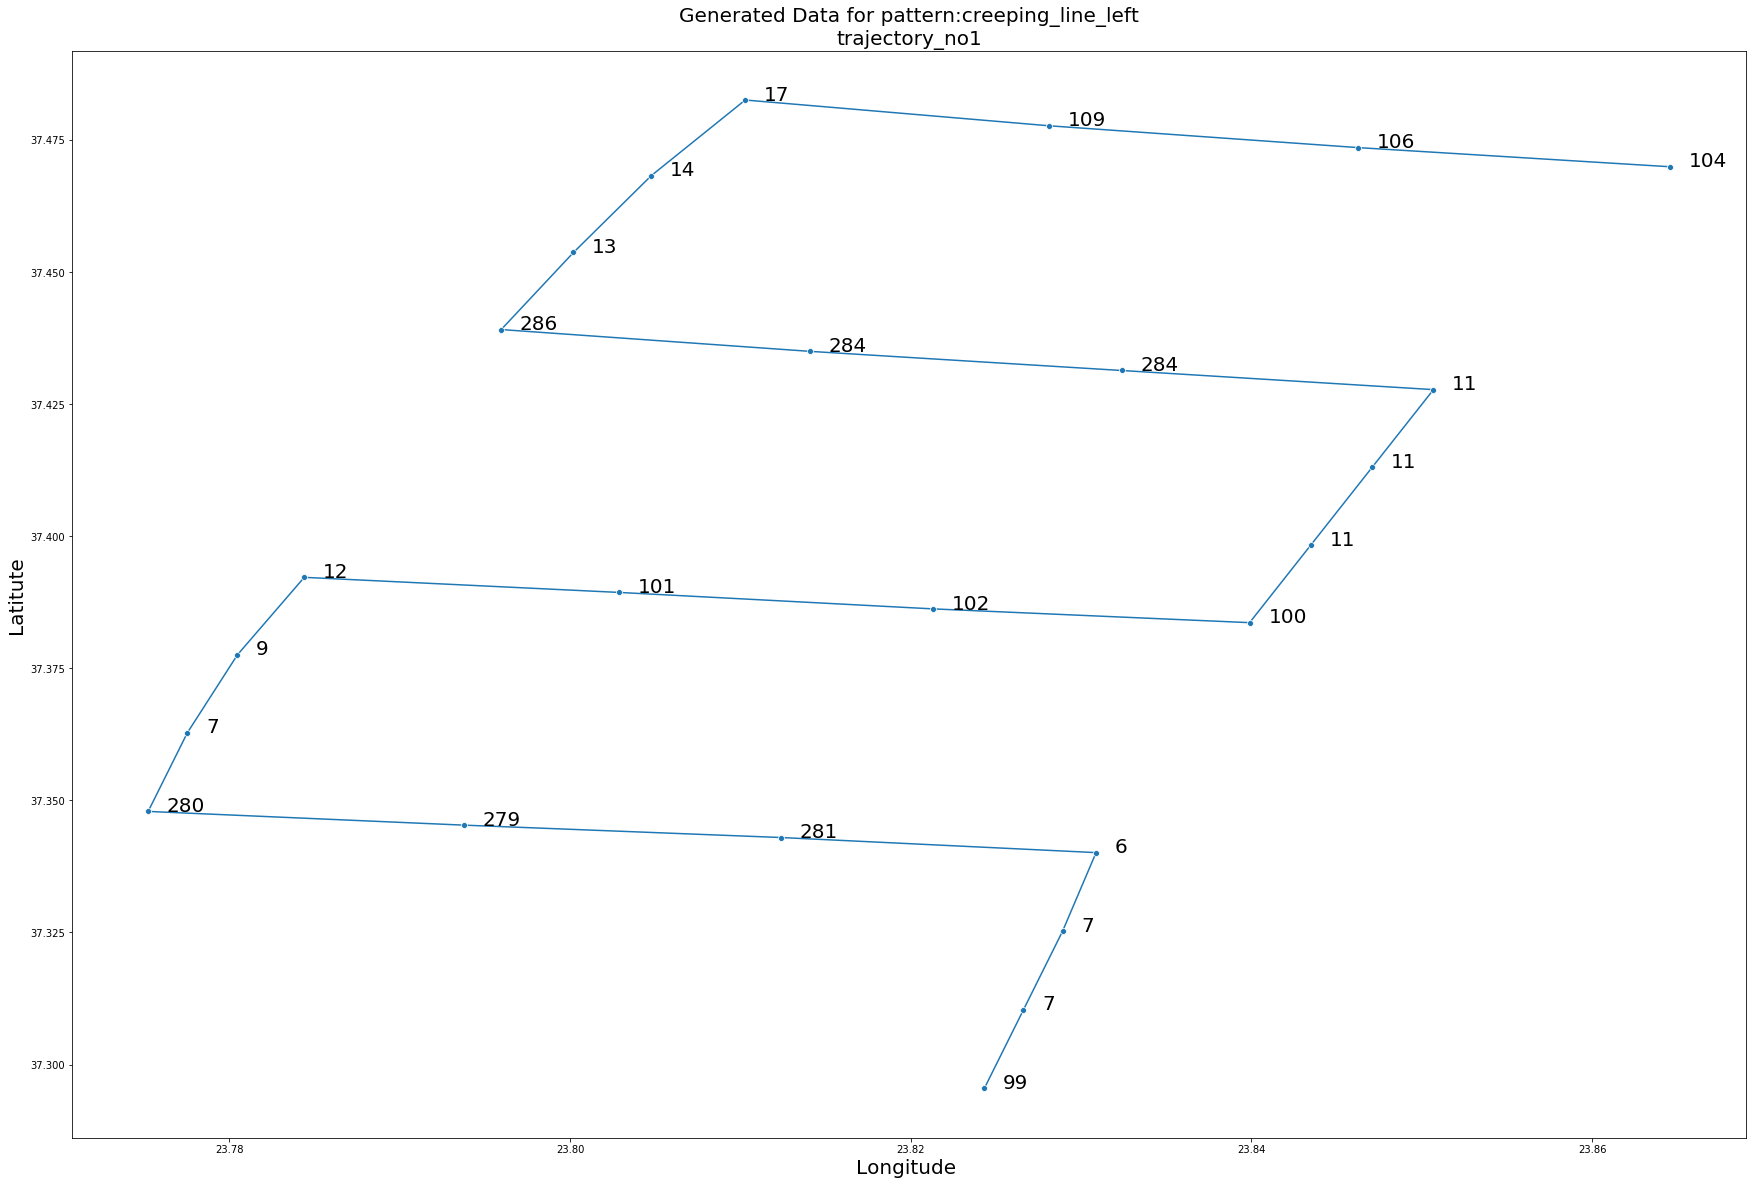

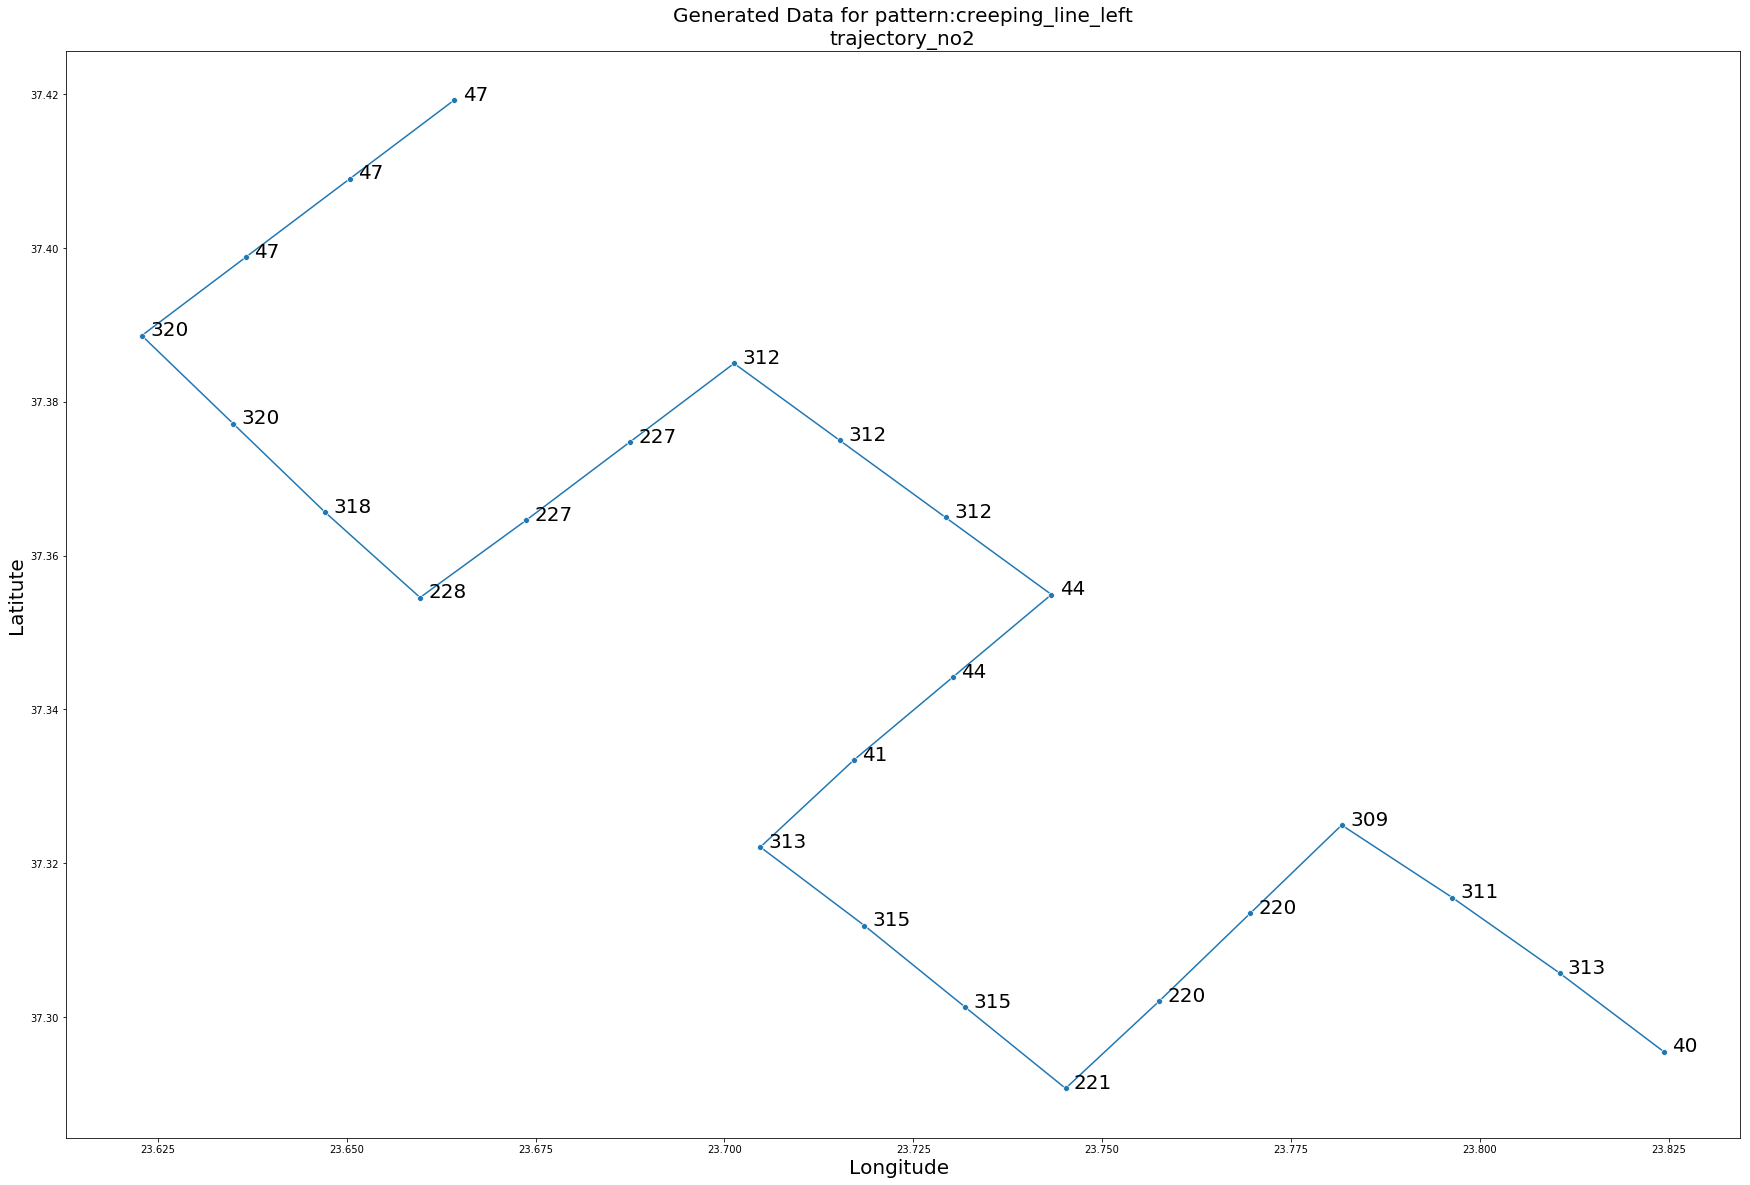

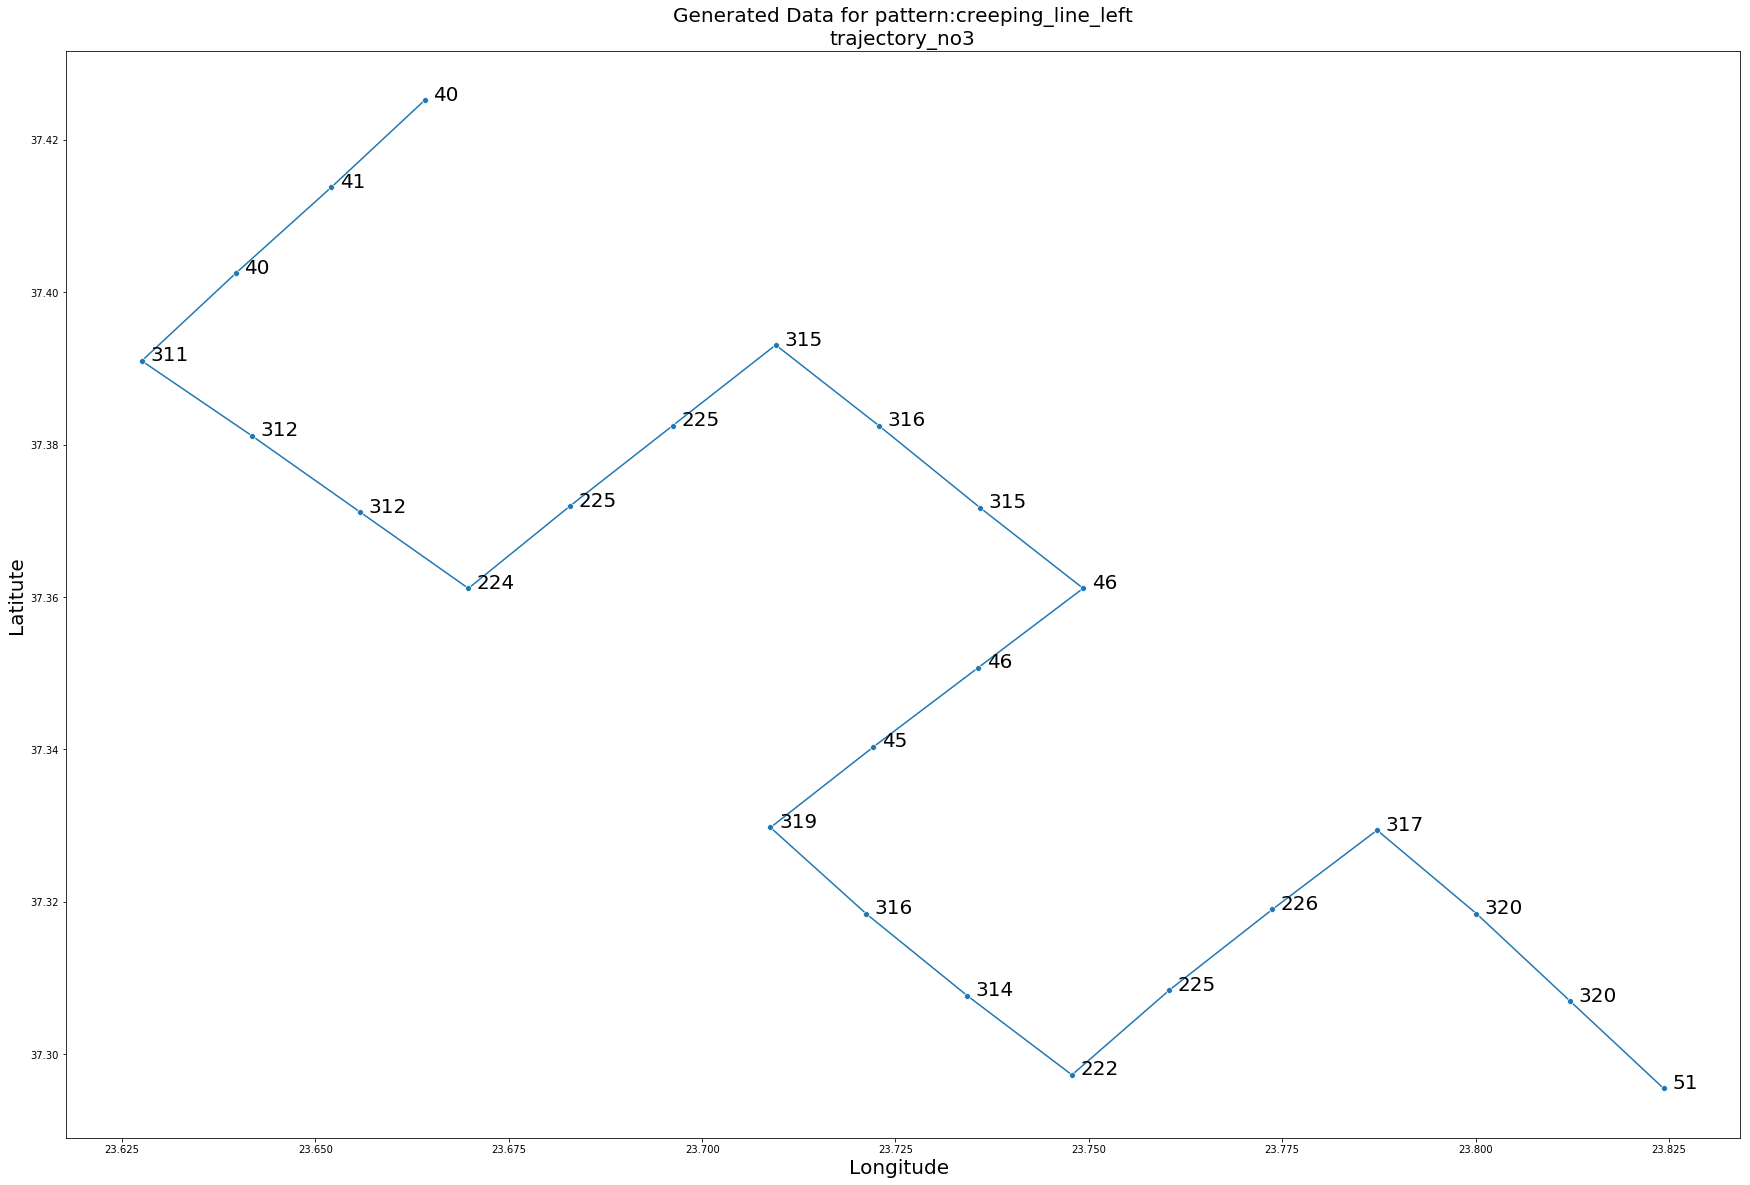

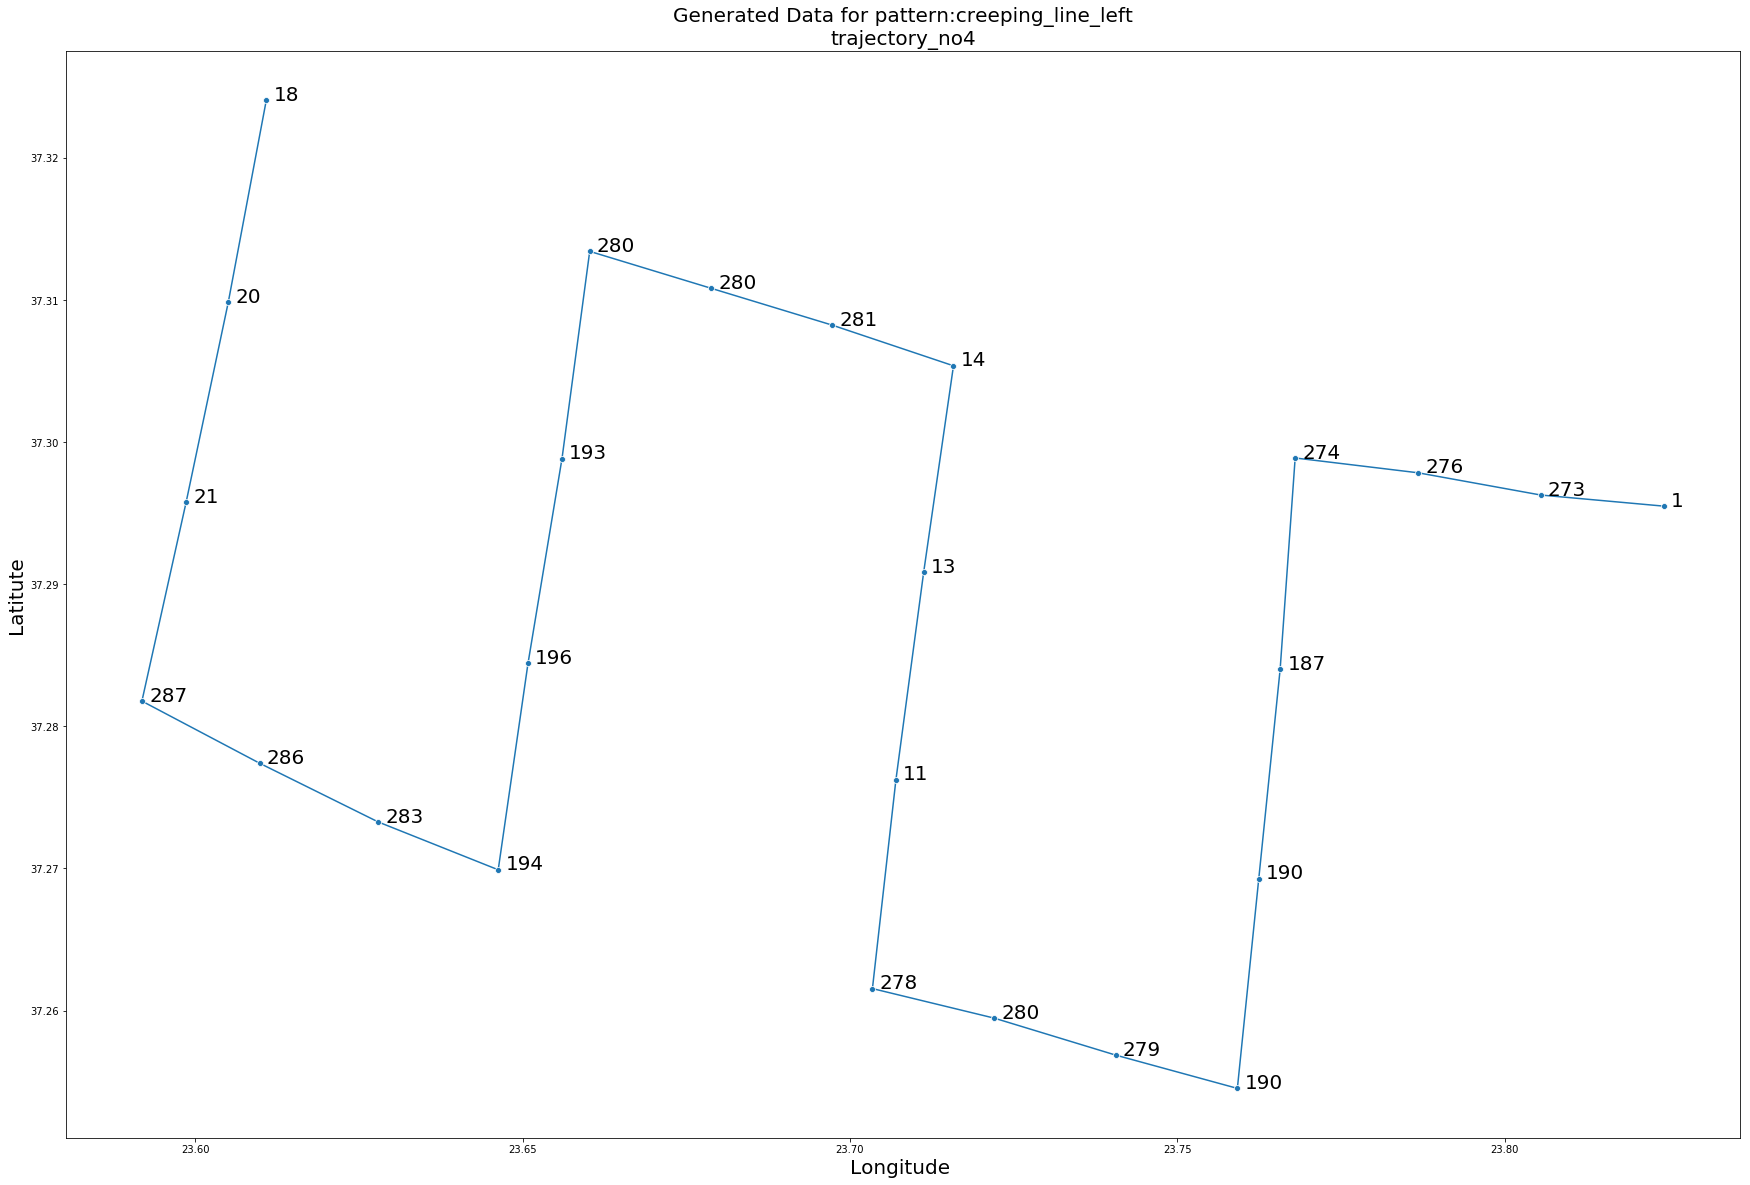

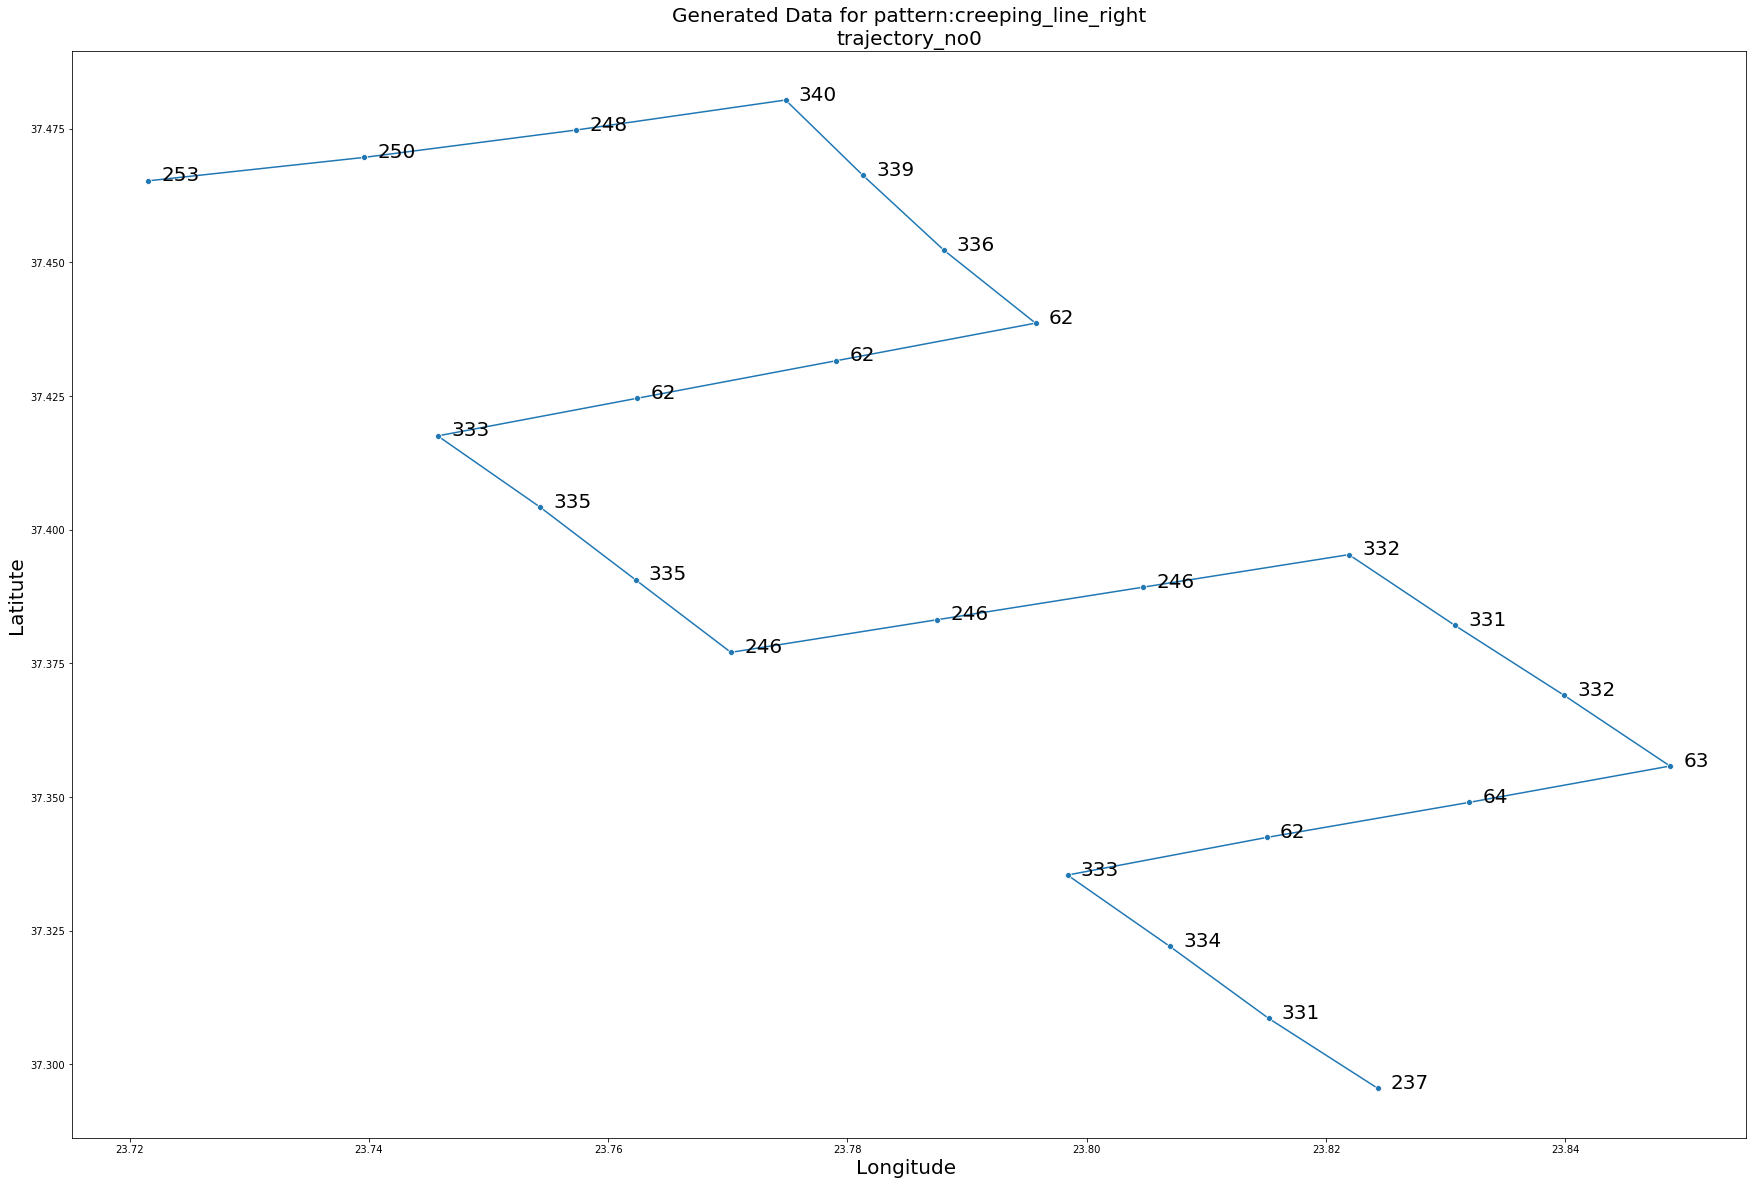

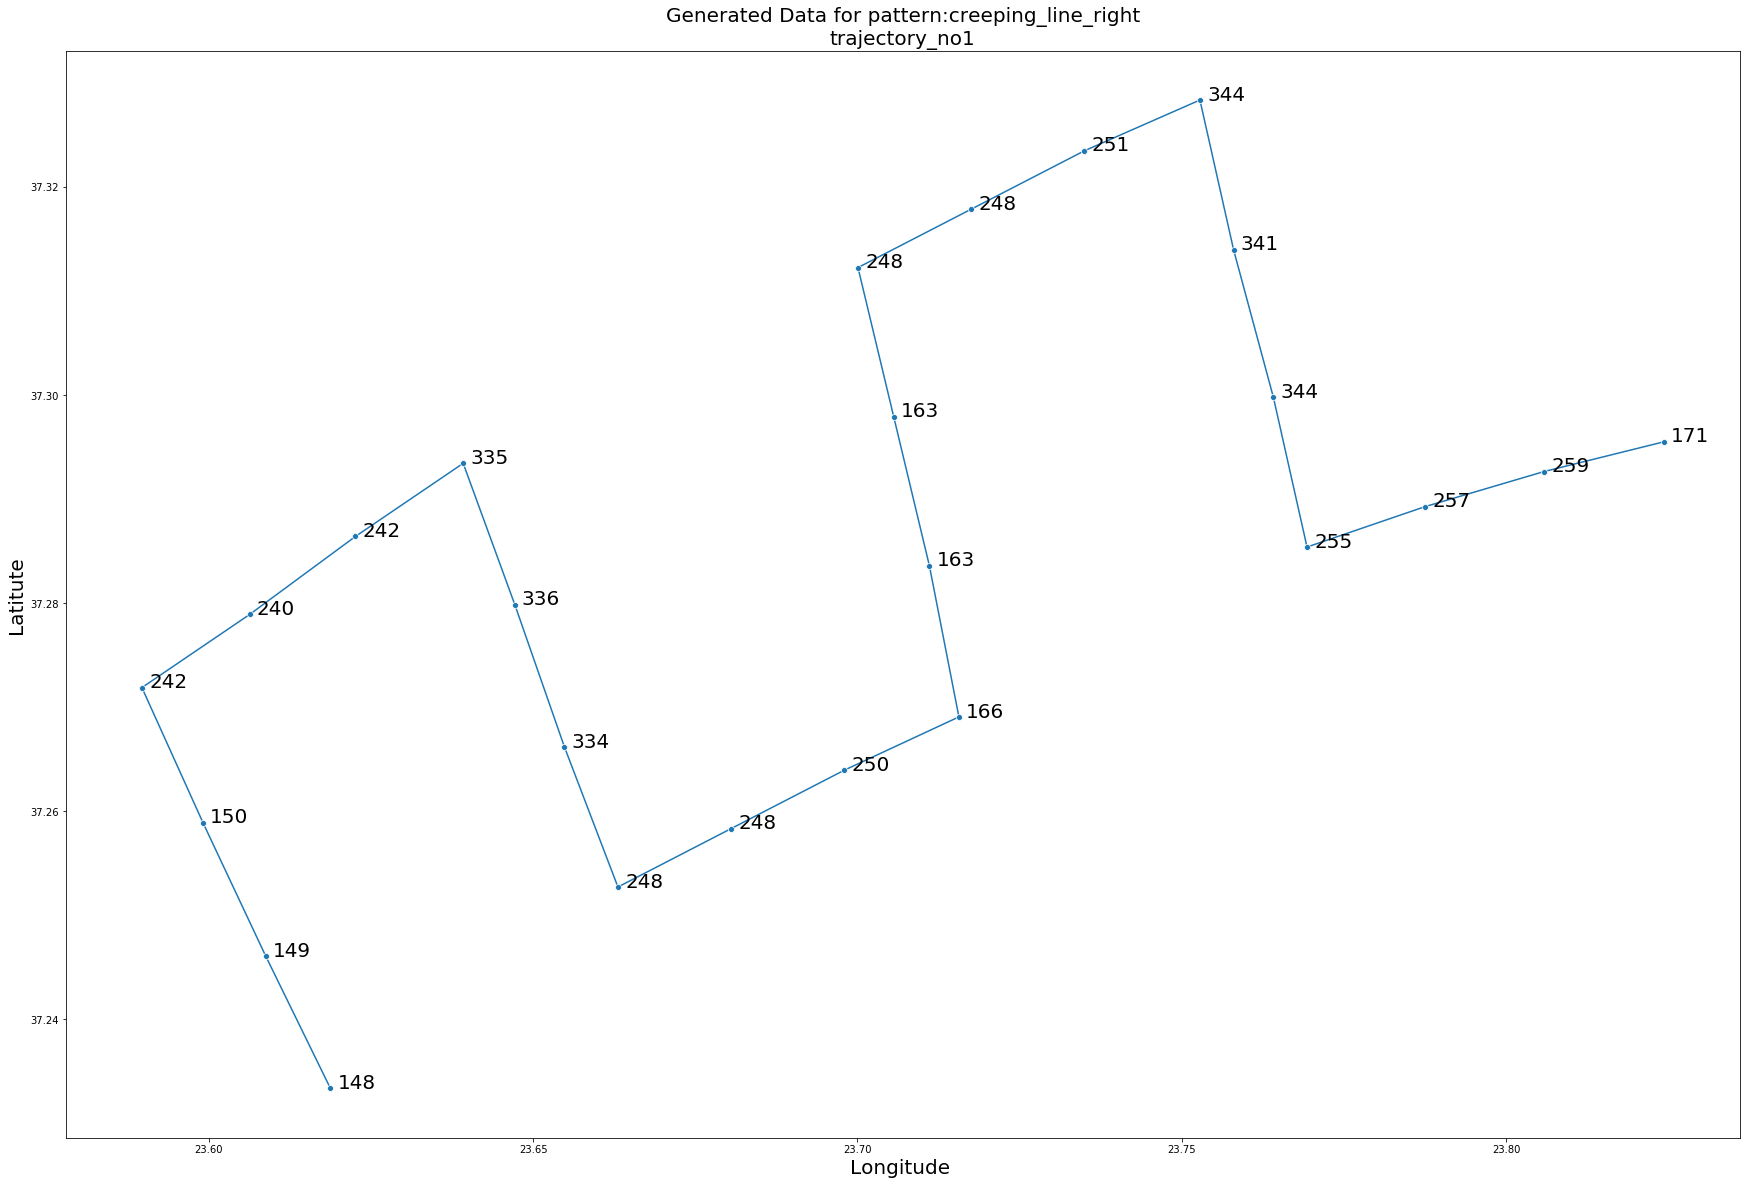

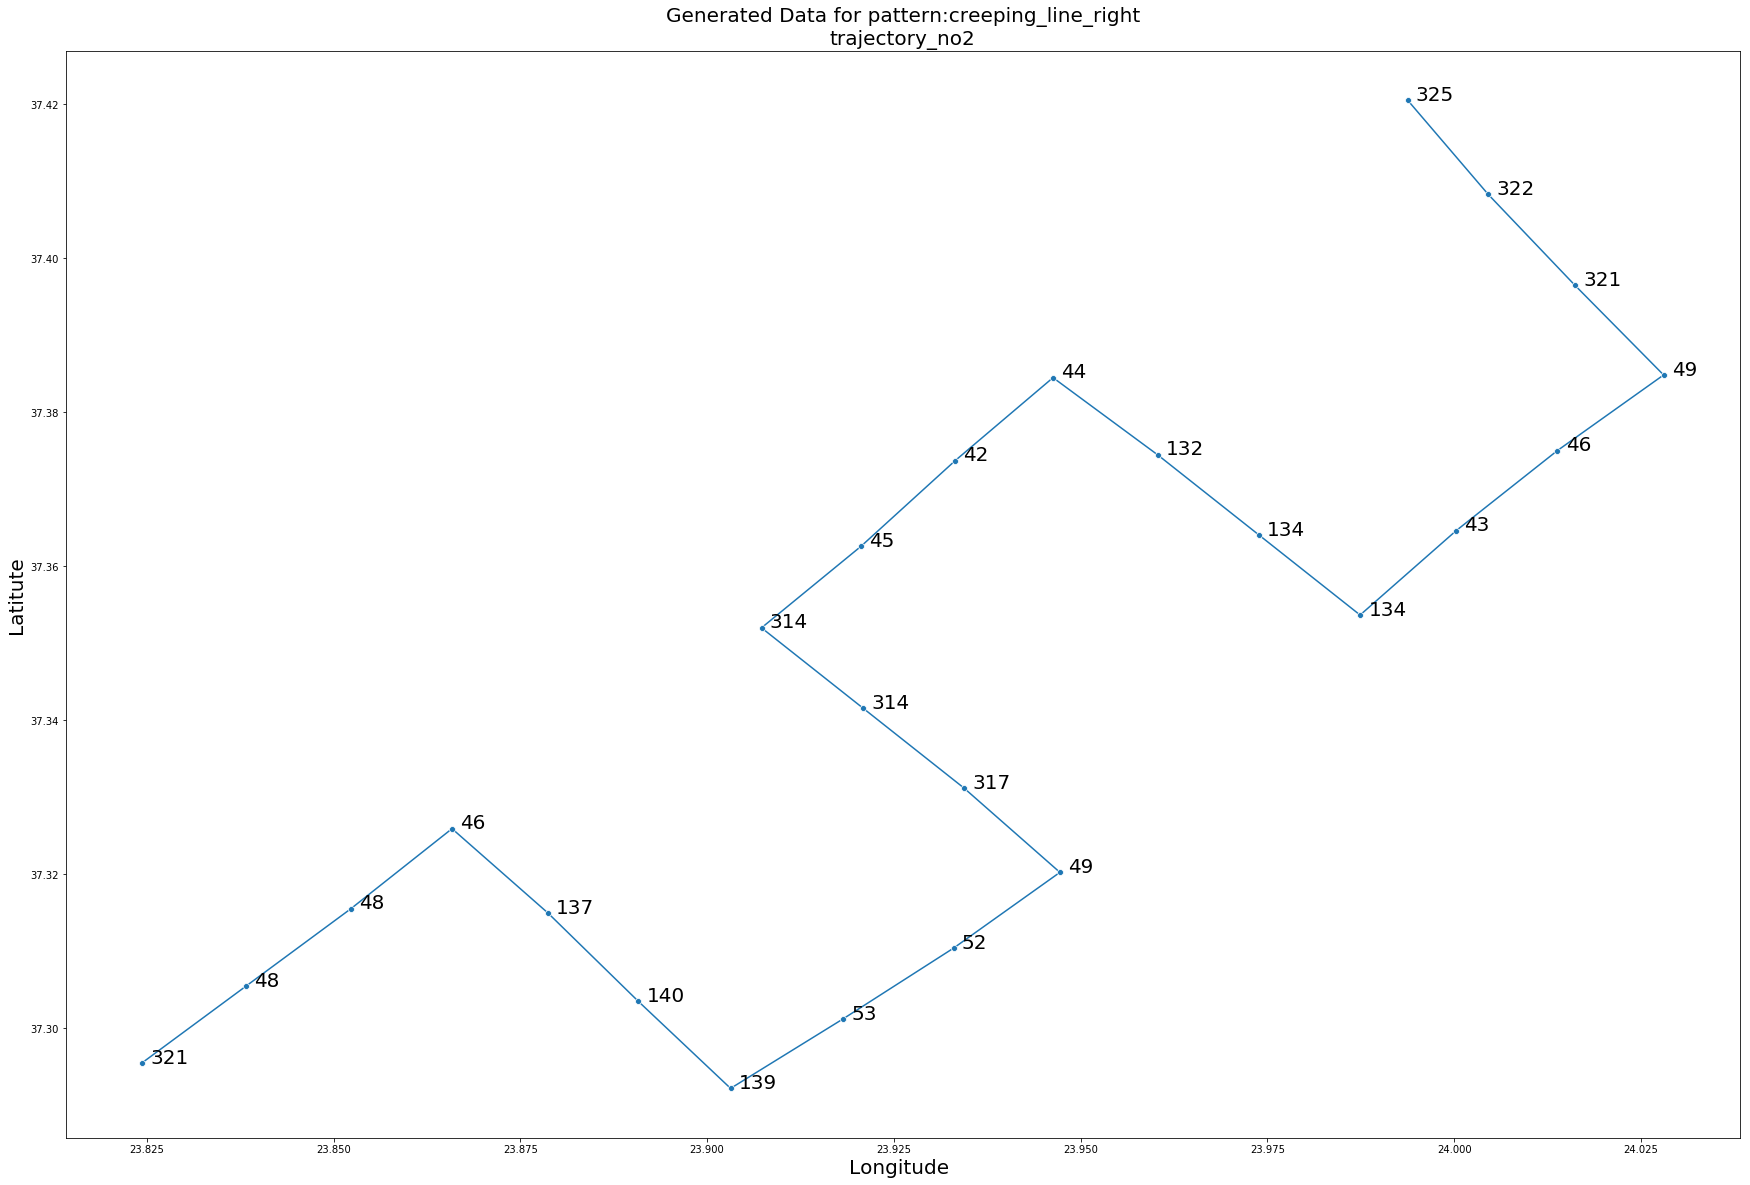

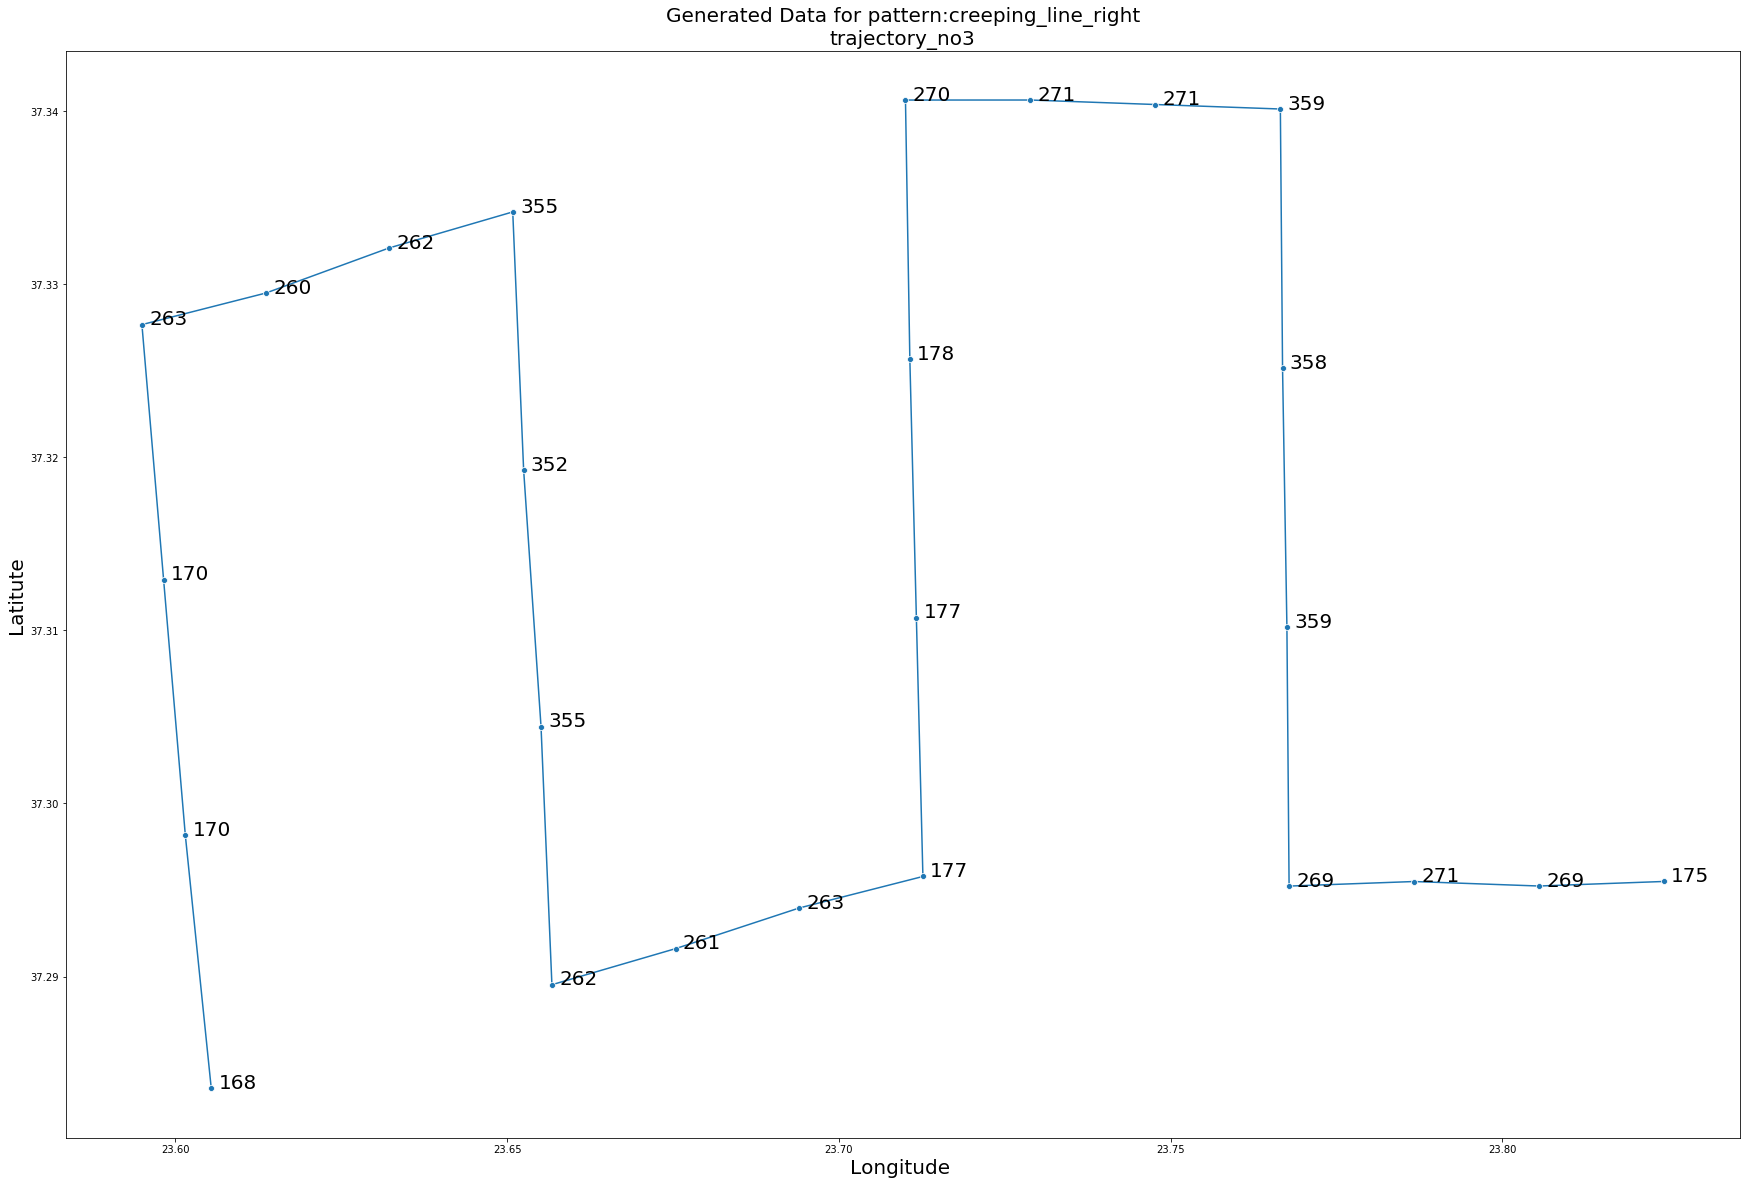

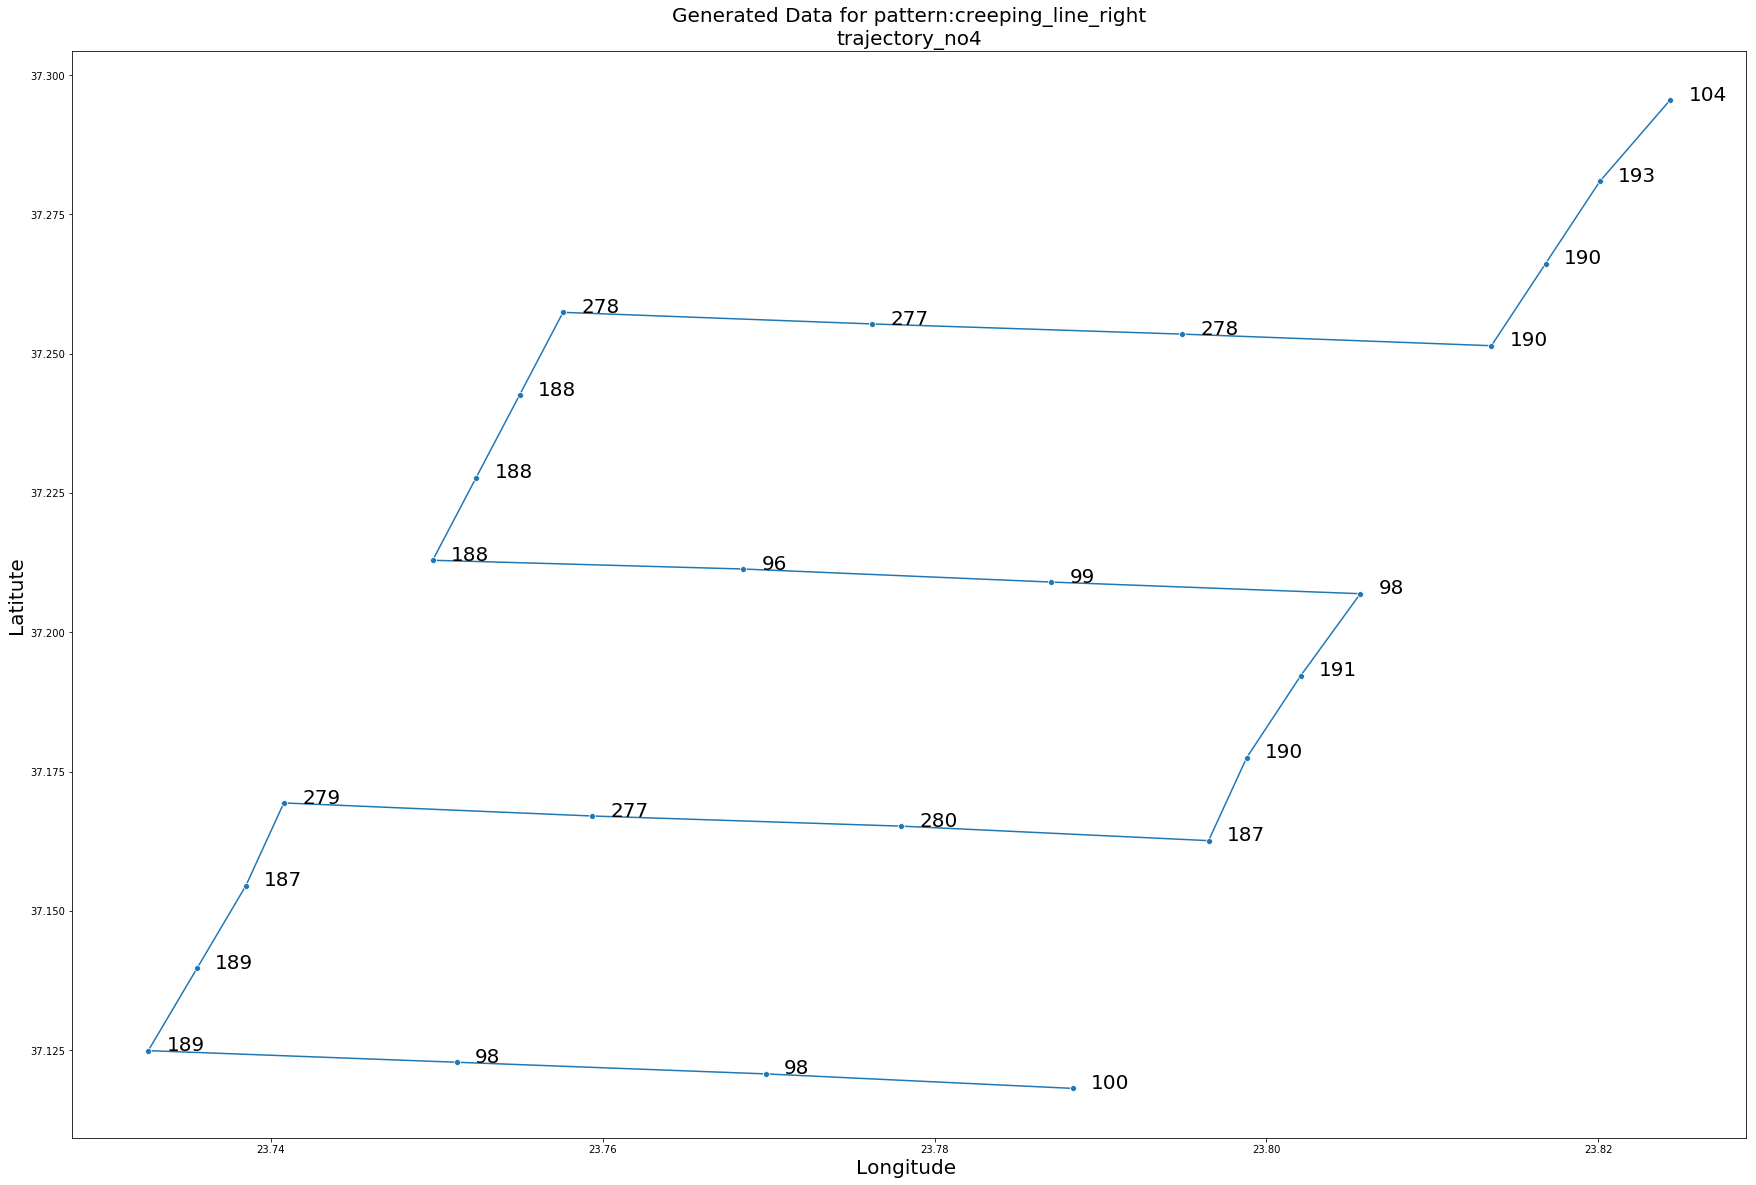

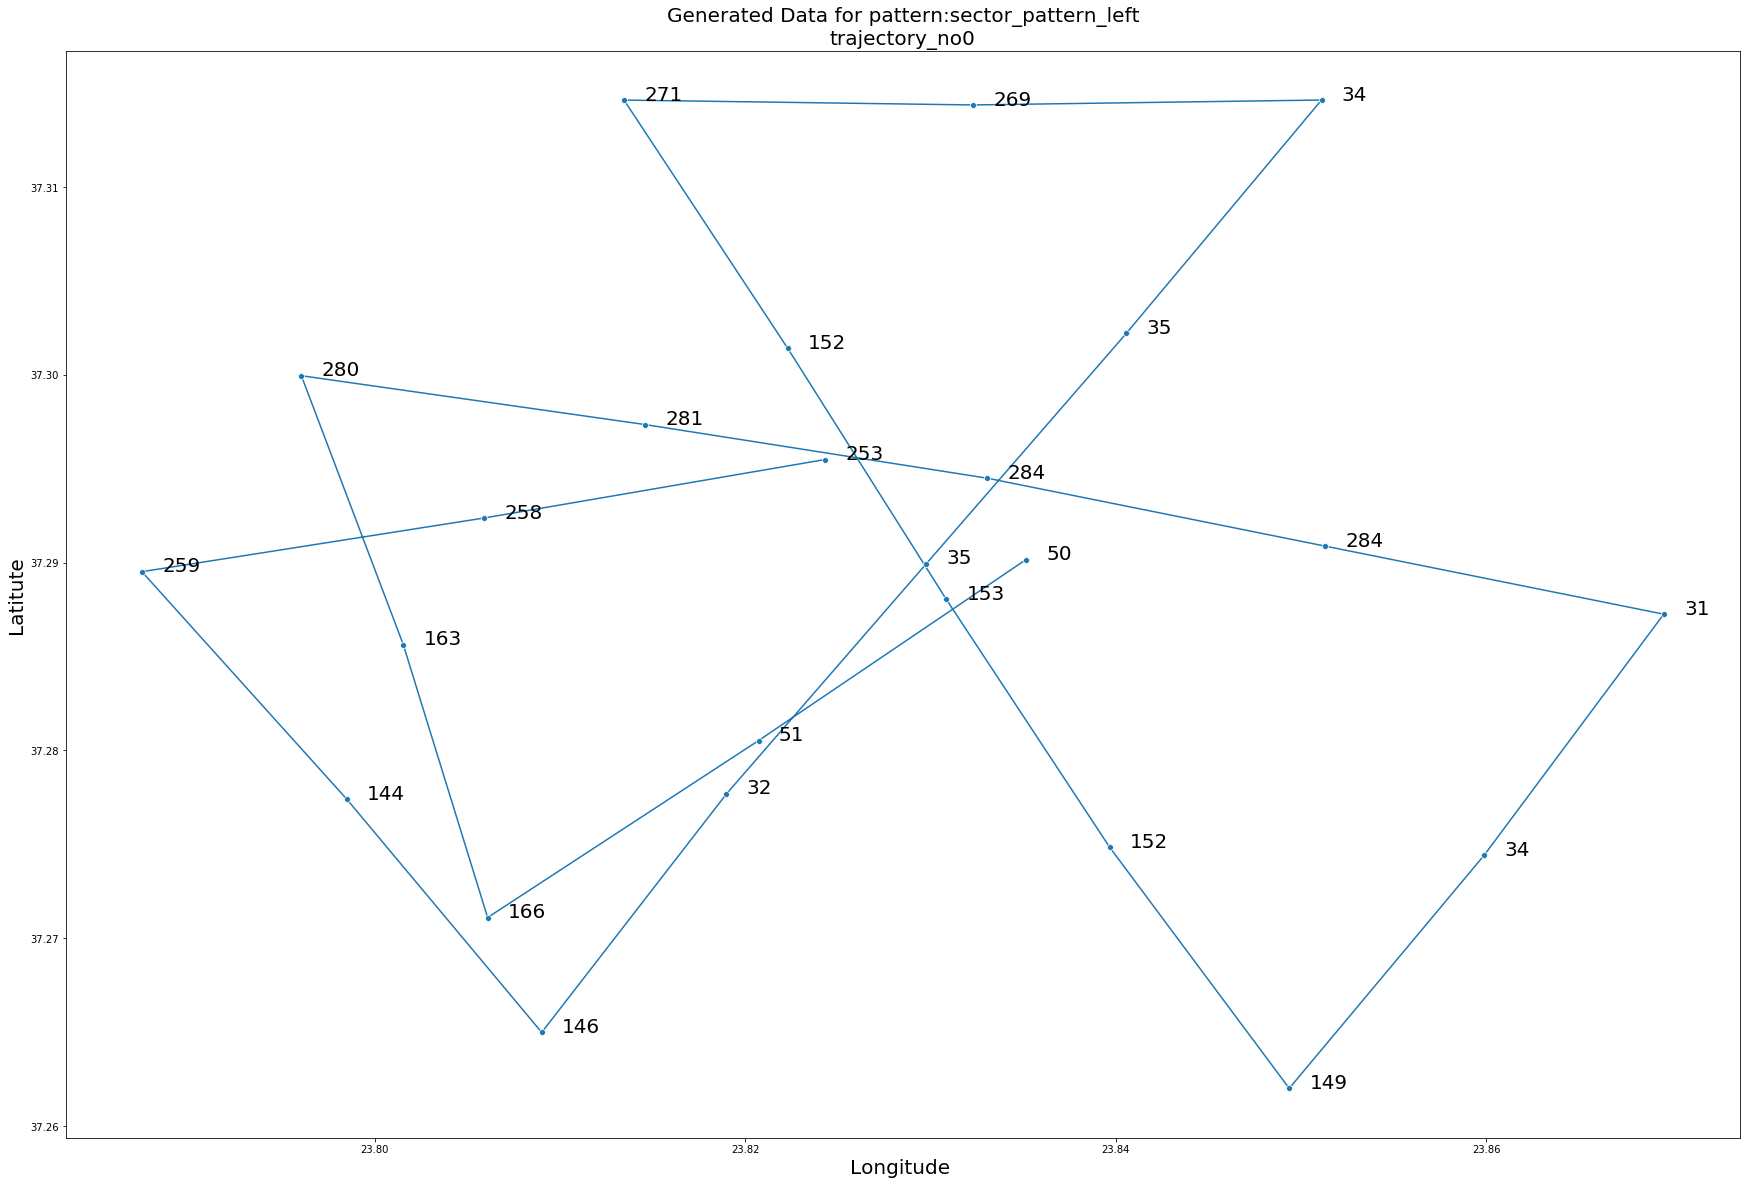

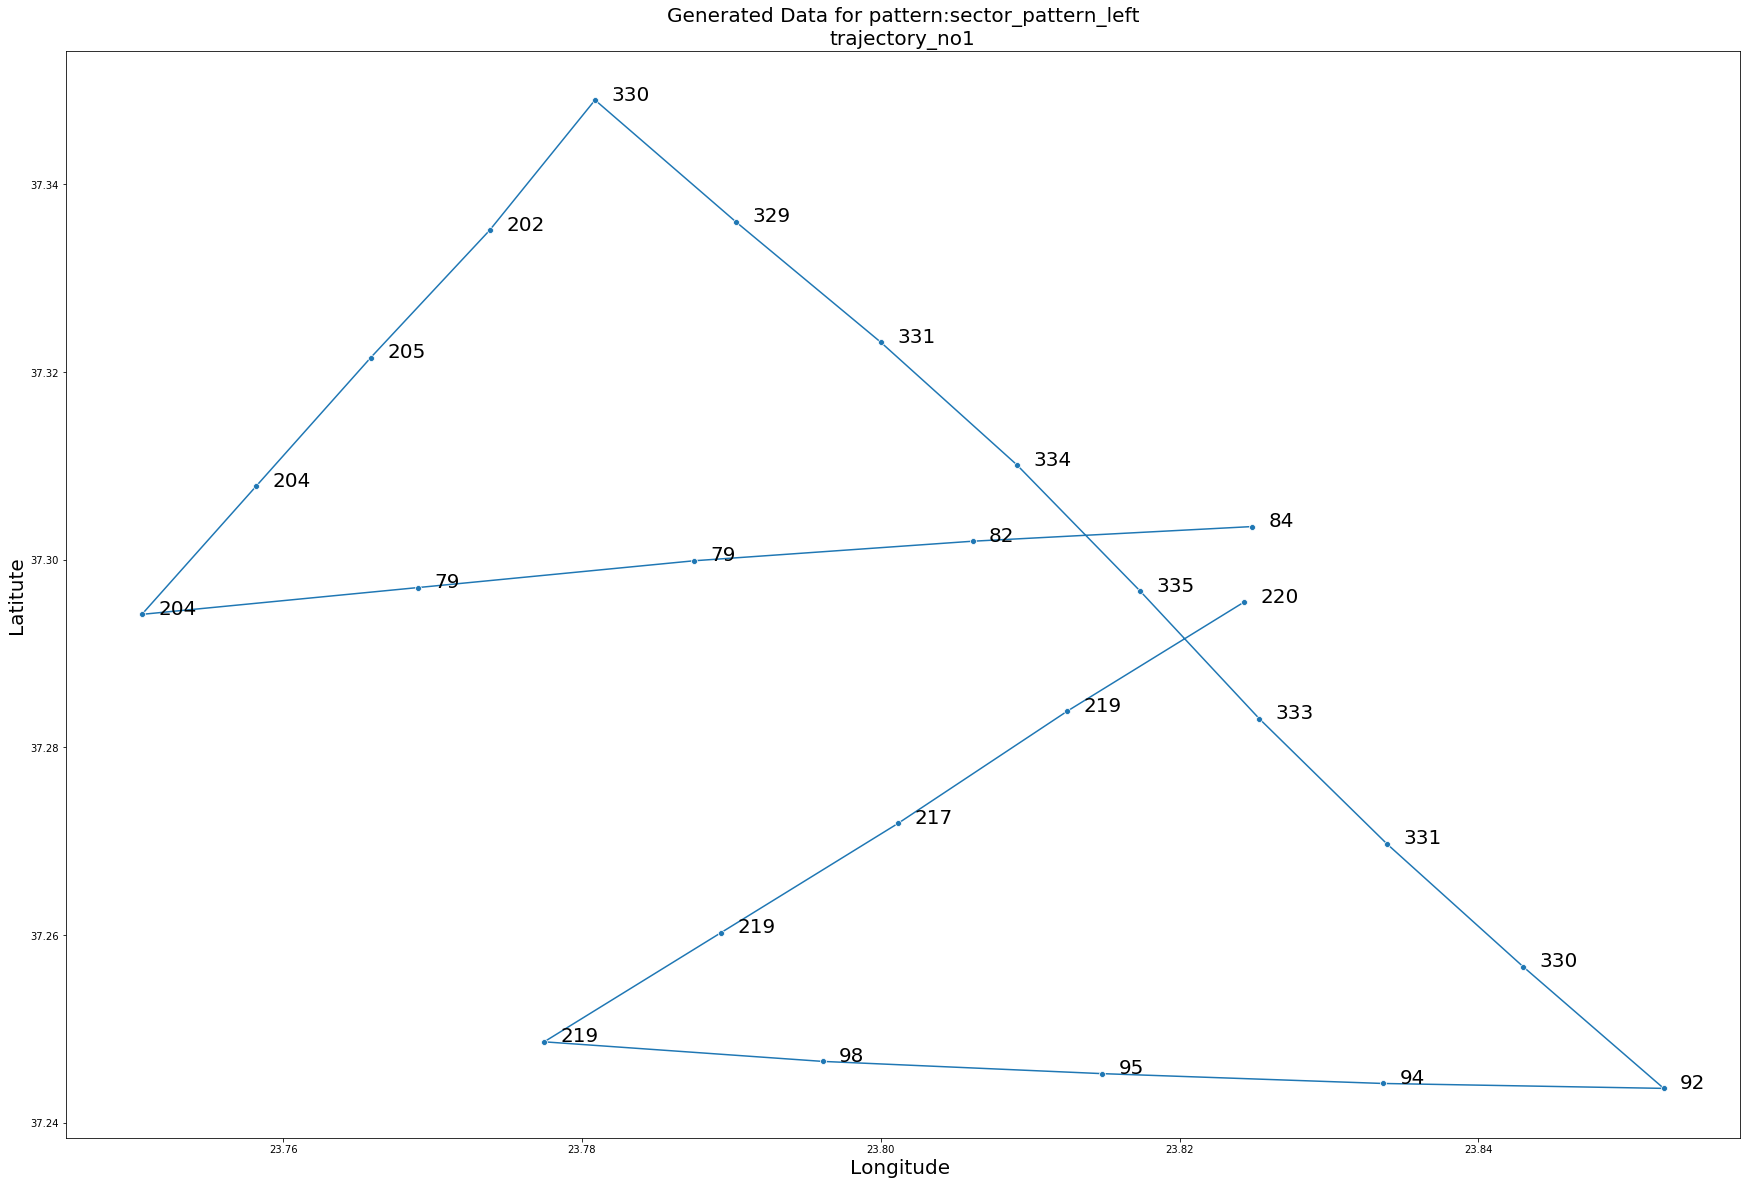

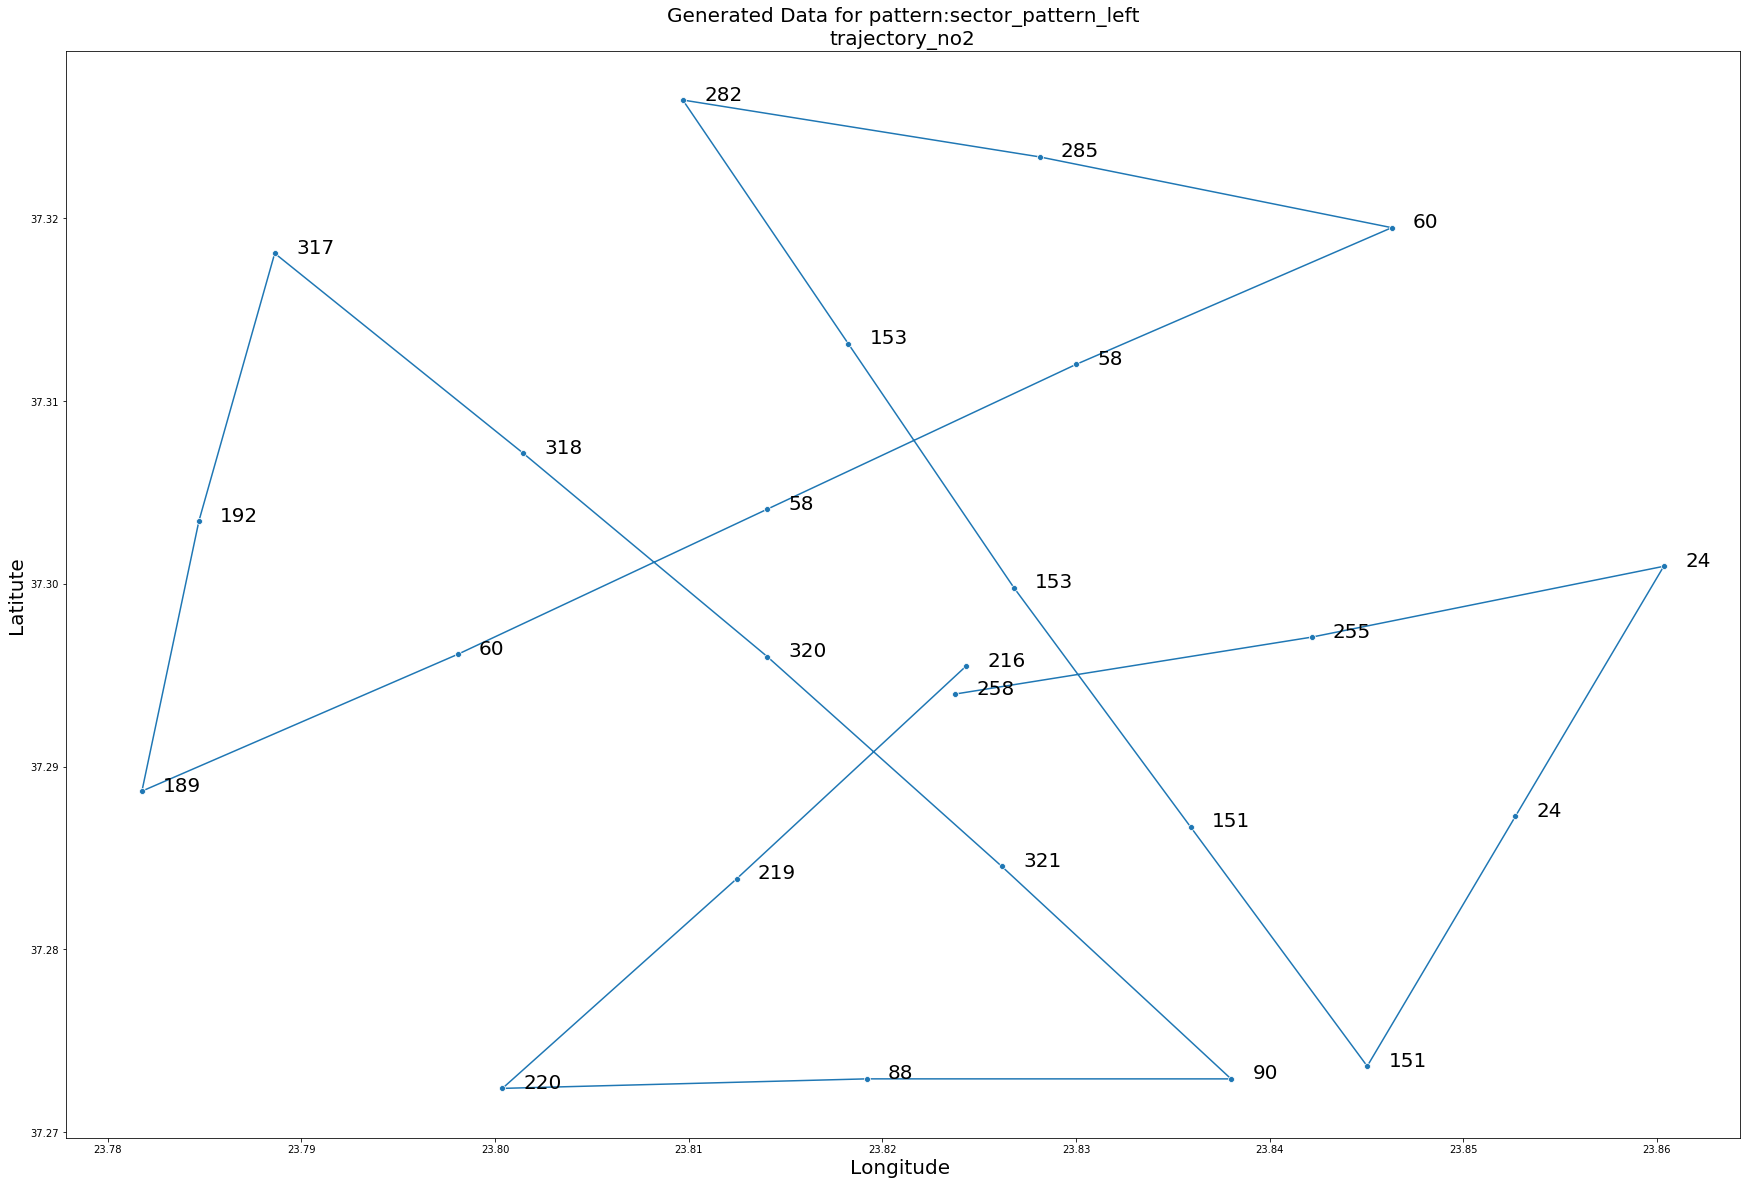

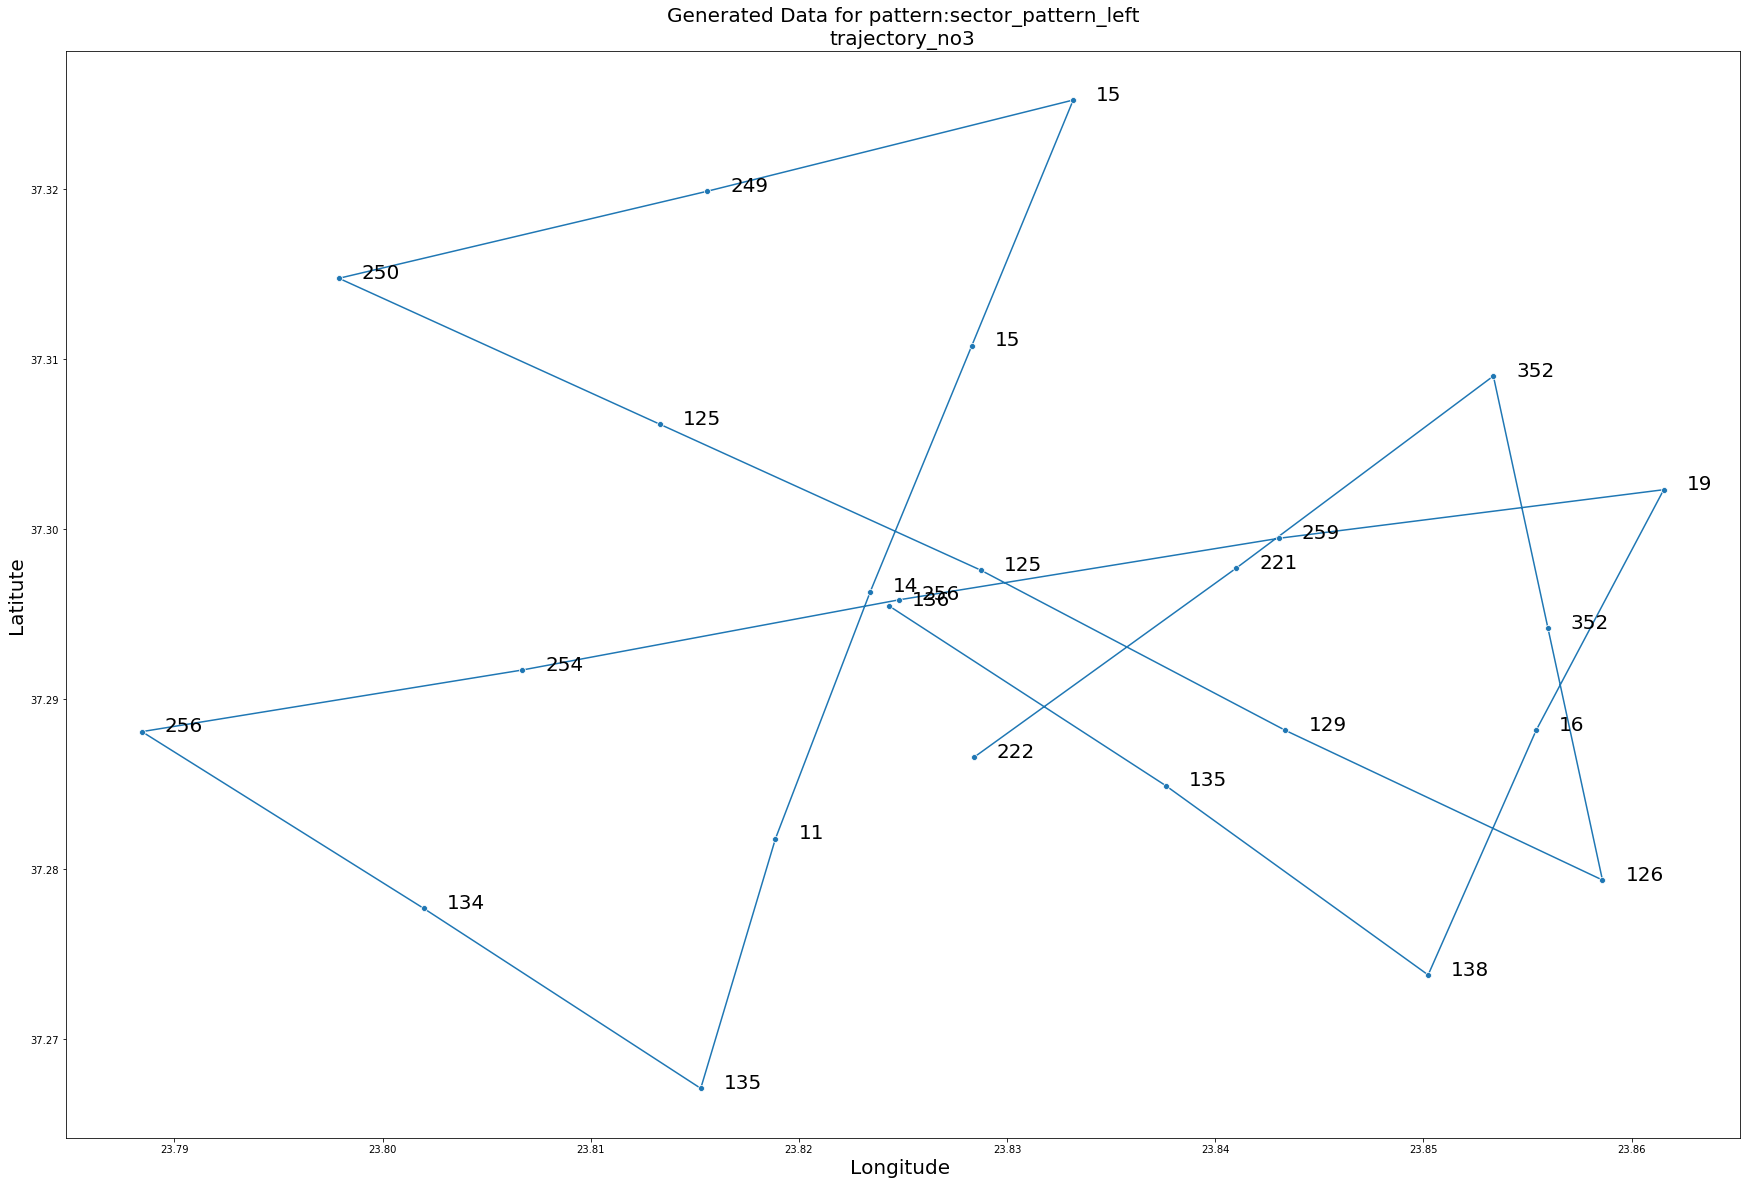

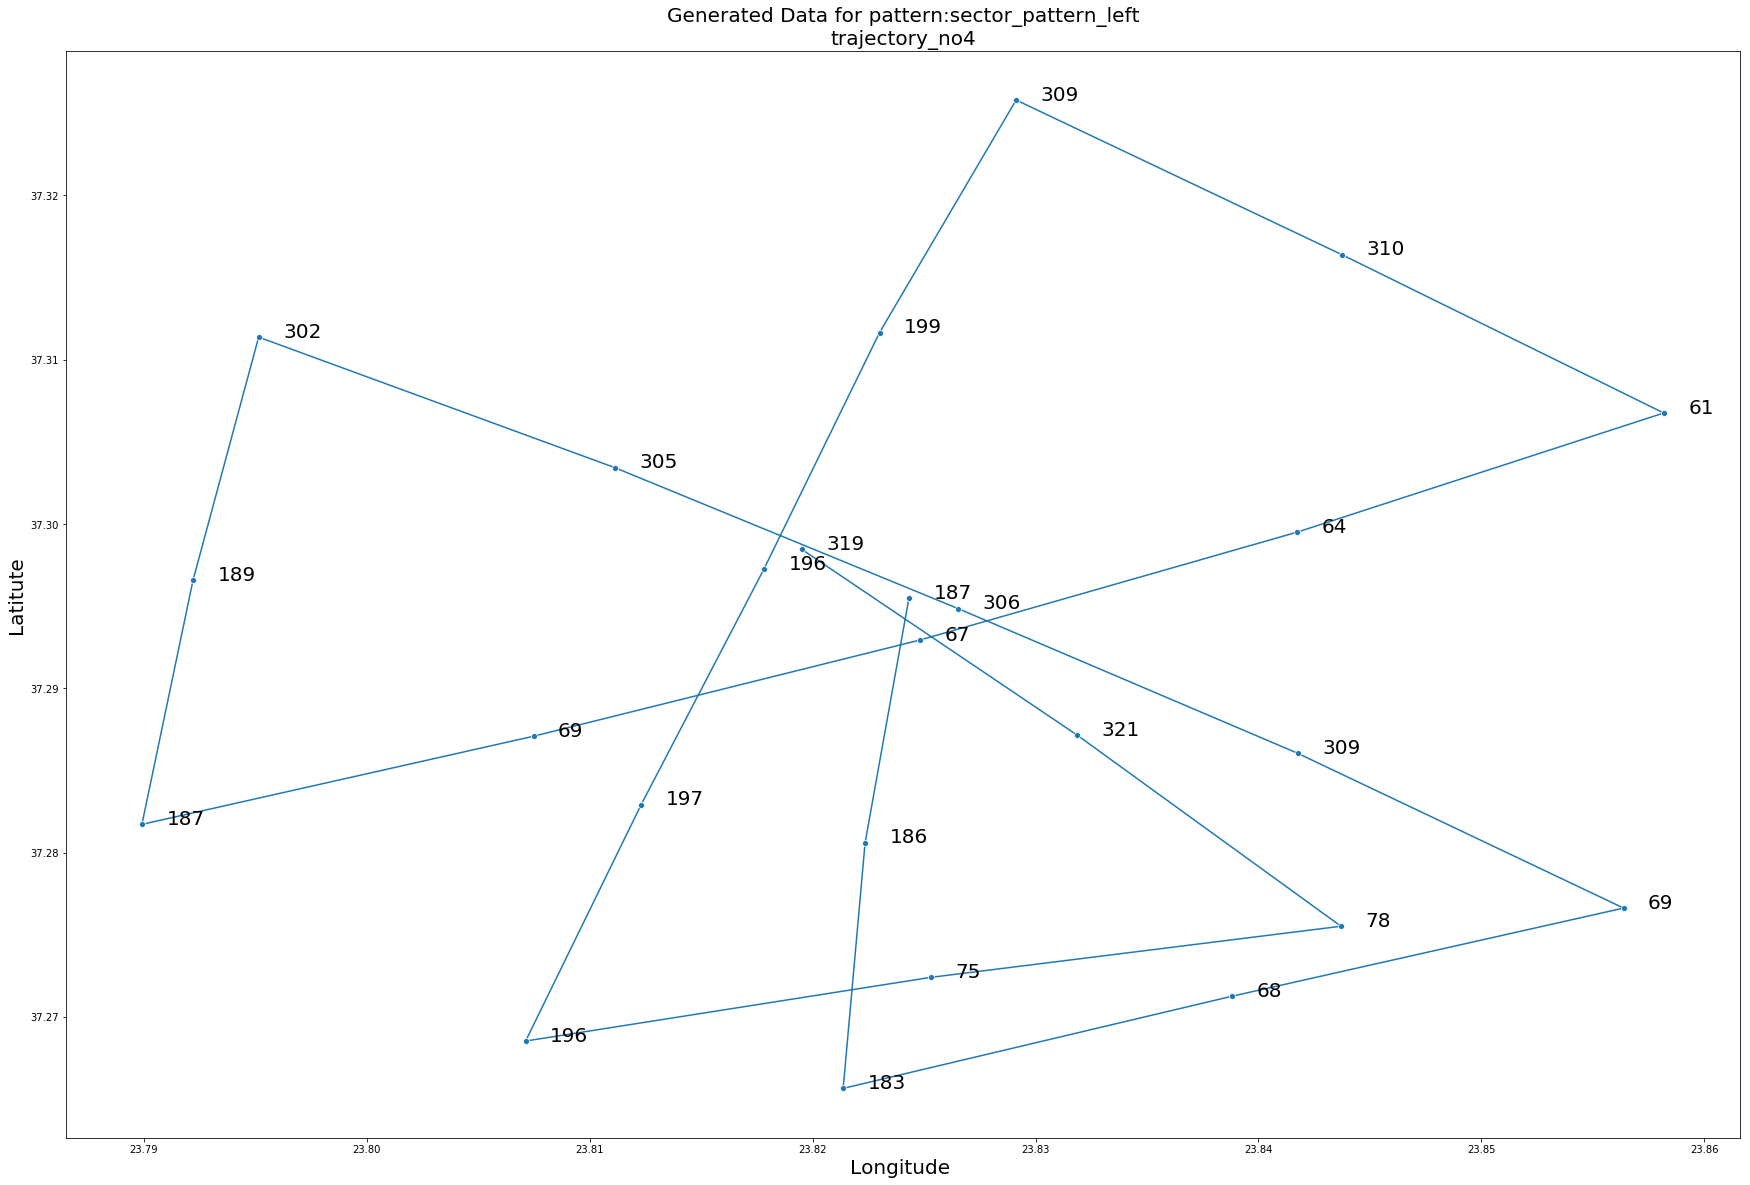

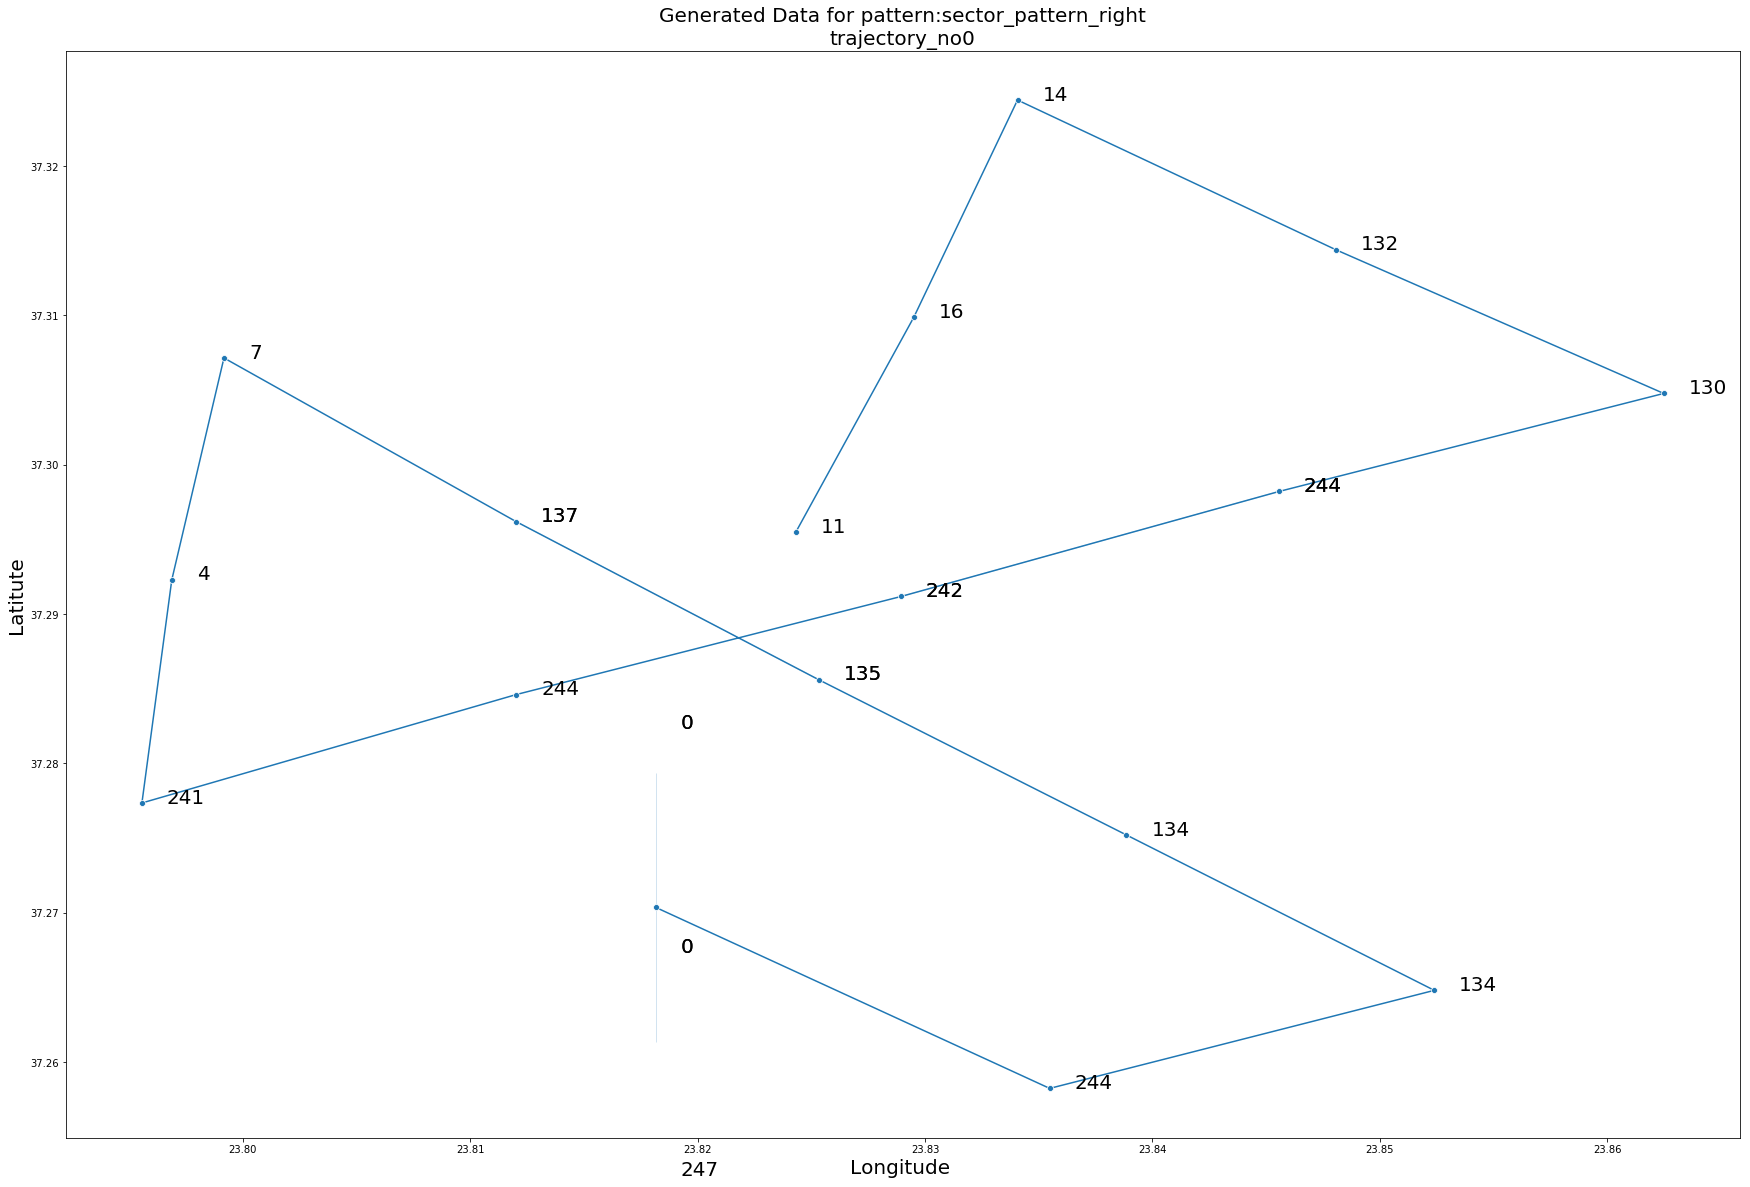

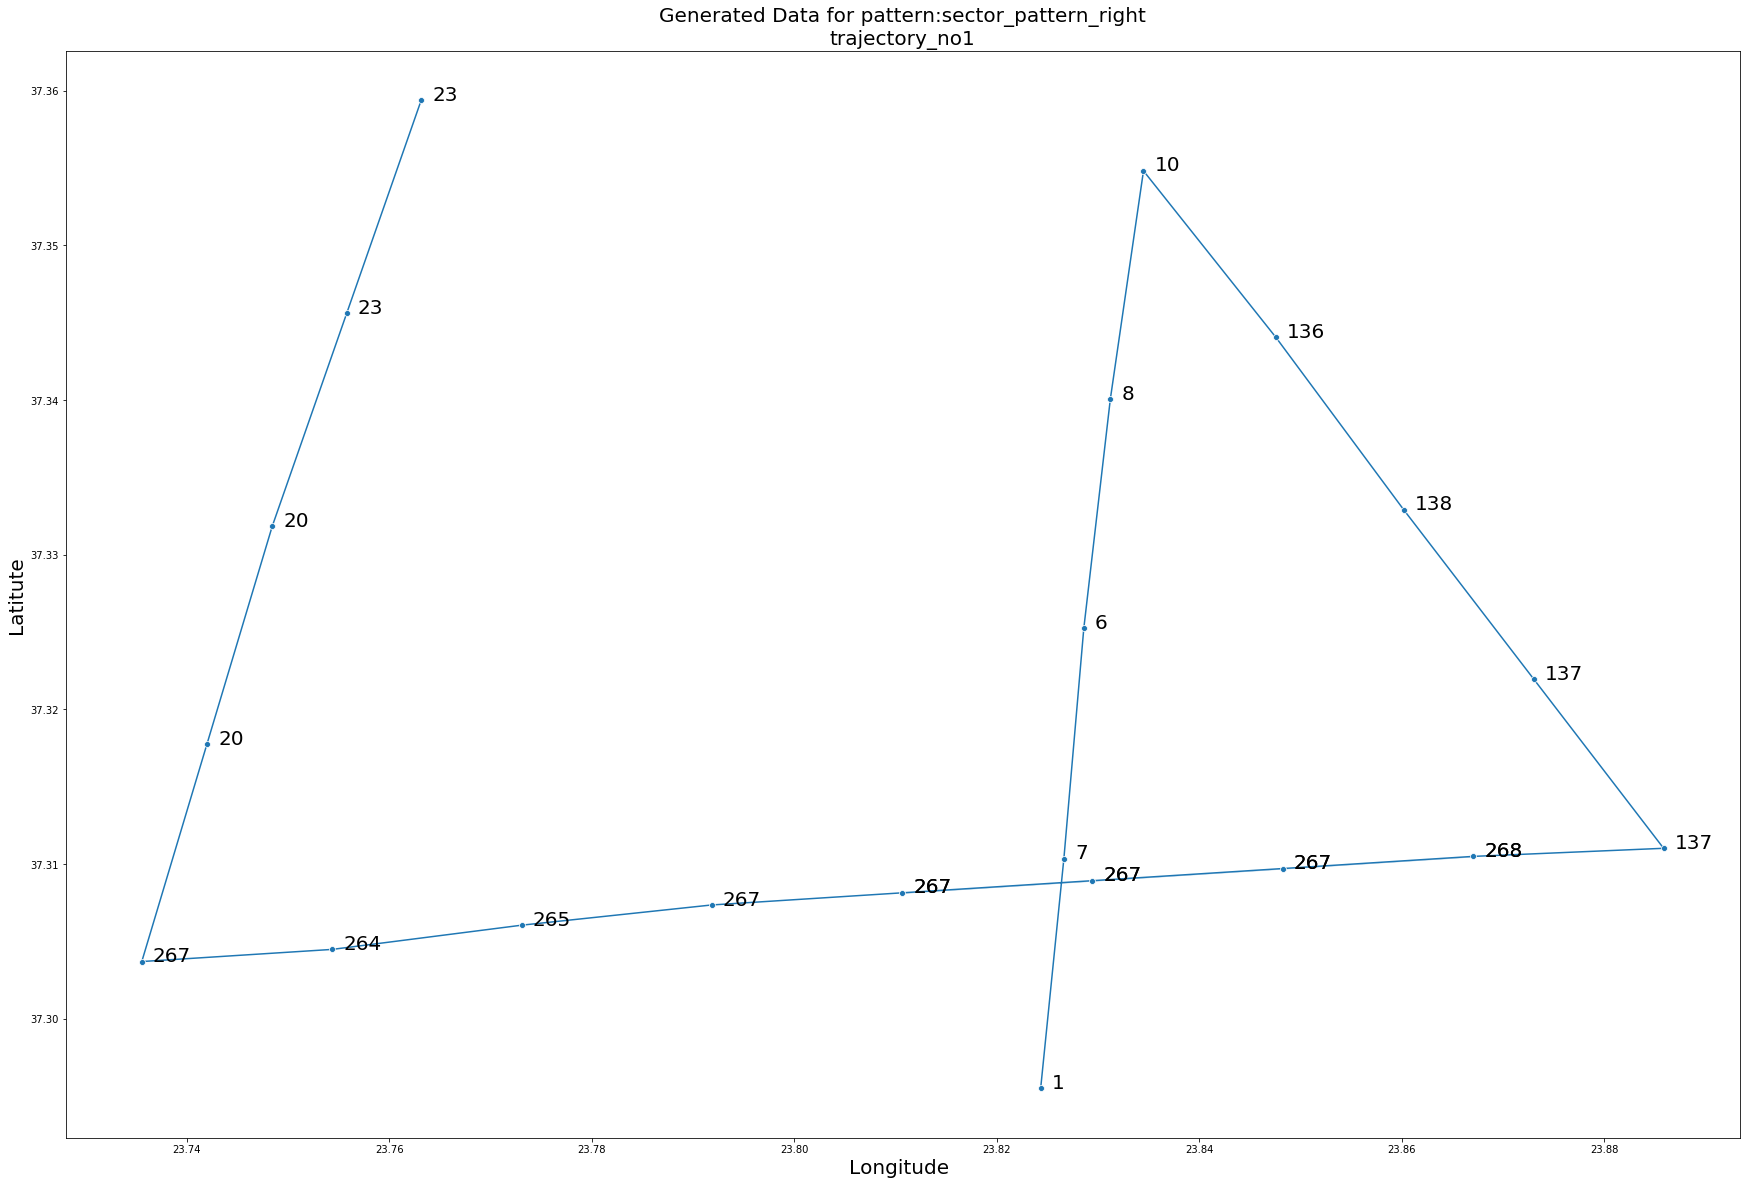

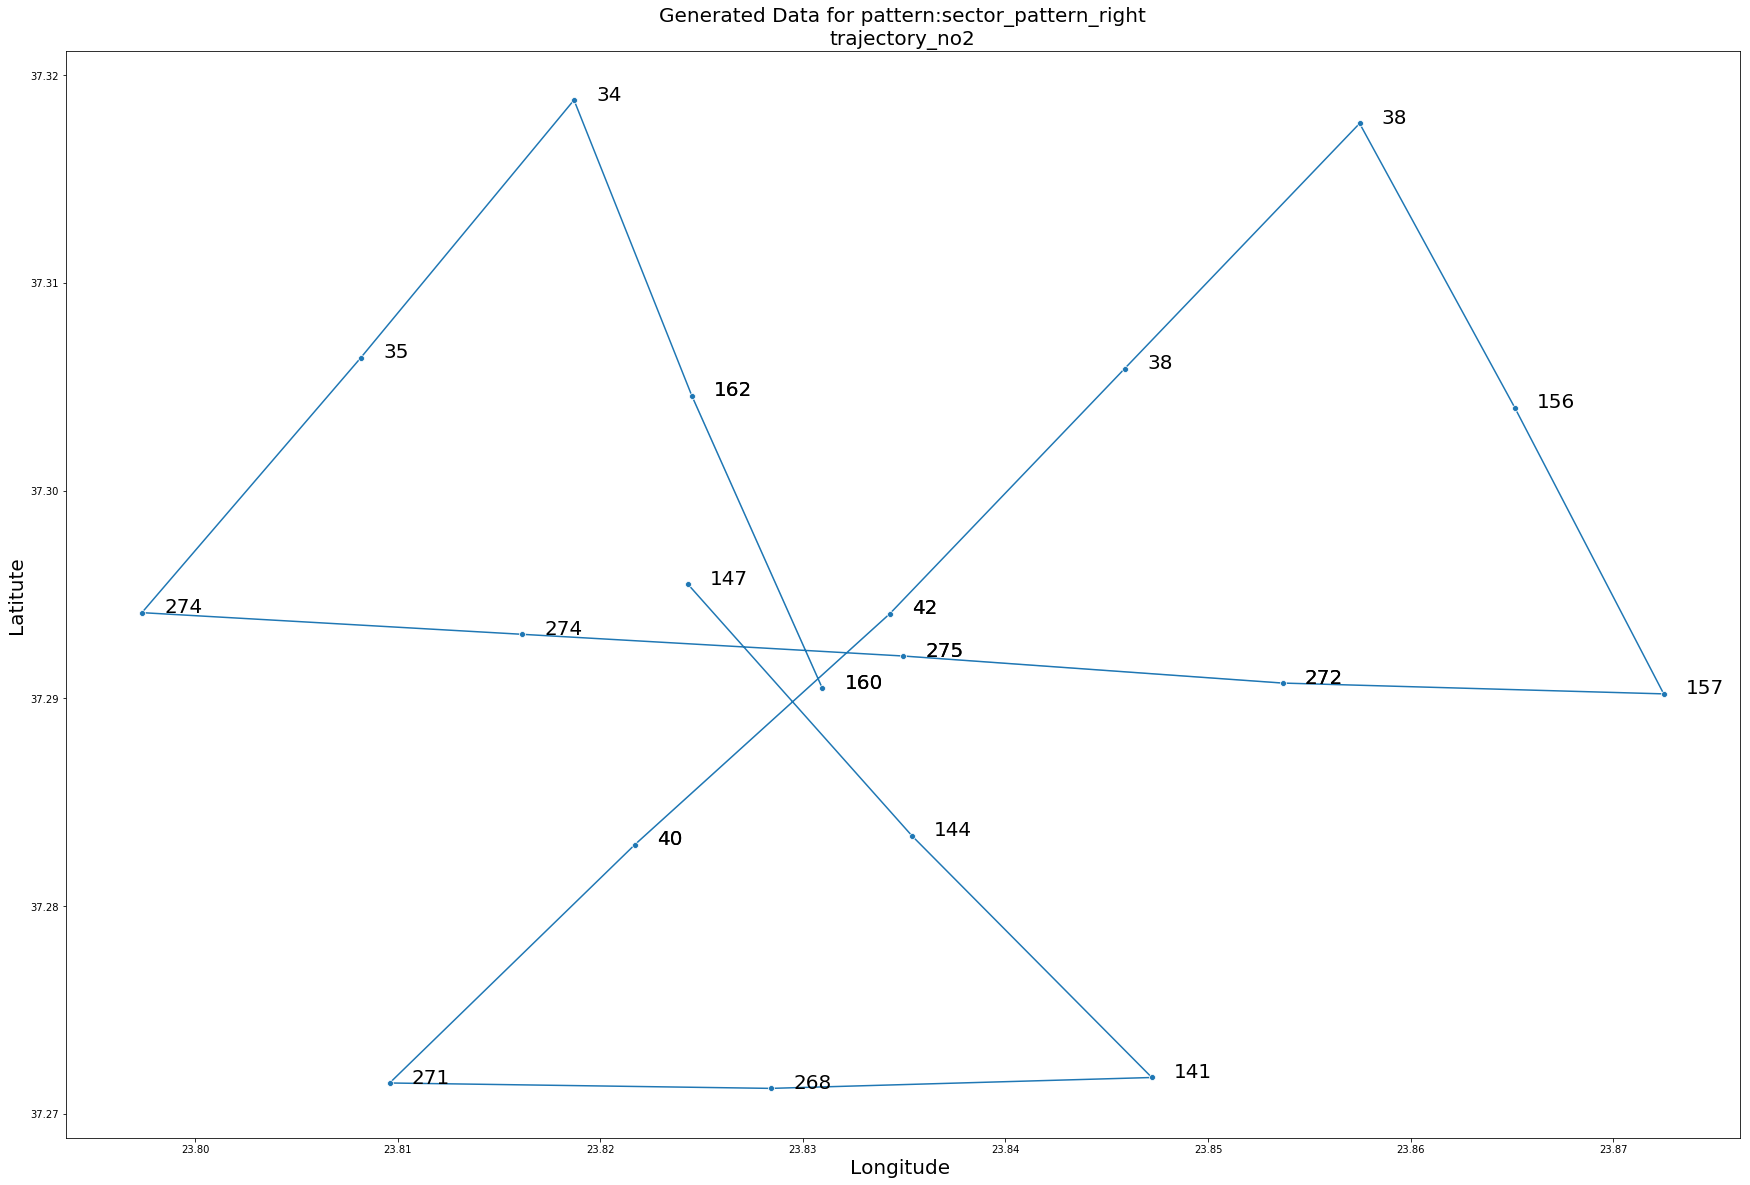

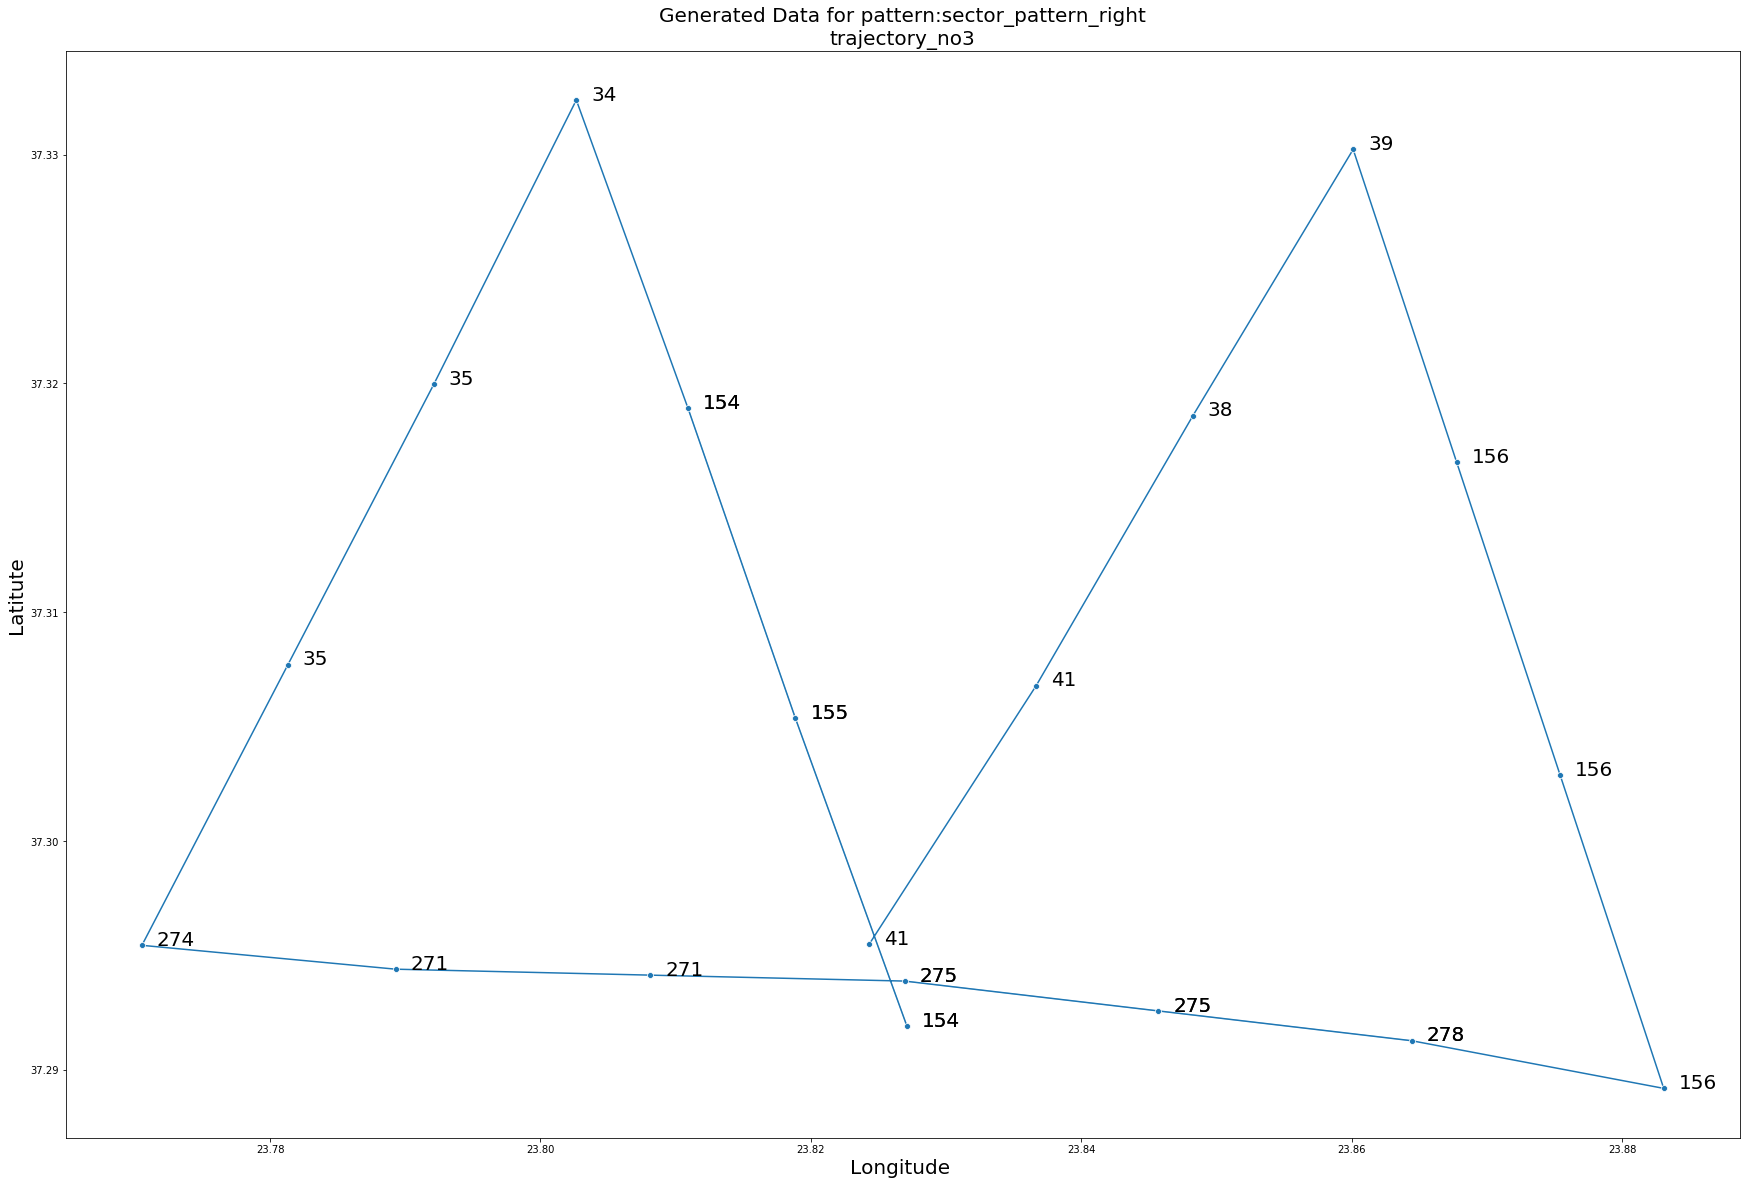

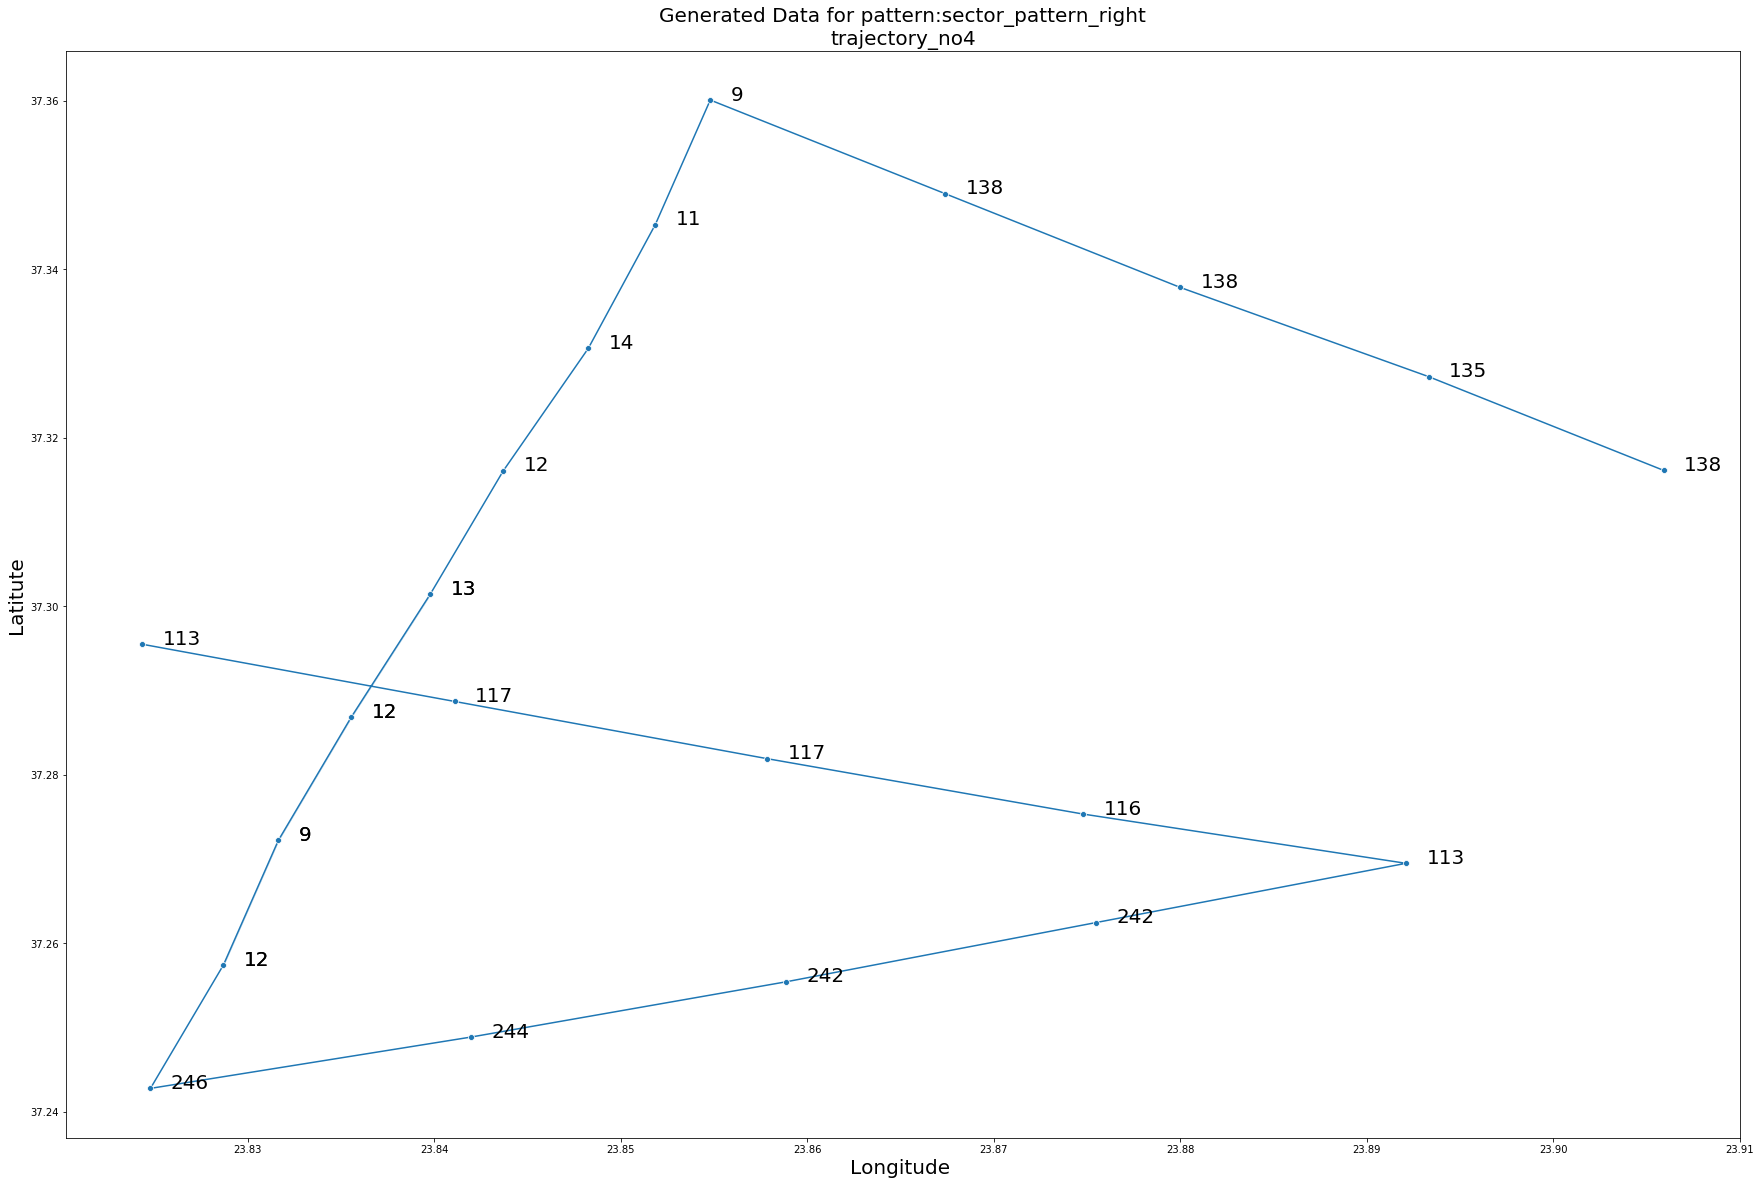

In [2]:
tr_gen_options = {"samples": 25,
                  "freq": 5,
                  "reset_data": True,
                 "init_speed":20}
dt_gen_options = {"n_test": 5}

train_test_options = {"split": 25}

df_csv_options = {"ts_class": "Bearing"}

movement_list = ["step_up_left","step_up_right",
                 "spiral_movement_left","spiral_movement_right",
                 "expanding_square_left","expanding_square_right",
                 "creeping_line_left","creeping_line_right",
                 "sector_pattern_left","sector_pattern_right"]
for idx,x in enumerate(movement_list):
    first_movement = [x]
    second_movement = ['random']
    movements = {'first_movement': first_movement,'second_movement': second_movement}
    set_movements(movements)
    # Create files if not created
    tr_gen = TrajectoryGenerator(**tr_gen_options)
    tr_gen.data_generation(**dt_gen_options)
    if not os.path.isdir("figures/generated_data"):
        os.mkdir("figures/generated_data")
    if not os.path.isdir("figures/generated_data"+"/"+x):
        os.mkdir("figures/generated_data"+"/"+x)    
    for i in range(0,dt_gen_options["n_test"]):
        fig, ax = plt.subplots()
        file = "generator_data/first_movement_0_"+first_movement[0]+"_"+str(i)+"_2015-02-01.csv"
        df =  pd.read_csv(file)
        sns.lineplot(x='Lon', y='Lat', data=df, ax=ax,sort=False,marker="o")
        for j, point in df.iterrows():
            ax.text(point['Lon']+0.0011, point['Lat'], str(point['Bearing']),fontsize=20)  
        fig.set_size_inches(30, 20)
        ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
        ax.set_xlabel('Longitude ', fontsize = 20.0) # X label
        title = "Generated Data for pattern:"+x+"\ntrajectory_no"+str(i)
        ax.set_title(title,fontsize = 20.0)
        plt.savefig("figures/generated_data/"+x+"/trajectory_no_"+str(i)+".png",dpi=fig.dpi)


In [3]:
# #for multiple trajectory plotting 
# i =0

# while i<10:
#     fig, ax = plt.subplots()
#     fig.set_size_inches(30, 20)
#     ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
#     ax.set_xlabel('Longitude ', fontsize = 20.0) # X label
#     file = "generator_data/second_movement_0_"+second_movement[0]+"_"+str(i)+"_2015-02-01.csv"
#     df =  pd.read_csv(file)
#     i=i+1
#     # Plot using Seaborn
#     sns.lineplot(x='Lon', y='Lat', data=df, ax=ax,sort=False,marker="o")
#     for j, point in df.iterrows():
#         ax.text(point['Lon']+0.0011, point['Lat'], str(point['Bearing']),fontsize=20)            

#     ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
#     ax.set_xlabel('Longitude ', fontsize = 20.0) # X label

In [4]:
# #for single trajectory plotting 
# fig, ax = plt.subplots()
# fig.set_size_inches(30, 20)
# plt.rcParams.update({'font.size': 20})
# file = "generator_data/first_movement_0_"+first_movement[0]+"_3_2015-02-01.csv"
# df =  pd.read_csv(file)
# # Plot using Seaborn
# sns.lineplot(x='Lon', y='Lat', data=df, ax=ax,sort=False,marker="o")
# for i, point in df.iterrows():
#     ax.text(point['Lon']+0.0001, point['Lat'], str(point['Bearing']))            

# ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
# ax.set_xlabel('Longitude ', fontsize = 20.0) # X label